<a href="https://colab.research.google.com/github/armandordorica/APS1070_A1/blob/master/APS1070_Project_2_part_2_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2, APS1070 Summer 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: June 18, 23:00 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

##Part 1: Getting started [6 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____
* What features in the dataset are present aside from the 28 main features?  _____
* Which column contains the targets? To what do the values correspond?_____

In [1]:
pip install wget

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (4).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)

In [5]:

### HERE ###

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____
* Is this data considered balanced or unbalanced? Why is this the case?_____
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____



In [6]:
### HERE ###

Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V11? Make sure to only use your training set for this calculation. _____

Use the code below to set up a Gaussian object for V11.

In [7]:

y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

y_train = y_train.to_frame()

X_train.reset_index(inplace=True)

filter_indices = y_train[y_train['Class']==0].index

non_fraud_X_train = X_train[X_train['index'].isin(filter_indices)]

fraud_X_train =X_train[X_train['index'].isin( y_train[y_train['Class']==1].index)]


y_test = y_test.to_frame()

X_test.reset_index(inplace=True)
non_fraud_X_test = X_test[X_test['index'].isin(y_test[y_test['Class']==0].index)]

fraud_X_test = X_test[X_test['index'].isin(y_test[y_test['Class']==1].index)]



summary_data = {'Non_fraud': [len(non_fraud_X_train),len(y_train[y_train['Class']==0]),len(non_fraud_X_test),len(y_test[y_test['Class']==0]), len(df[df['Class']==0])],
        'Fraud': [len(fraud_X_train),len(y_train[y_train['Class']==1]),len(fraud_X_test),len(y_test[y_test['Class']==1]), len(df[df['Class']==1])], 
        'Total': [len(X_train), len(y_train), len(X_test), len(y_test), len(df)]
        }

summary = pd.DataFrame(summary_data, columns = ['Non_fraud', 'Fraud', 'Total'], index=['X_train', 'y_train', 'X_test', 'y_test', 'Total'])

print("Sizes of datasets")
summary

Sizes of datasets


Non_fraud  Fraud   Total
X_train     190476    344  190820
y_train     190476    344  190820
X_test       93839    148   93987
y_test       93839    148   93987
Total       284315    492  284807

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


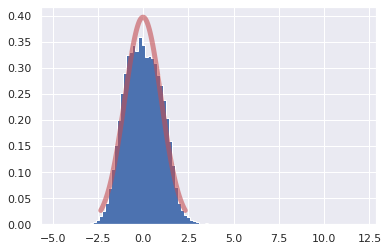

In [8]:


arr = np.array(non_fraud_X_train['V11'])
std_dev = np.std(arr)
mean = np.mean(arr)


from scipy import stats

norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [9]:
X_train

index      Time        V1  ...       V28   Amount    rows
0        37372   38927.0  1.016658  ...  0.010645    13.70   37372
1       215884  140262.0 -2.546080  ... -0.191483     1.00  215884
2        98616   66732.0  1.336743  ...  0.011304    55.00   98616
3       172195  120995.0 -1.033347  ... -0.017385   389.98  172195
4        19496   30328.0 -0.440280  ...  0.088869    60.80   19496
...        ...       ...       ...  ...       ...      ...     ...
190815   21440   31666.0 -2.986845  ...  0.404045  2312.26   21440
190816  117583   74729.0  0.937083  ...  0.023771   171.32  117583
190817   73349   55095.0 -1.149963  ...  0.031193     7.58   73349
190818  267336  162728.0  1.754554  ... -0.019622    94.80  267336
190819  128037   78576.0 -0.707635  ... -0.205589    57.80  128037

[190820 rows x 32 columns]

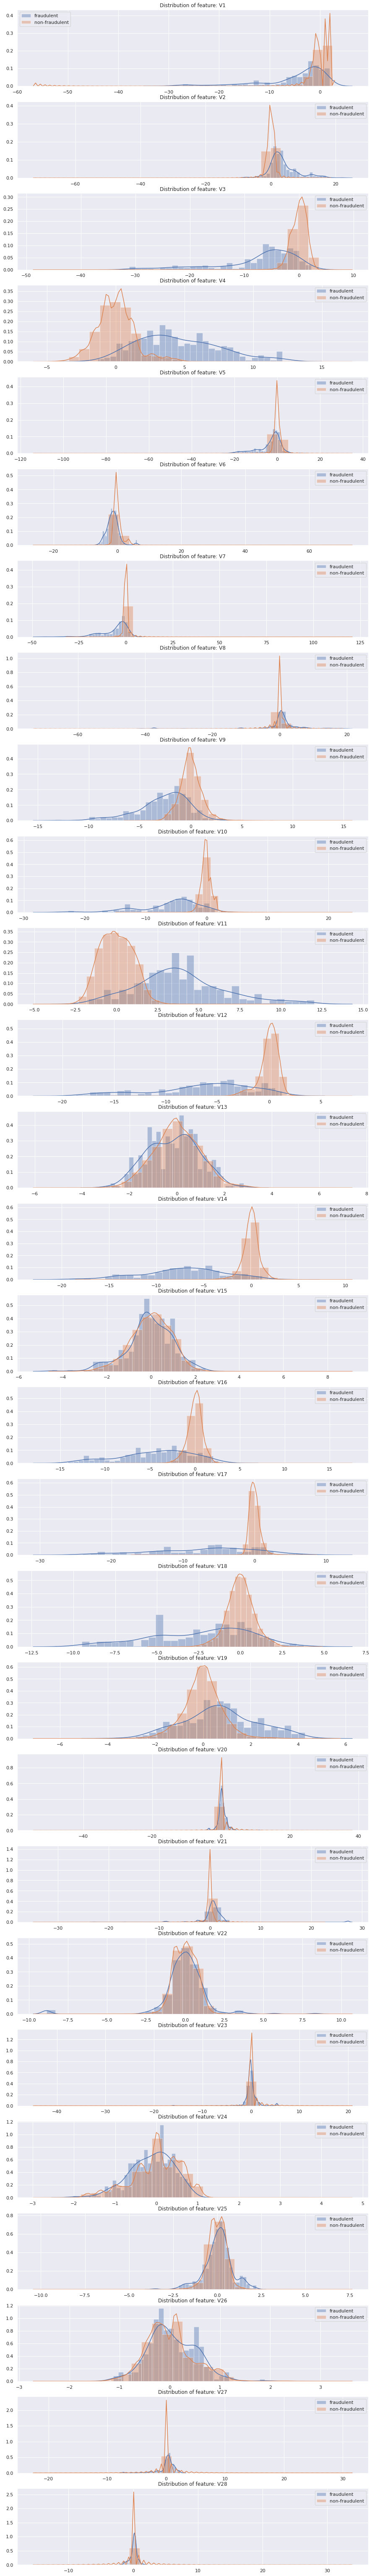

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Q.** Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[2 Marks]**

**Type your answer here**

## Part 2: Single Variable Gaussian Distribution: [7 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve). 

  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  

2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.


Summarize your findings.


### Anomaly Detection Algorithm
Given that there are $m$ training examples and $n$ features 
1. Choose features that you think might be indicative of anomalous examples. 
2. Fit Parameters $\mu_1, \mu_2 ..., \mu_n$ as well as $\sigma_1^2, \sigma_2^2, ...\sigma_n^2$

$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m}x_j^{(i)}
$$

where $\mu_j$ is the average value of the $j$th feature. 

$$
\sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}(X_{j}^{(i)} - \mu_j)^2
$$

3. Given new example $x$, compute $p(x)$: 

$$
p(x) = \prod_{j=1}^n p(x_j\; \mu_j, \sigma_j^2)=\prod_{j=1}^n \frac{1}{\sqrt{2\pi\sigma_j} }exp \left( \frac{-(x_j-\mu_j)^2}{2\sigma_j^2}\right)
$$

### Evaluating the Algorithm
* Training set will assume normal examples (not anomalous).
* Test set will include both anomalous and not anomalous. 



**We want to use an anomaly detection algorithm vs supervised learning because we have a very small number of positive examples $(y=1)$ and a large number of negative examples $(y=0)$. In anomaly detection algorithms, it is hard to learn from positive examples what the anomalies look like; future anomalies may look nothing like any of the anomamlous examples we've seen so far.**


In [11]:
column_names = ["var_name", "epsilon", "AUC", "F1_score"]

results = pd.DataFrame(columns = column_names)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import math
from math import e
from sklearn.metrics import accuracy_score
import pandas as pd 
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score



def p_x(x, mu, sigma): 
  """
  Inputs: x, mu is the average of a gaussian, sigma is the std dev of the gaussian 
  Outputs: probability of a value in a Gaussian 
  """
  return 1/(math.sqrt(2*math.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))


In [13]:

y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

y_train = y_train.to_frame()

X_train.reset_index(inplace=True)

filter_indices = y_train[y_train['Class']==0].index

non_fraud_X_train = X_train[X_train['index'].isin(filter_indices)]

fraud_X_train =X_train[X_train['index'].isin( y_train[y_train['Class']==1].index)]


y_test = y_test.to_frame()

X_test.reset_index(inplace=True)
non_fraud_X_test = X_test[X_test['index'].isin(y_test[y_test['Class']==0].index)]

fraud_X_test = X_test[X_test['index'].isin(y_test[y_test['Class']==1].index)]



summary_data = {'Non_fraud': [len(non_fraud_X_train),len(y_train[y_train['Class']==0]),len(non_fraud_X_test),len(y_test[y_test['Class']==0]), len(df[df['Class']==0])],
        'Fraud': [len(fraud_X_train),len(y_train[y_train['Class']==1]),len(fraud_X_test),len(y_test[y_test['Class']==1]), len(df[df['Class']==1])], 
        'Total': [len(X_train), len(y_train), len(X_test), len(y_test), len(df)]
        }

summary = pd.DataFrame(summary_data, columns = ['Non_fraud', 'Fraud', 'Total'], index=['X_train', 'y_train', 'X_test', 'y_test', 'Total'])

print("Sizes of datasets")
summary

Sizes of datasets


Non_fraud  Fraud   Total
X_train     190476    344  190820
y_train     190476    344  190820
X_test       93839    148   93987
y_test       93839    148   93987
Total       284315    492  284807

In [14]:
x = X_train['V11']
mean = X_train['V11'].mean()
std_dtv = X_train['V11'].std()

In [15]:
probs =p_x(x, mean, std_dev)

In [16]:
probs_df = {'X_train_V11': X_train['V11'],
        'mean': [X_train['V11'].mean()] * len(X_train), 
        'std_dev': [X_train['V11'].std()] * len(X_train), 
        'p(x)': probs
        }

In [17]:
probs_df =  pd.DataFrame(probs_df, columns = ['X_train_V11', 'mean', 'std_dev', 'p(x)'])

In [18]:
#there are 344 anomalies in the training set 
sorted_probs = probs_df.sort_values(by='p(x)')

In [19]:
sorted_probs.reset_index(inplace=True)

In [20]:
epsilons = list(sorted_probs.iloc[324:364]['p(x)'])

### **Find probabilities of each of the points of the testing set of belonging to the distribution fitted by non fraudulent transactions of the training set**

In [21]:
y_test

Class
169876      0
127467      0
137900      0
21513       0
134700      0
...       ...
61728       0
152550      0
24049       0
263318      0
23168       0

[93987 rows x 1 columns]

Epsilon: 0.0010595747656947326


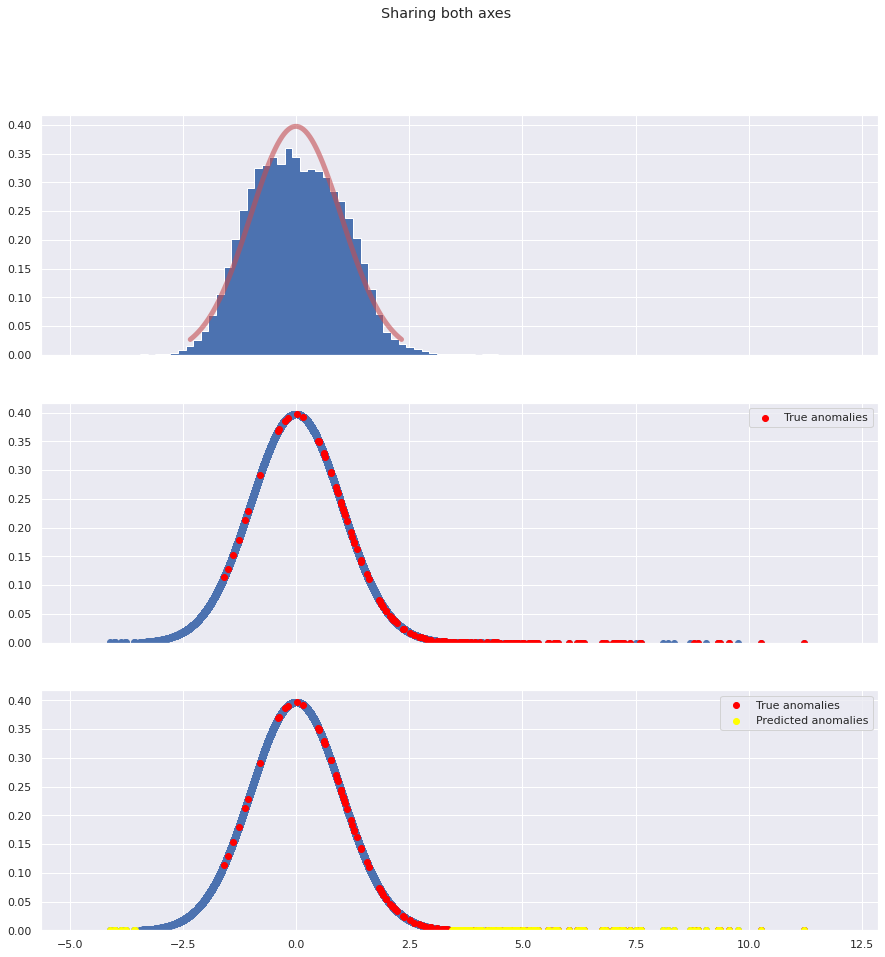

AUC: 0.883


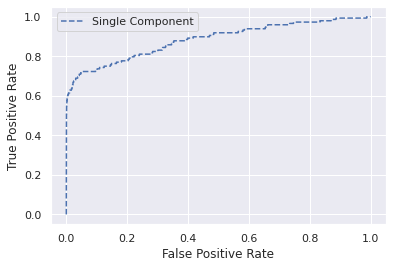

F1 score: 0.505
  var_name  epsilon       AUC  F1_score
0      V11  0.00106  0.883444  0.505051
Epsilon: 0.0010854959469222068


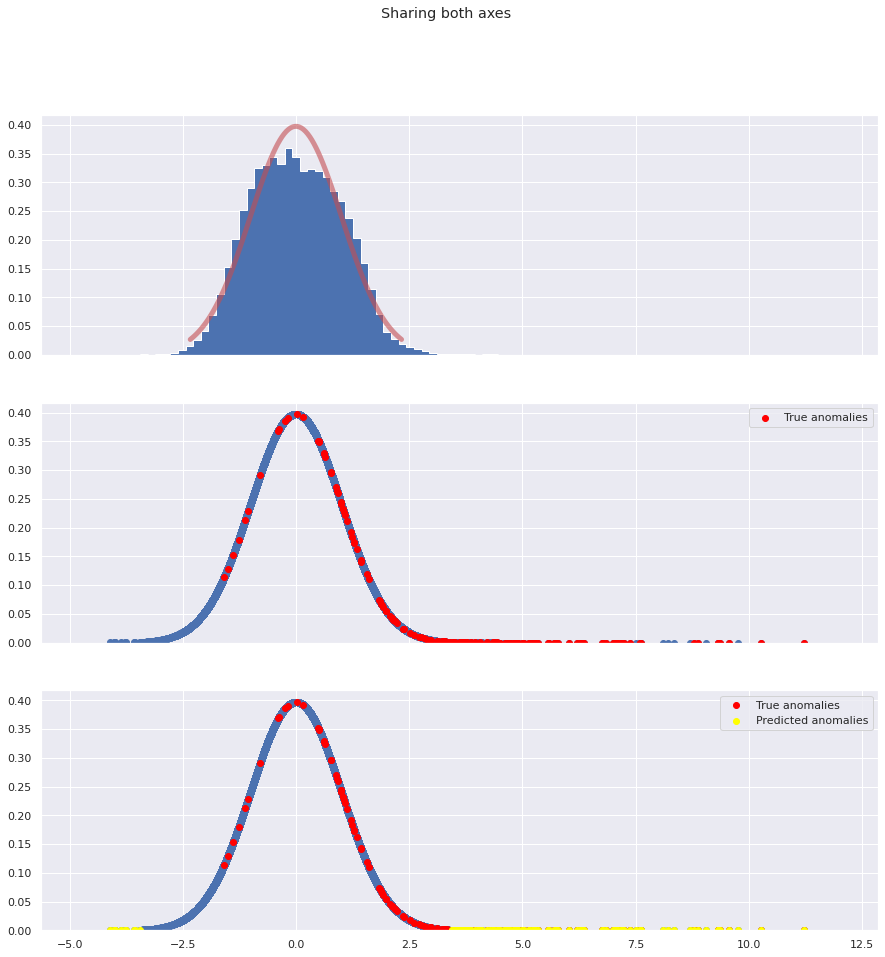

AUC: 0.883


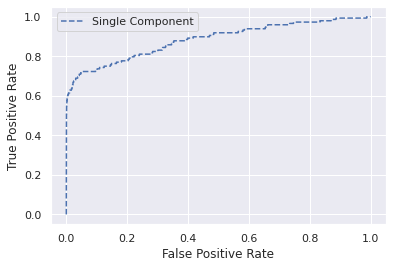

F1 score: 0.502
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
Epsilon: 0.0010855040209068144


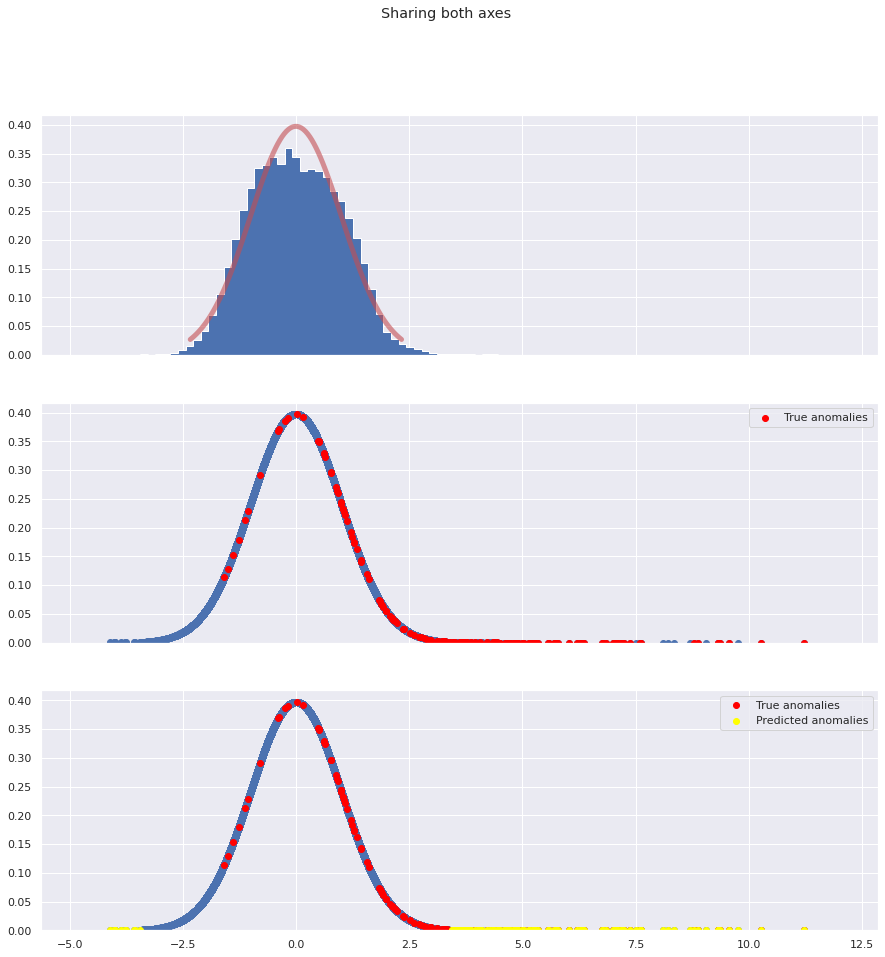

AUC: 0.883


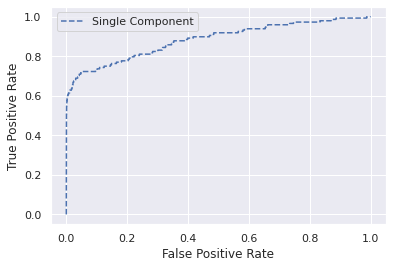

F1 score: 0.502
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
Epsilon: 0.0011090406529854105


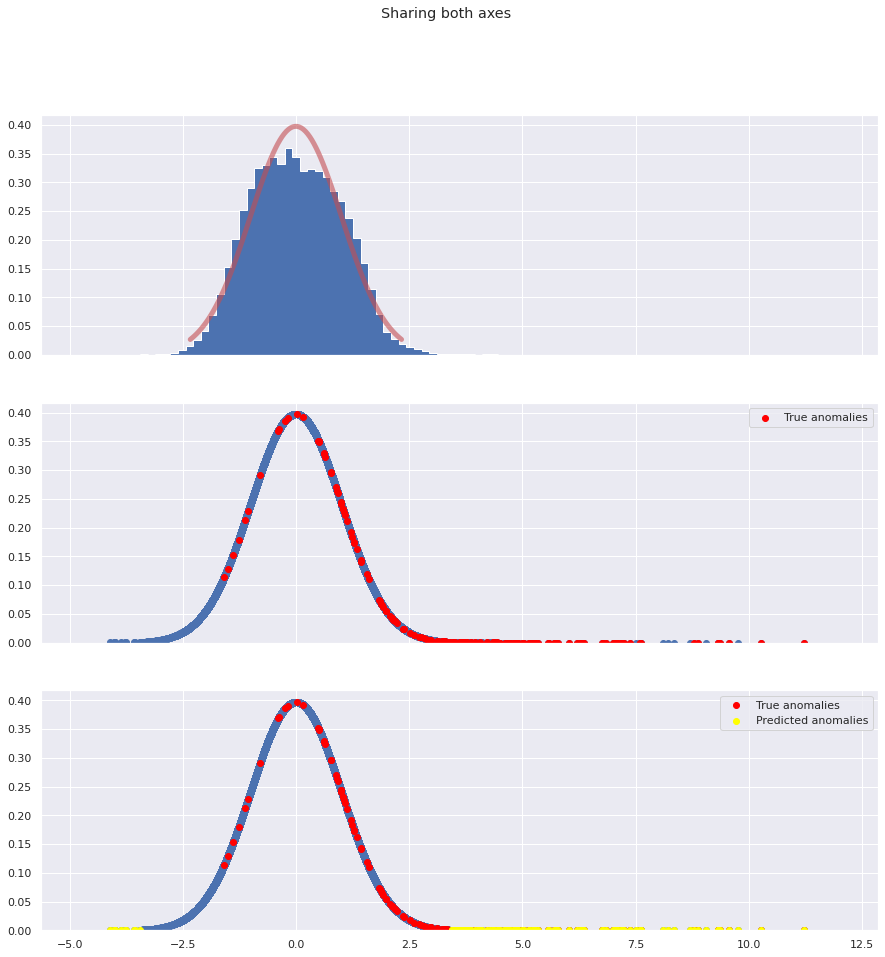

AUC: 0.883


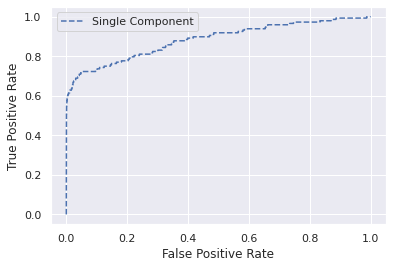

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
Epsilon: 0.0011258181531594211


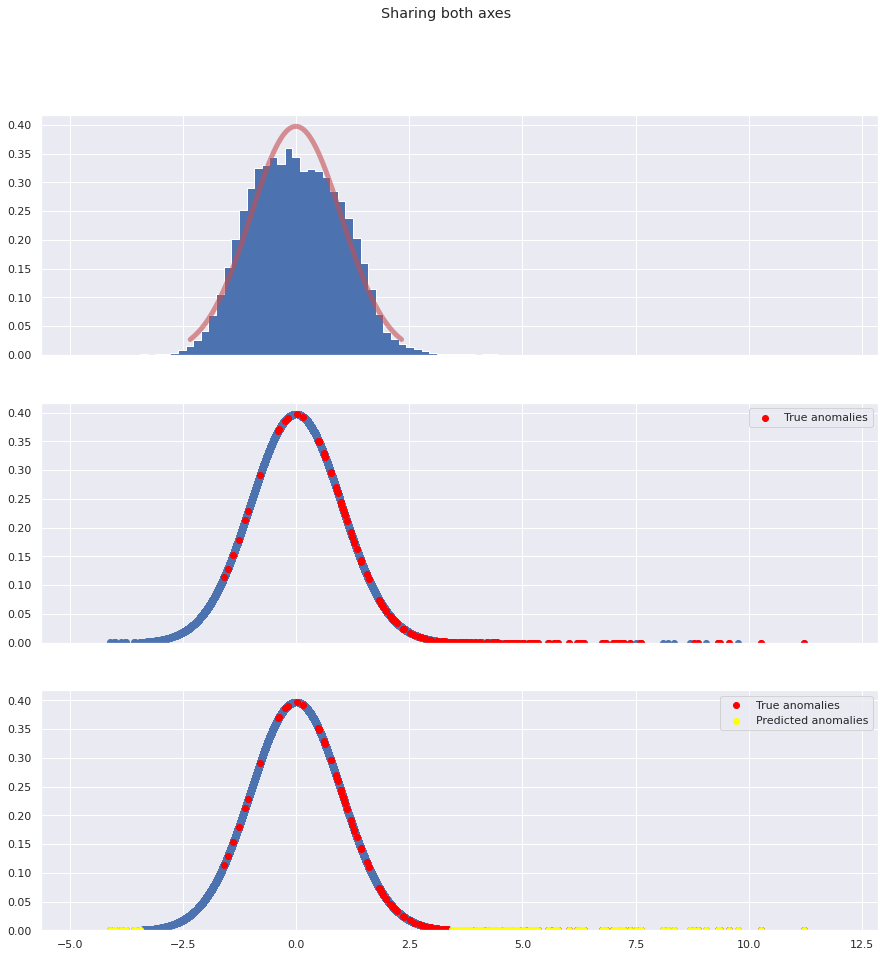

AUC: 0.883


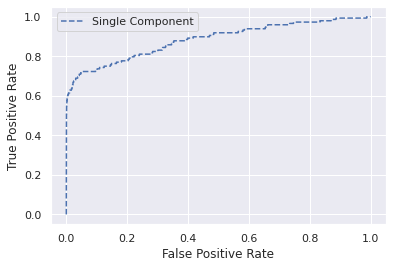

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
Epsilon: 0.0011501991148835477


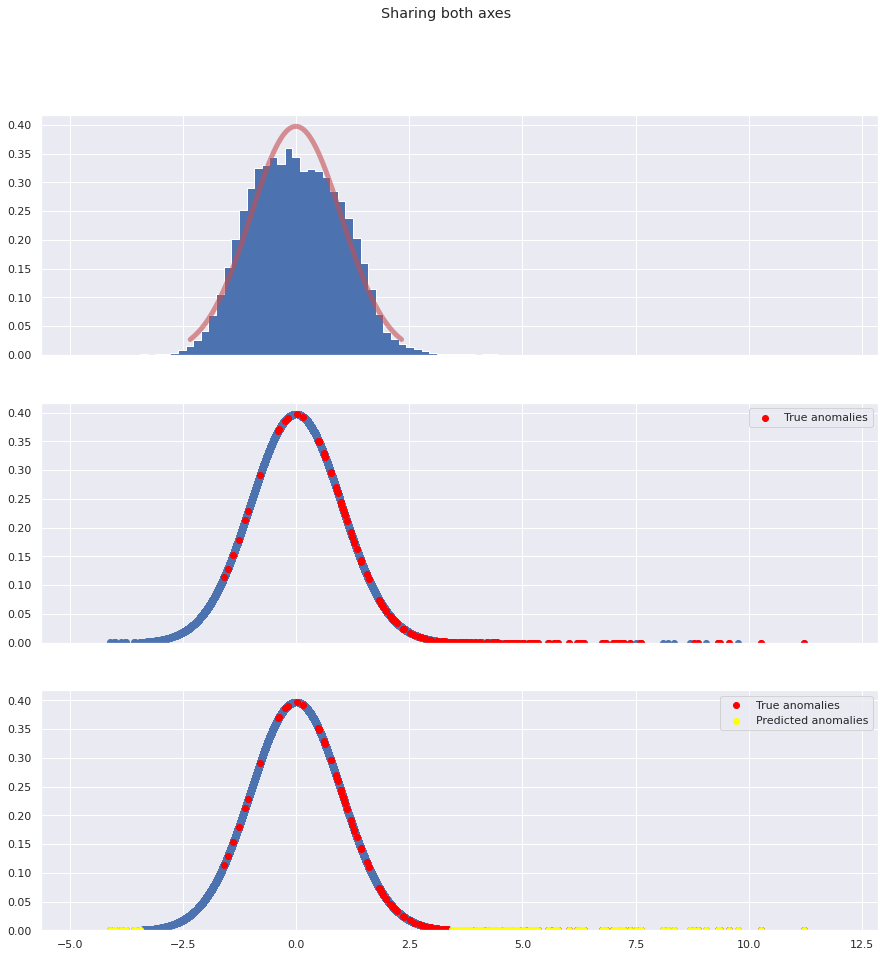

AUC: 0.883


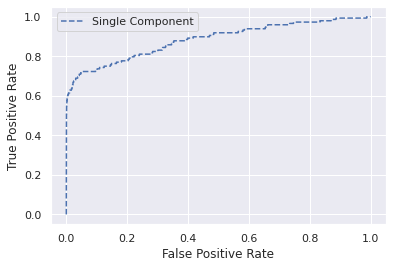

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
Epsilon: 0.0011571691941959306


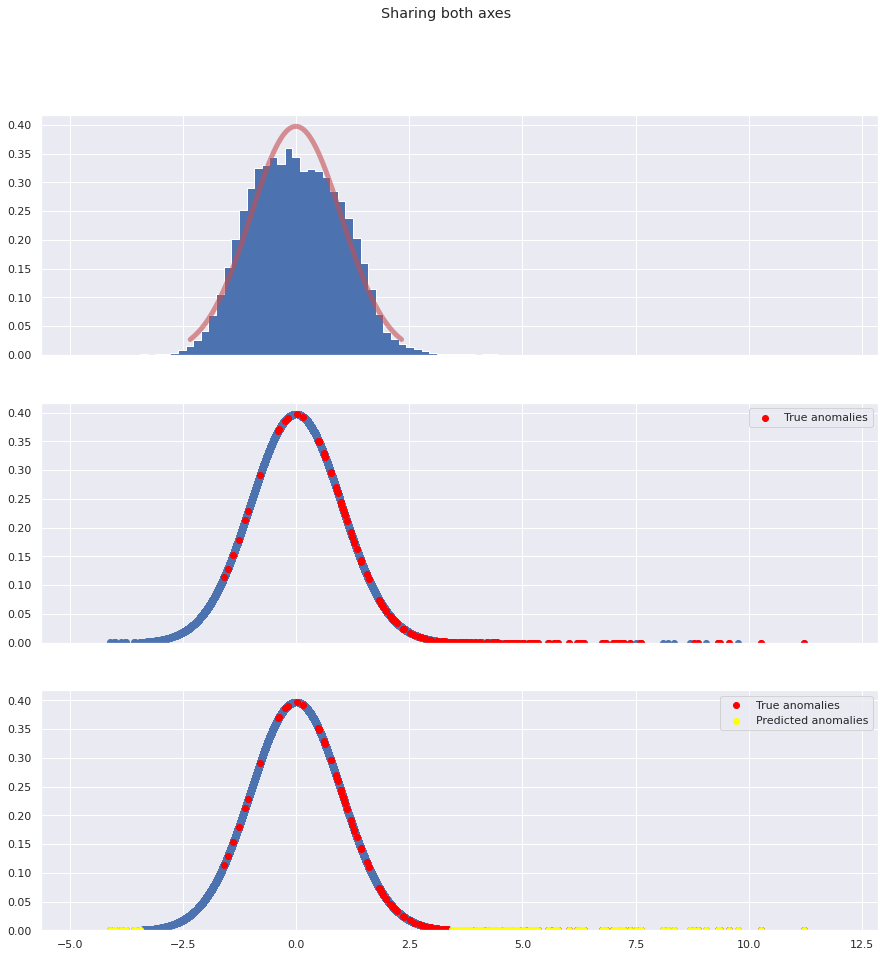

AUC: 0.883


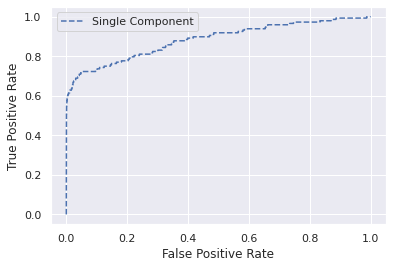

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
Epsilon: 0.0011643795540038234


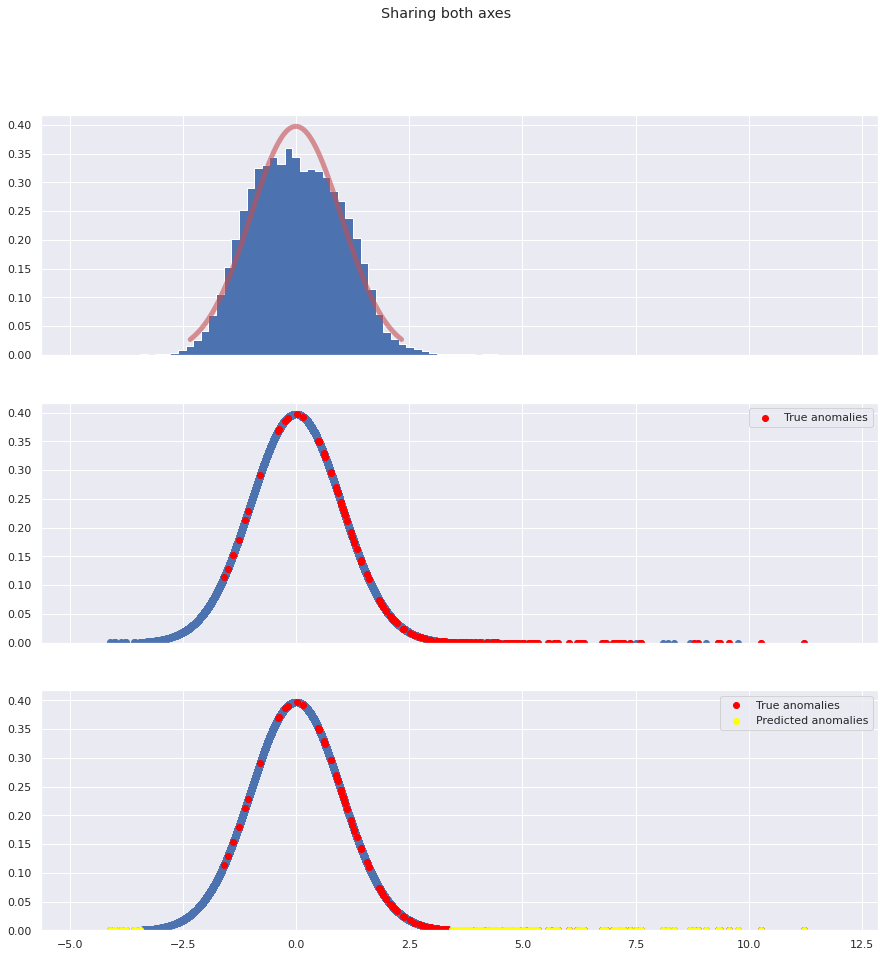

AUC: 0.883


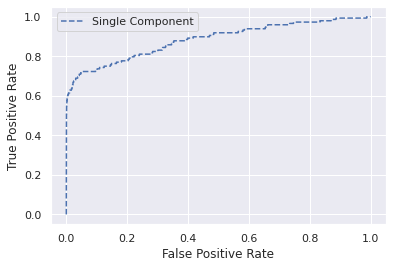

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
Epsilon: 0.001178621705306142


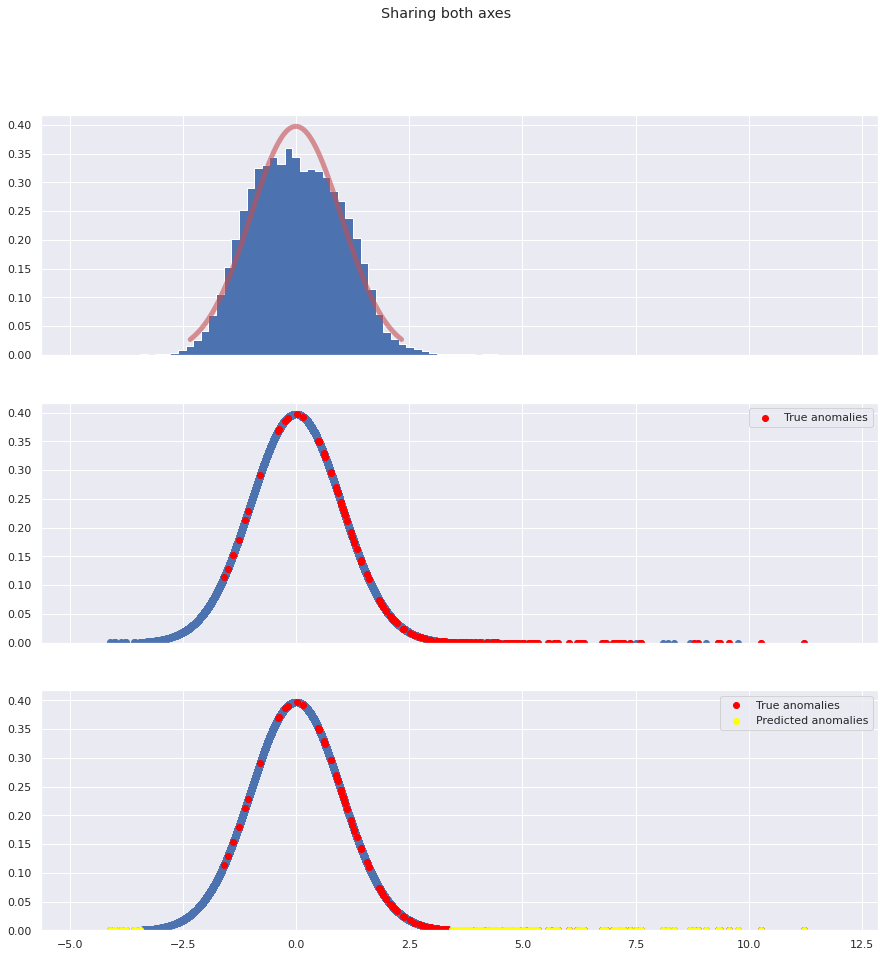

AUC: 0.883


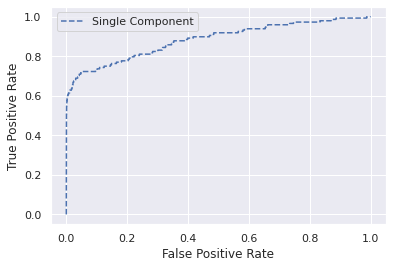

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
Epsilon: 0.0011813161589083116


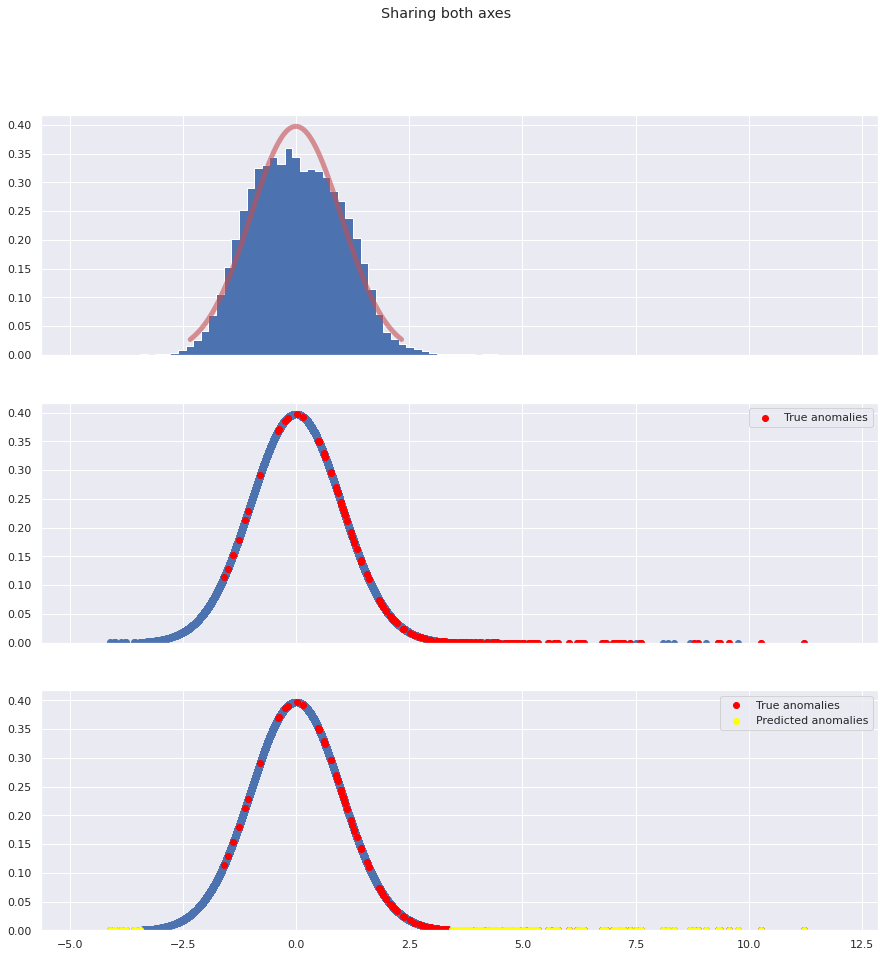

AUC: 0.883


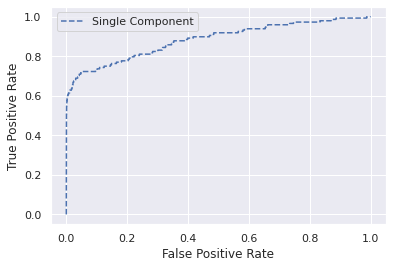

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
Epsilon: 0.0011910688852447137


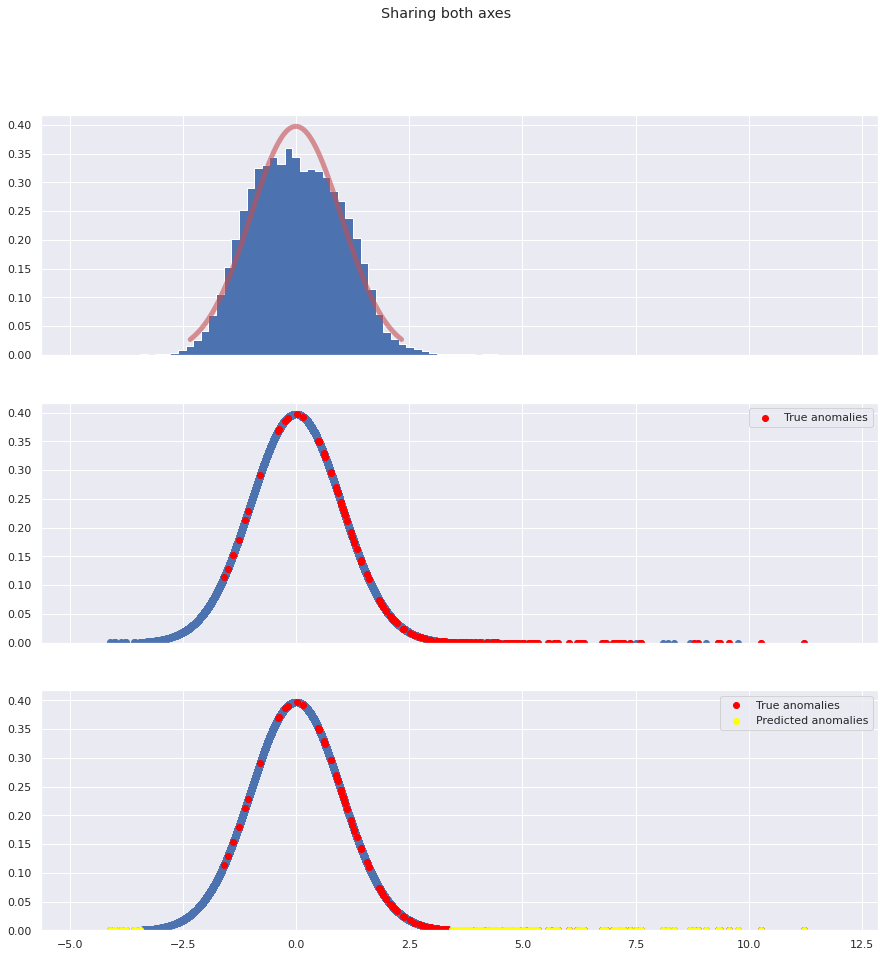

AUC: 0.883


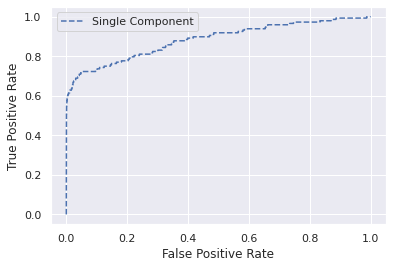

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
Epsilon: 0.0011941916275862807


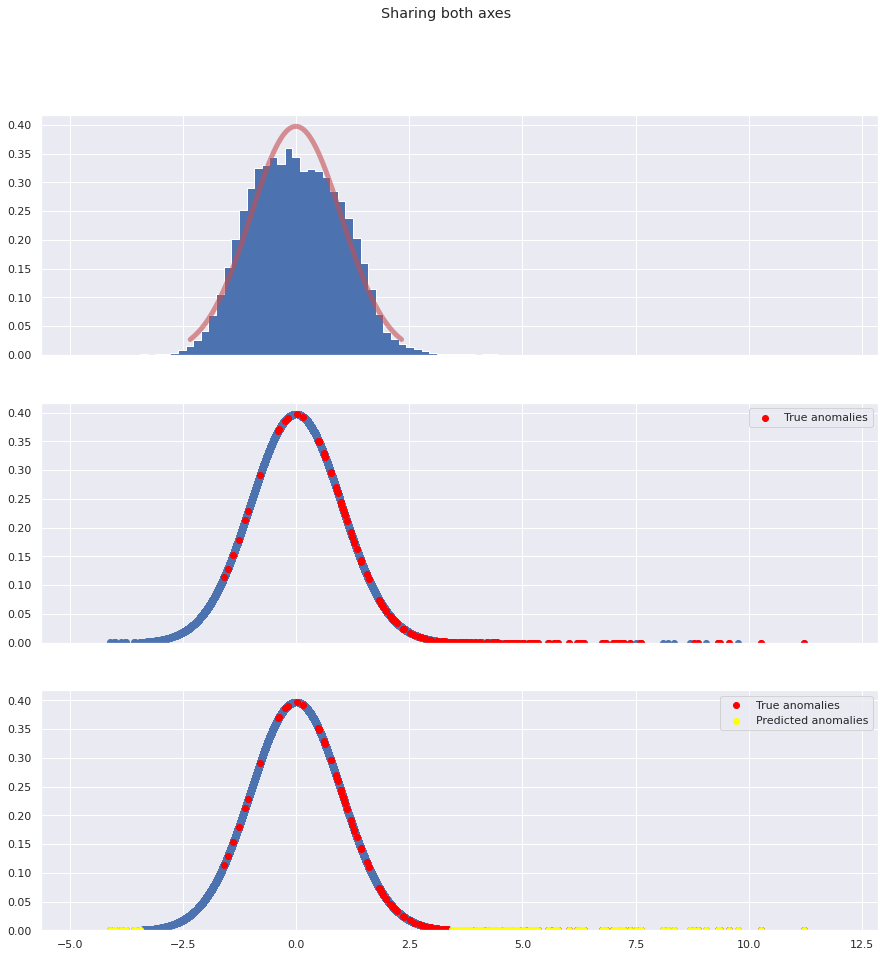

AUC: 0.883


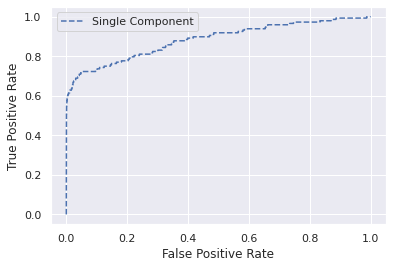

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
Epsilon: 0.001209054774382023


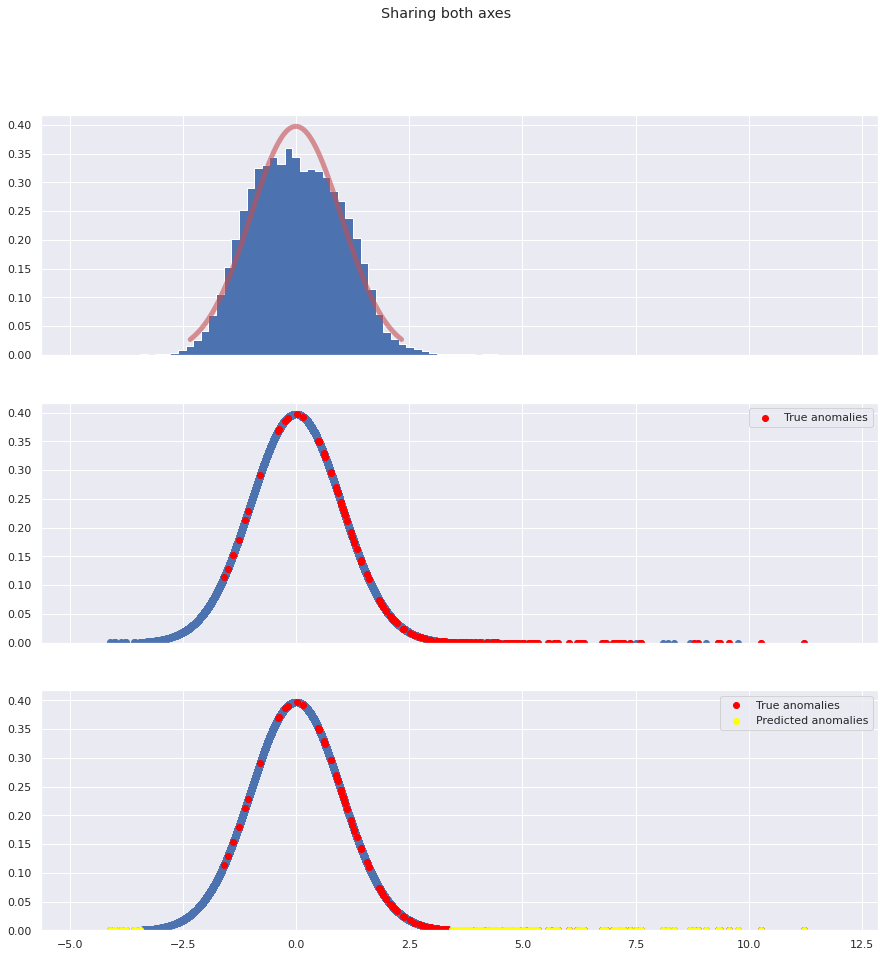

AUC: 0.883


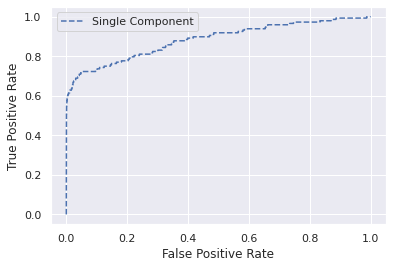

F1 score: 0.497
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
Epsilon: 0.0012744267940306769


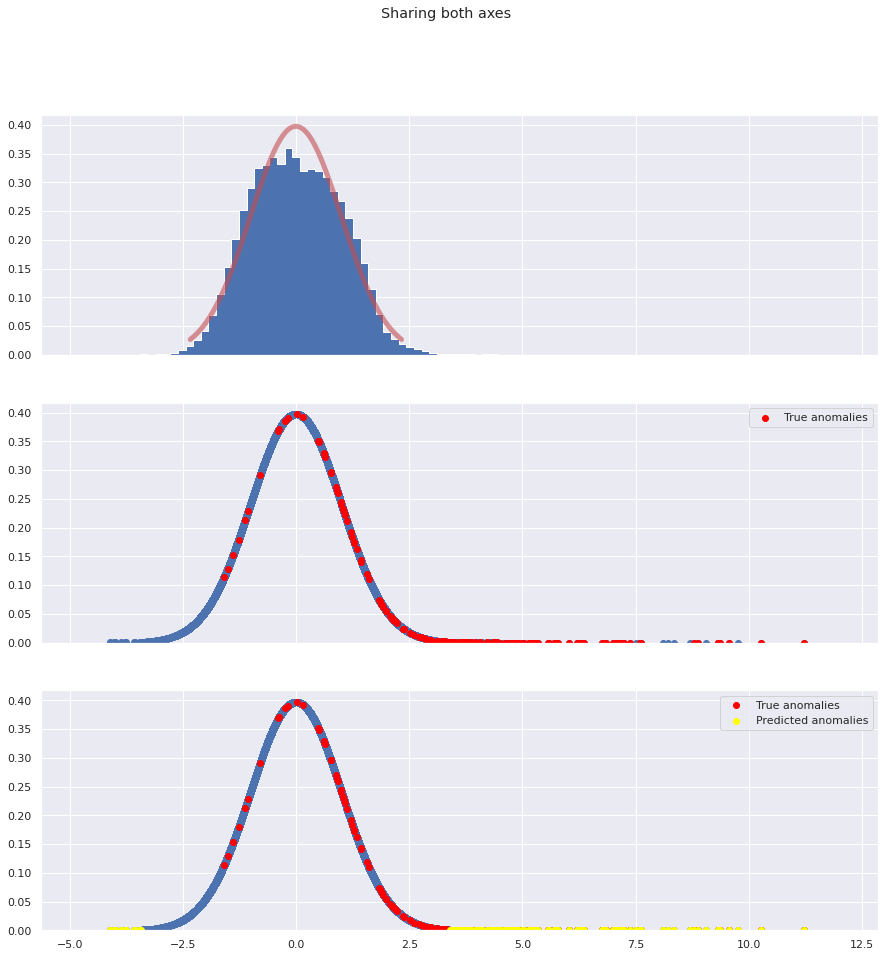

AUC: 0.883


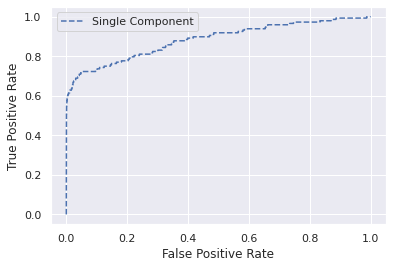

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
Epsilon: 0.001288715473439449


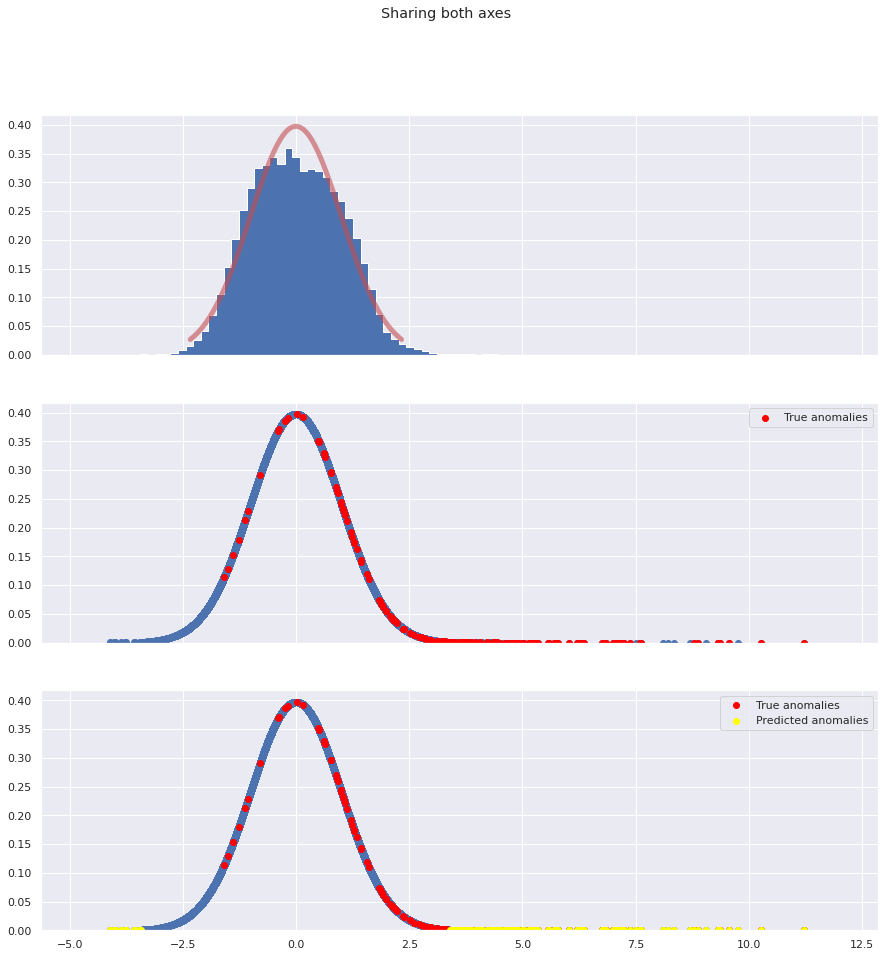

AUC: 0.883


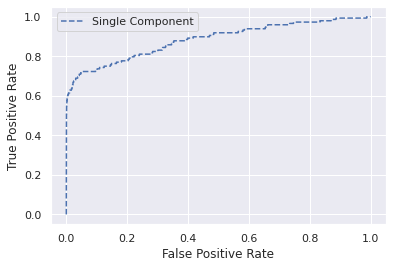

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
Epsilon: 0.001307409043945853


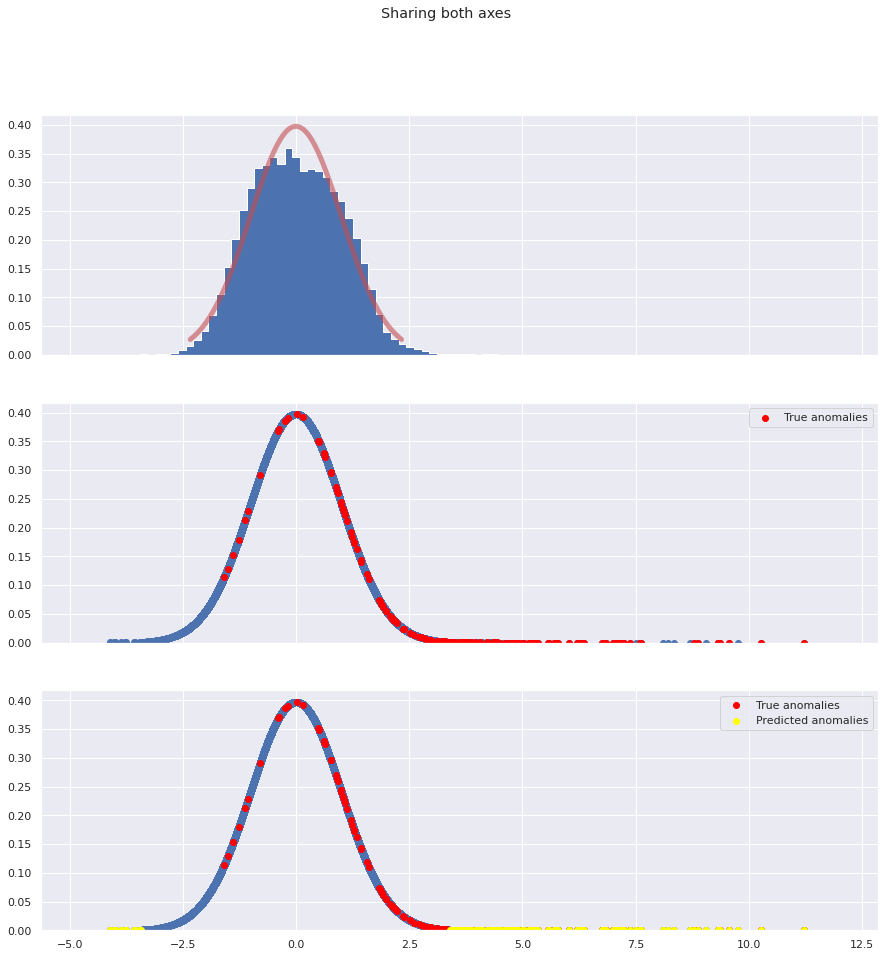

AUC: 0.883


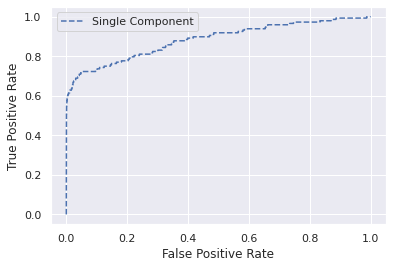

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
Epsilon: 0.0013176362003505995


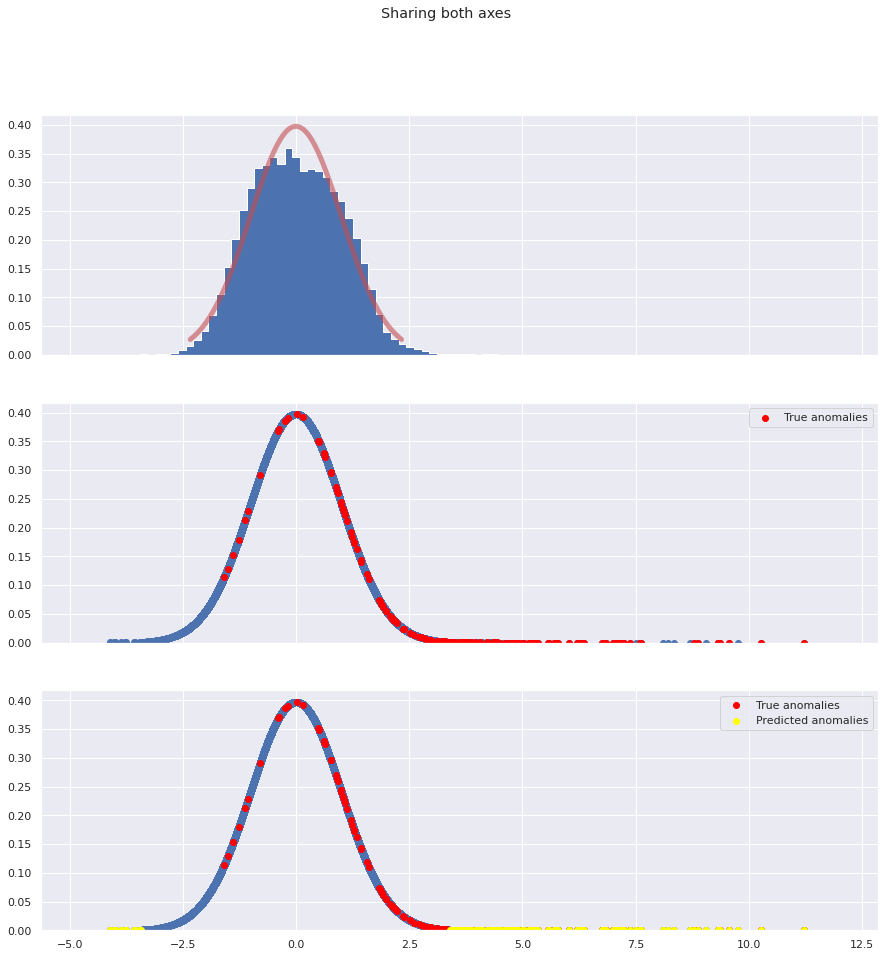

AUC: 0.883


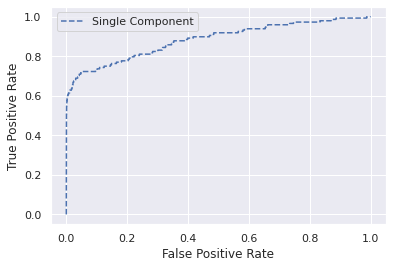

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
Epsilon: 0.0013252376037144894


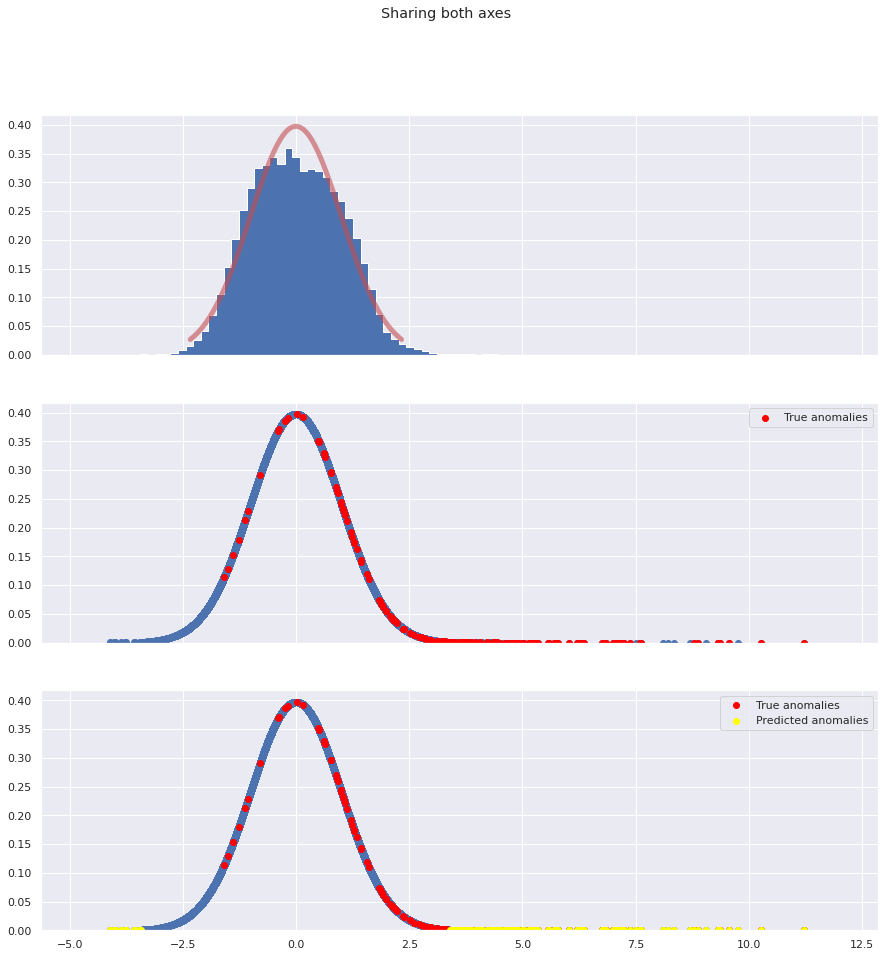

AUC: 0.883


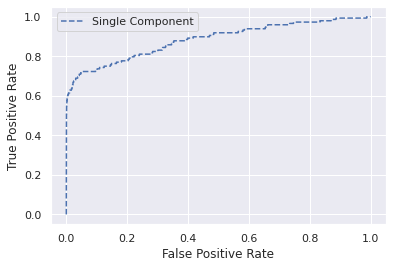

F1 score: 0.500
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
Epsilon: 0.0013379851507264381


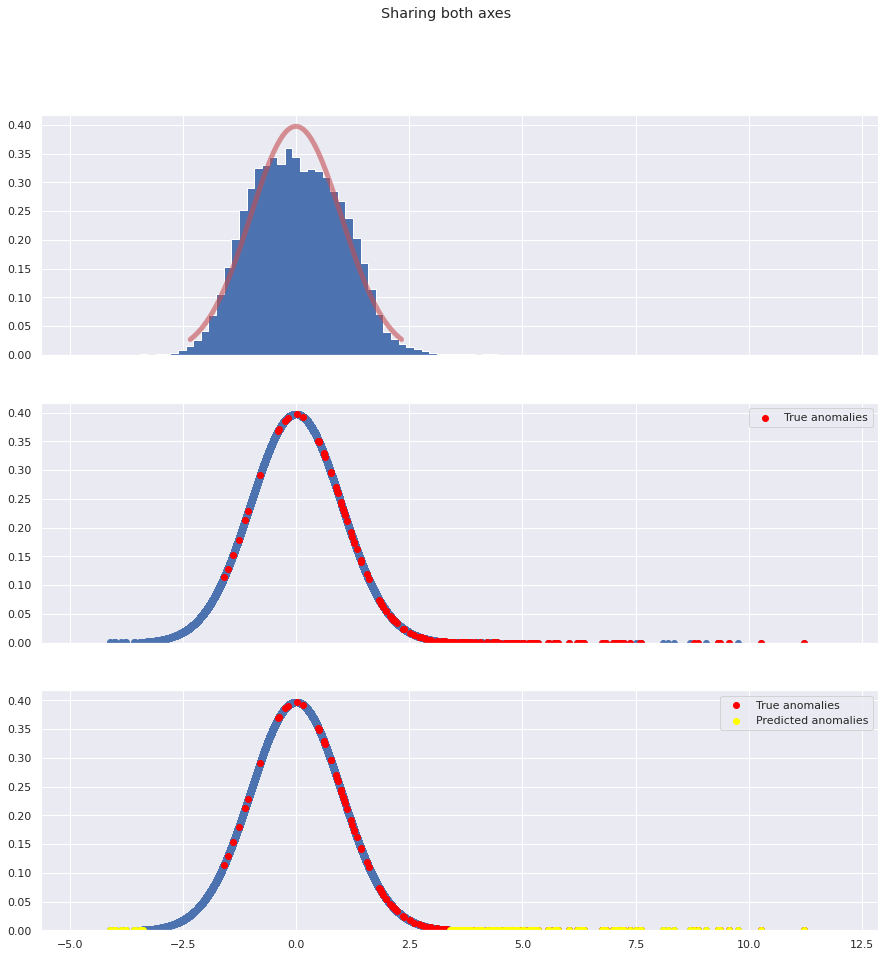

AUC: 0.883


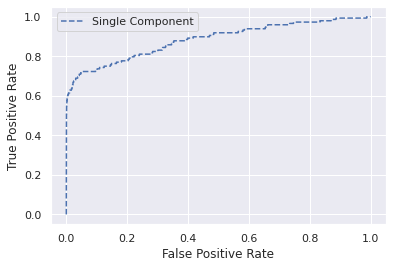

F1 score: 0.498
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
Epsilon: 0.0013787899335096485


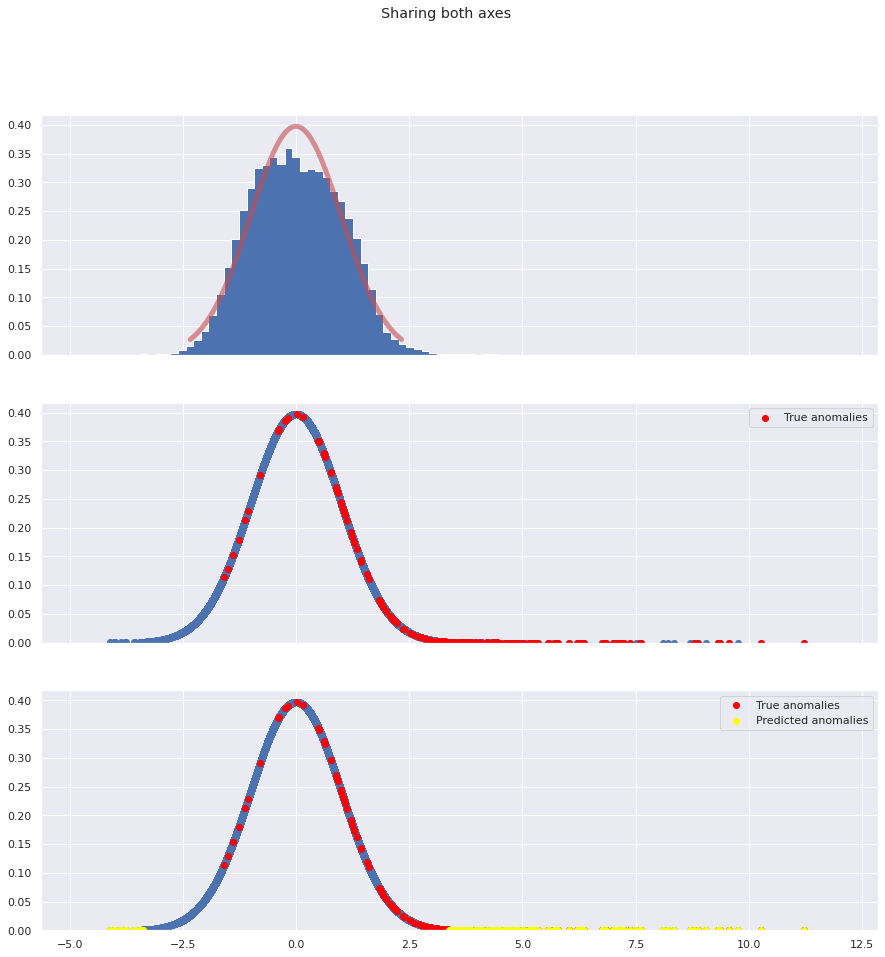

AUC: 0.883


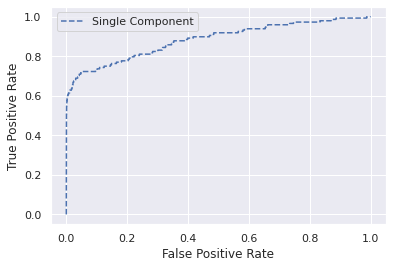

F1 score: 0.495
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
Epsilon: 0.0013935545576681588


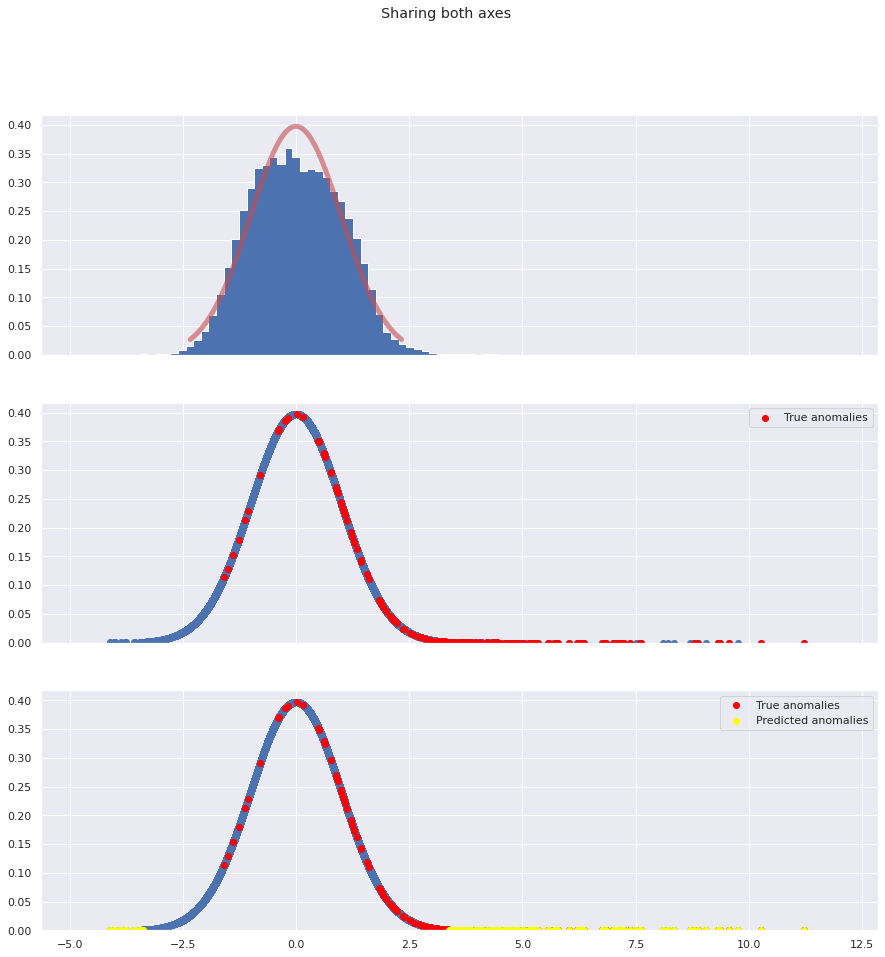

AUC: 0.883


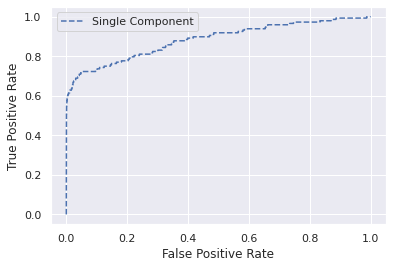

F1 score: 0.495
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
Epsilon: 0.0014199341145617387


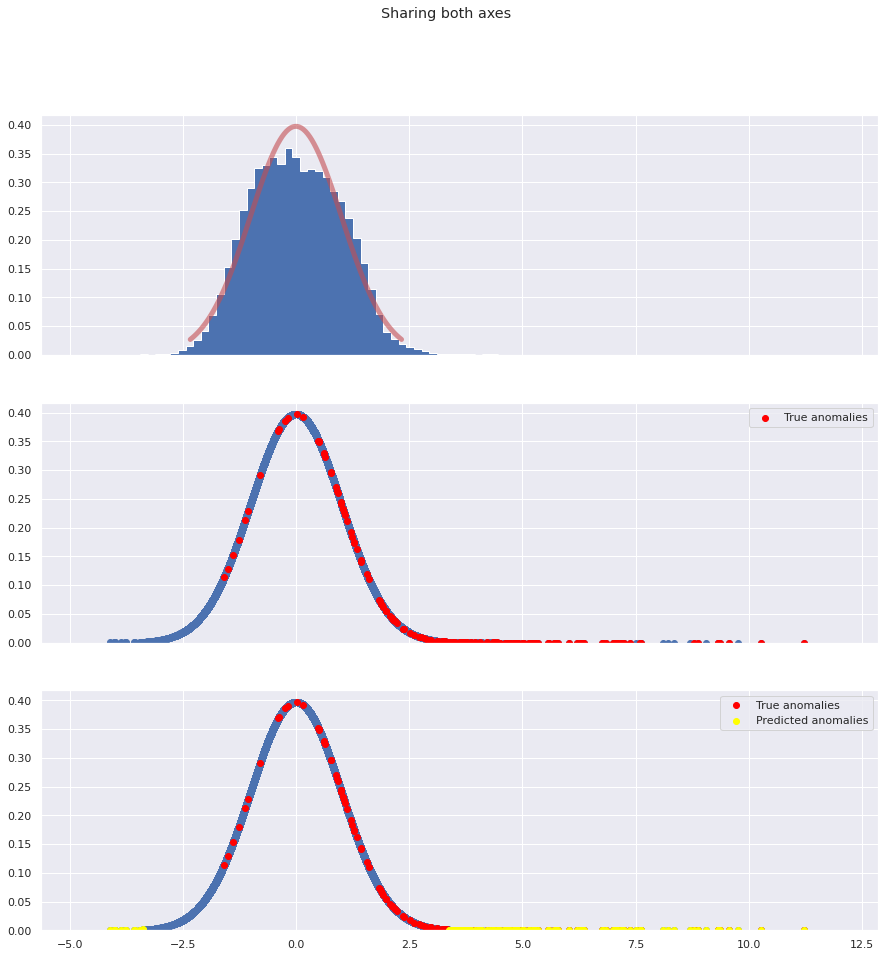

AUC: 0.883


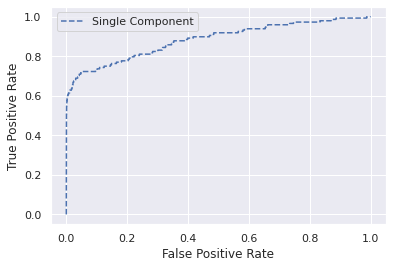

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
Epsilon: 0.001421702863514691


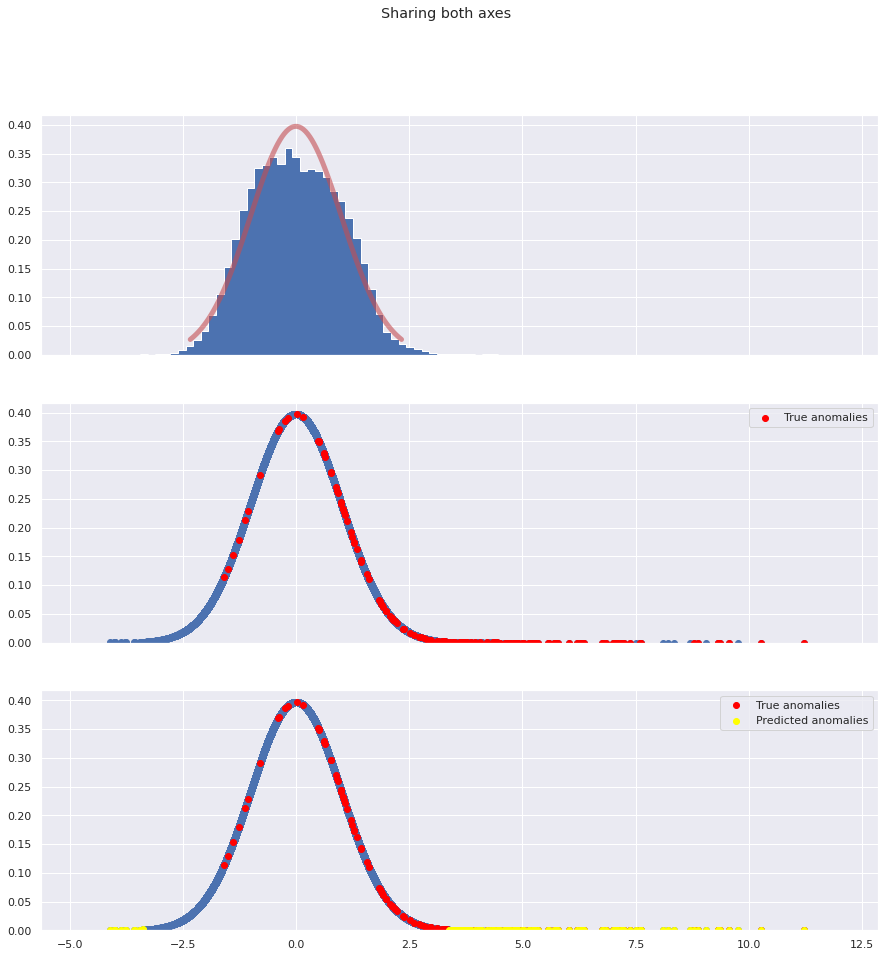

AUC: 0.883


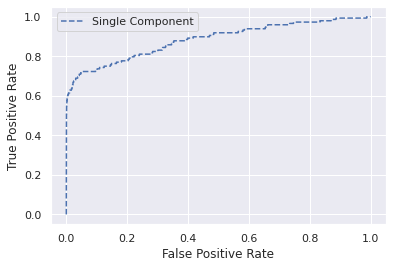

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


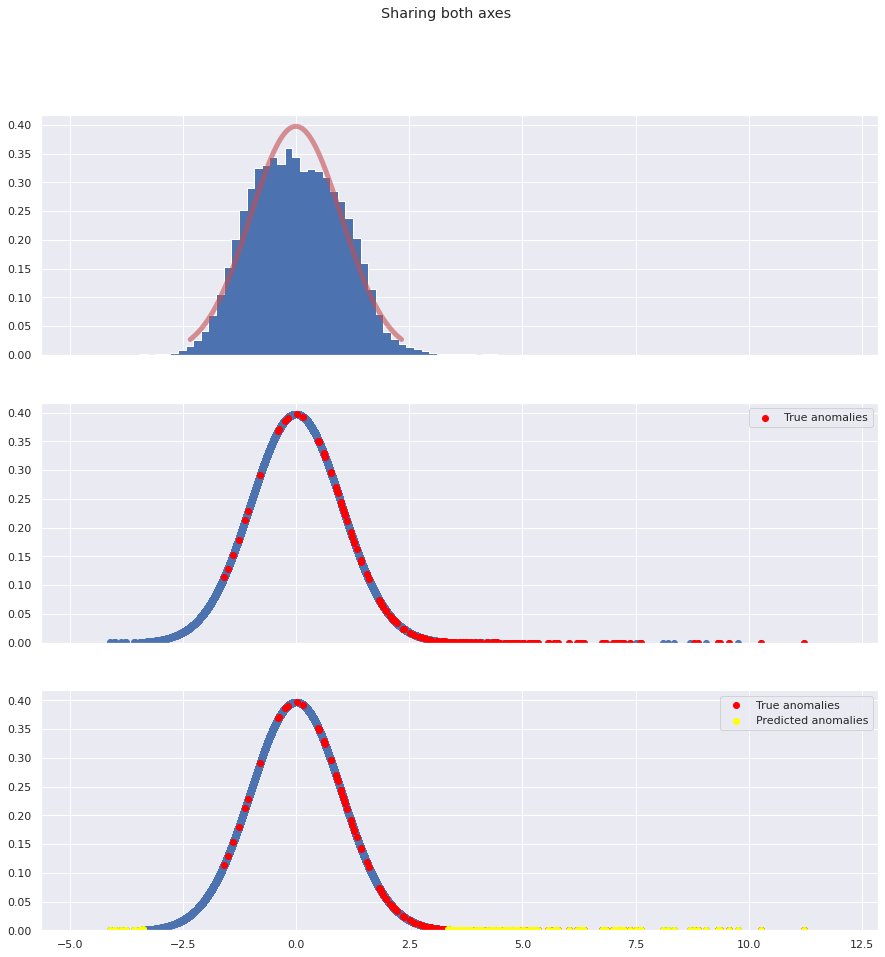

AUC: 0.883


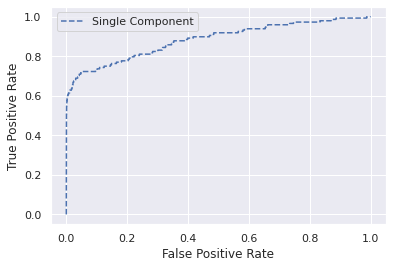

F1 score: 0.492
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


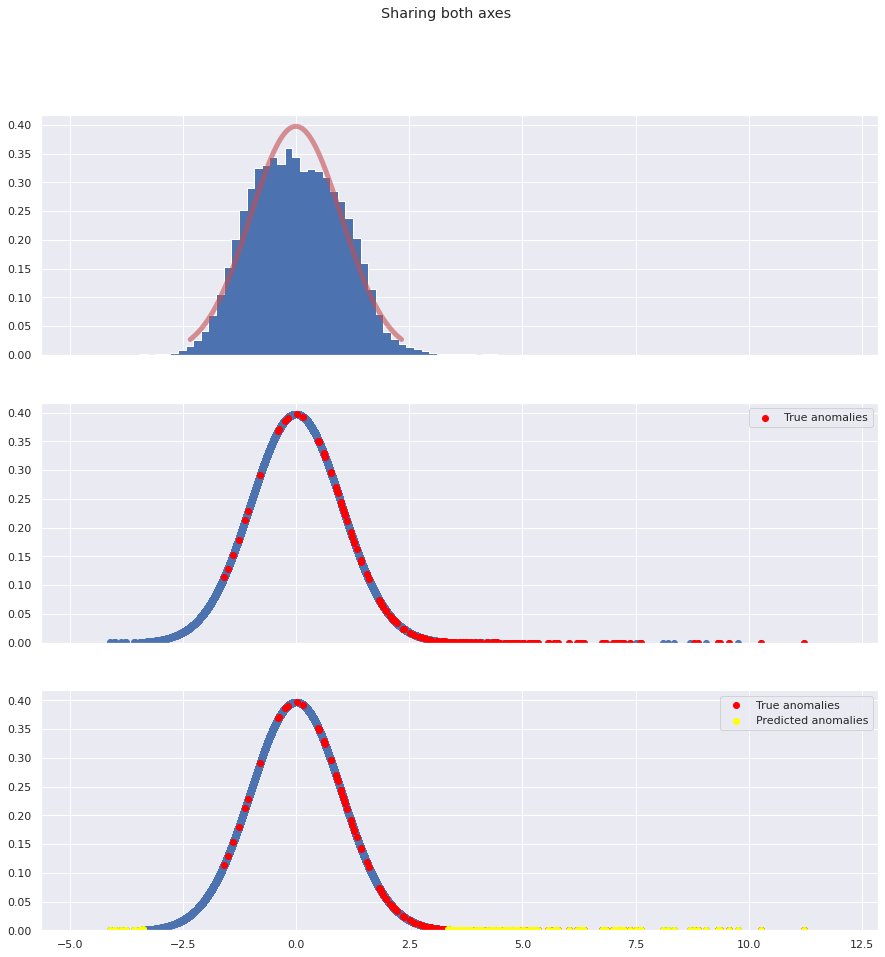

AUC: 0.883


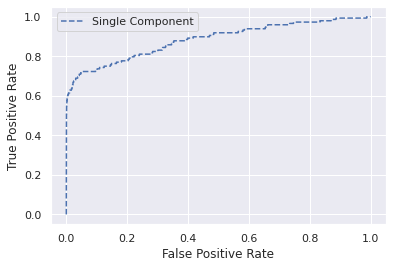

F1 score: 0.492
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


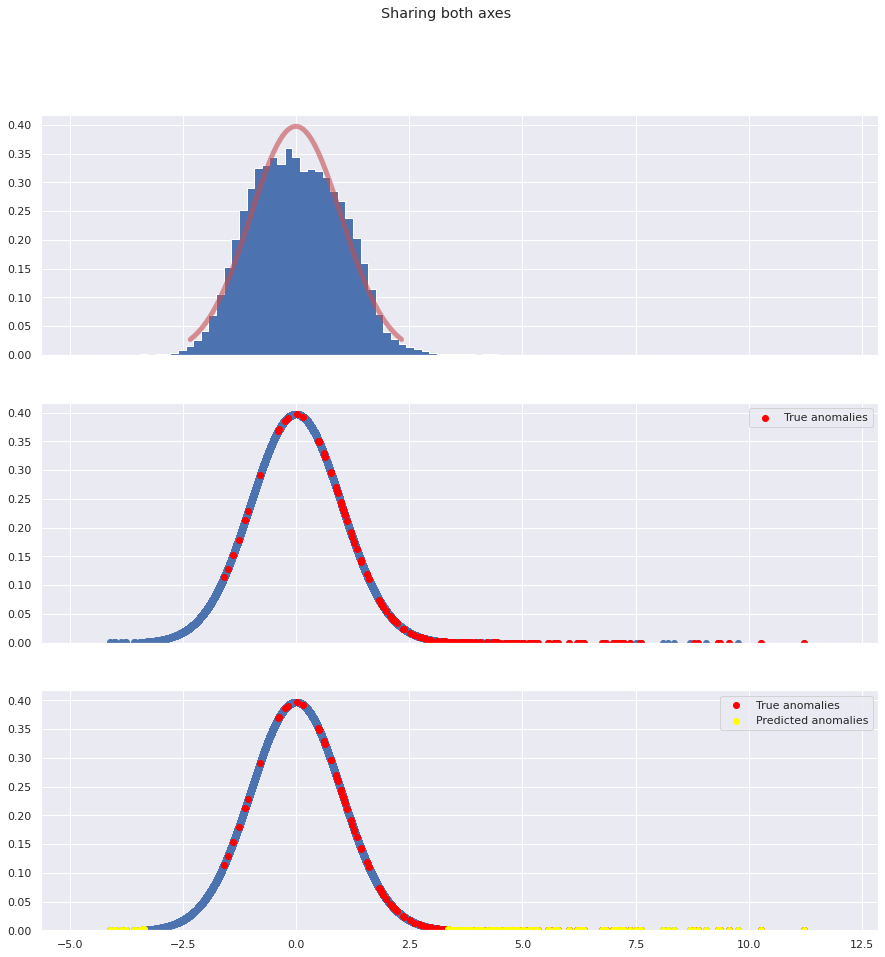

AUC: 0.883


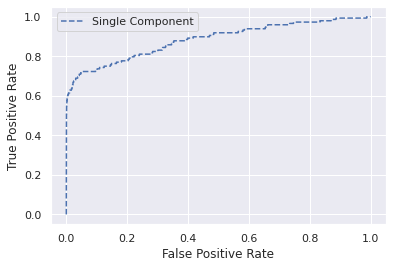

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


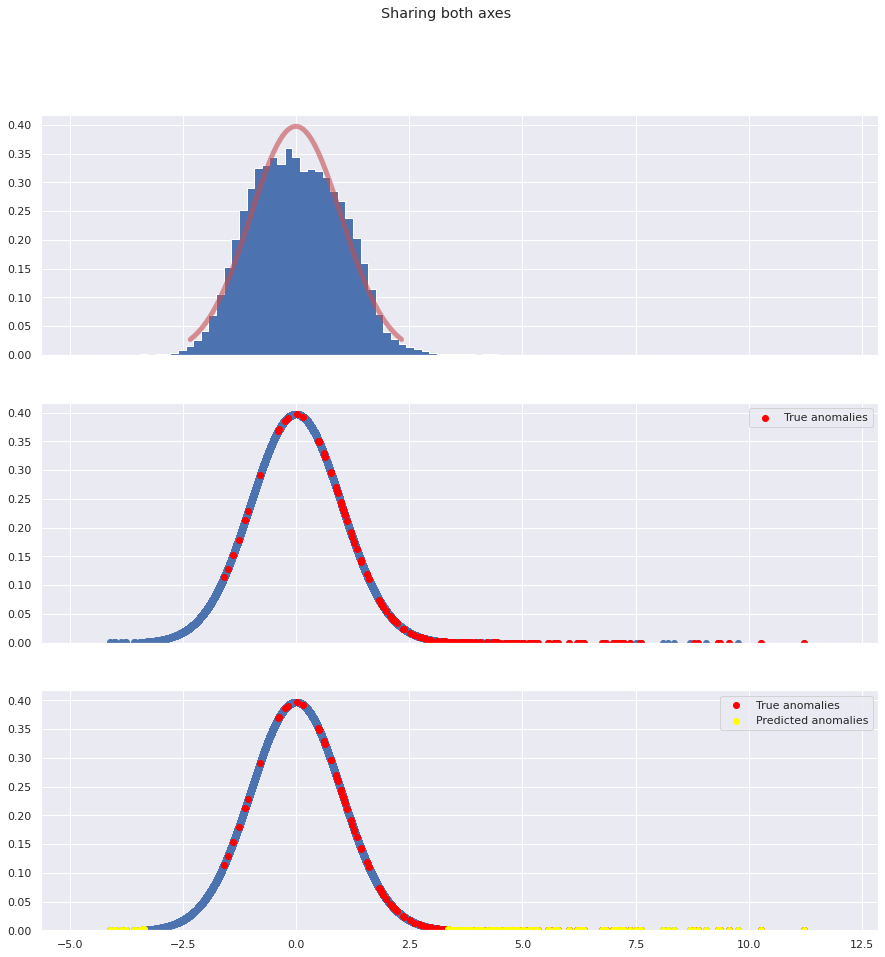

AUC: 0.883


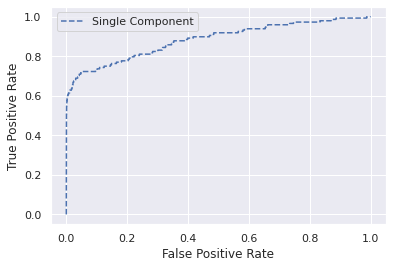

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


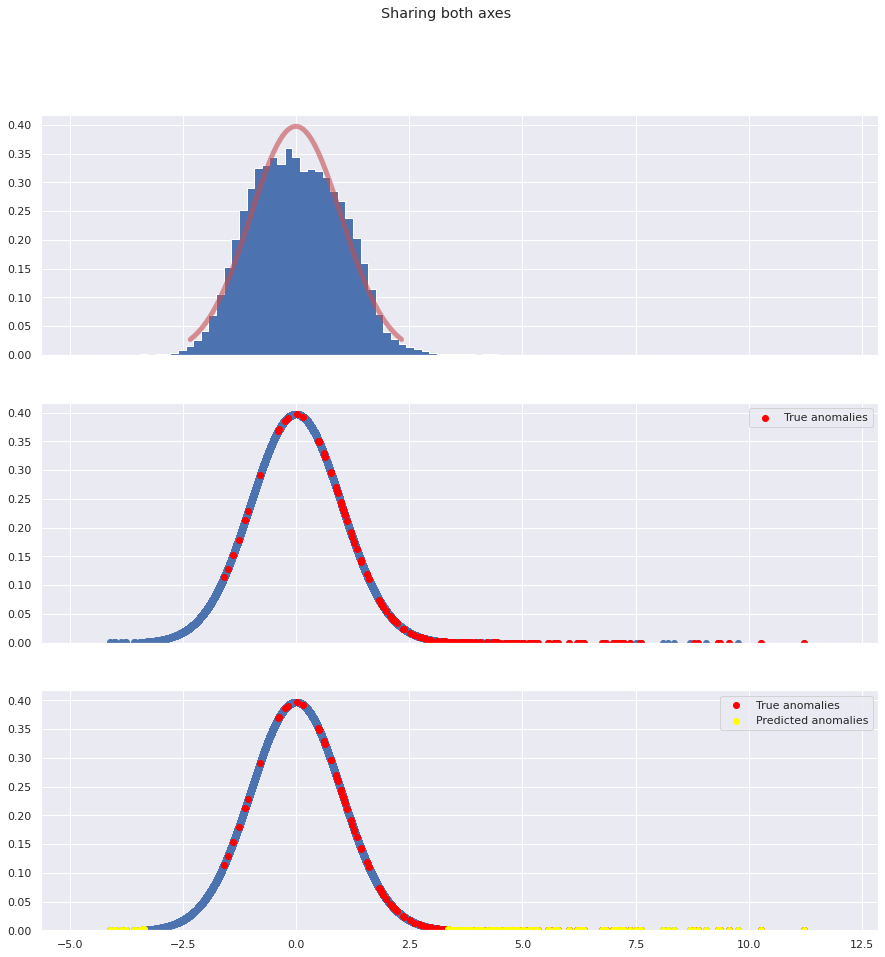

AUC: 0.883


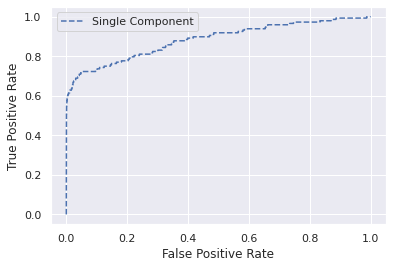

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


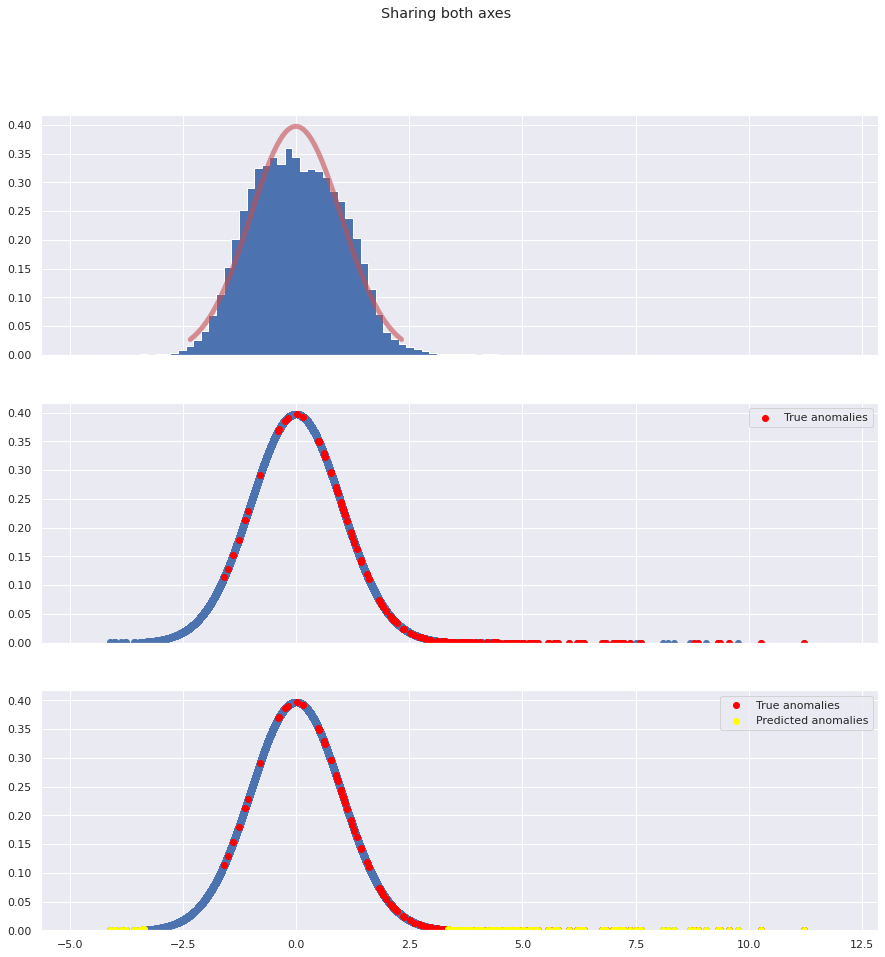

AUC: 0.883


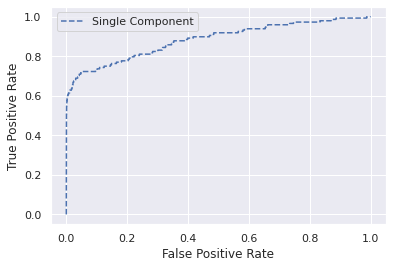

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


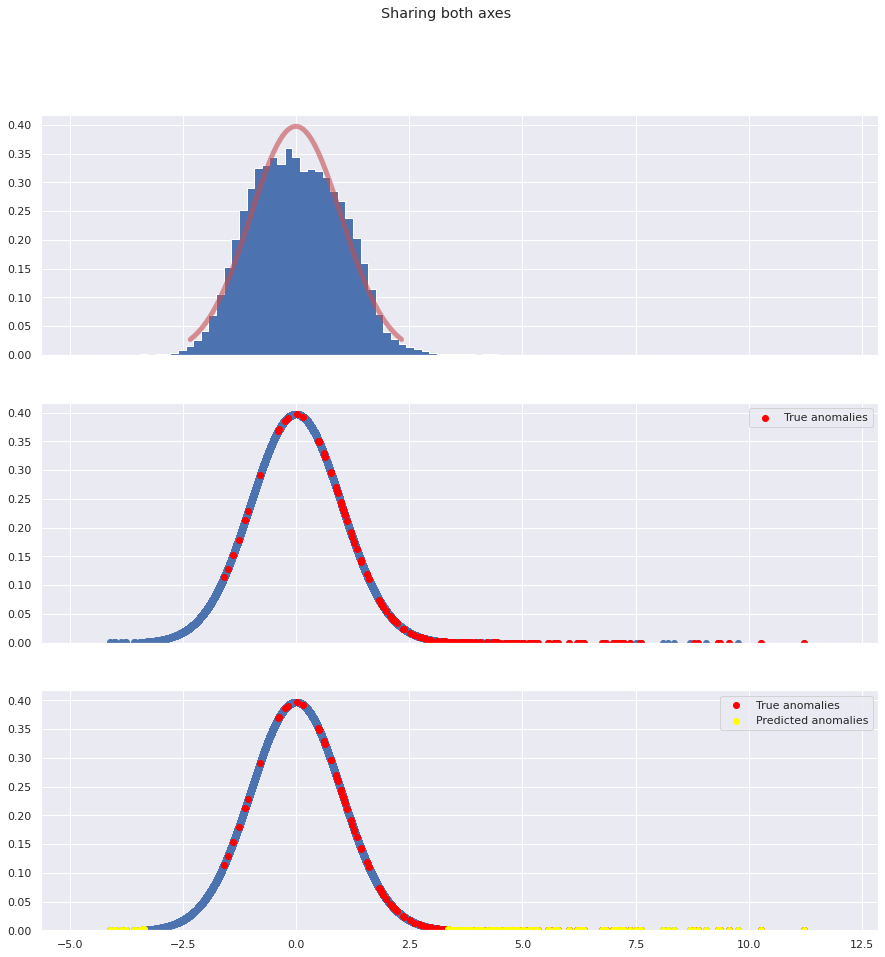

AUC: 0.883


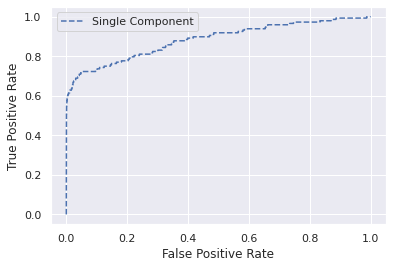

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


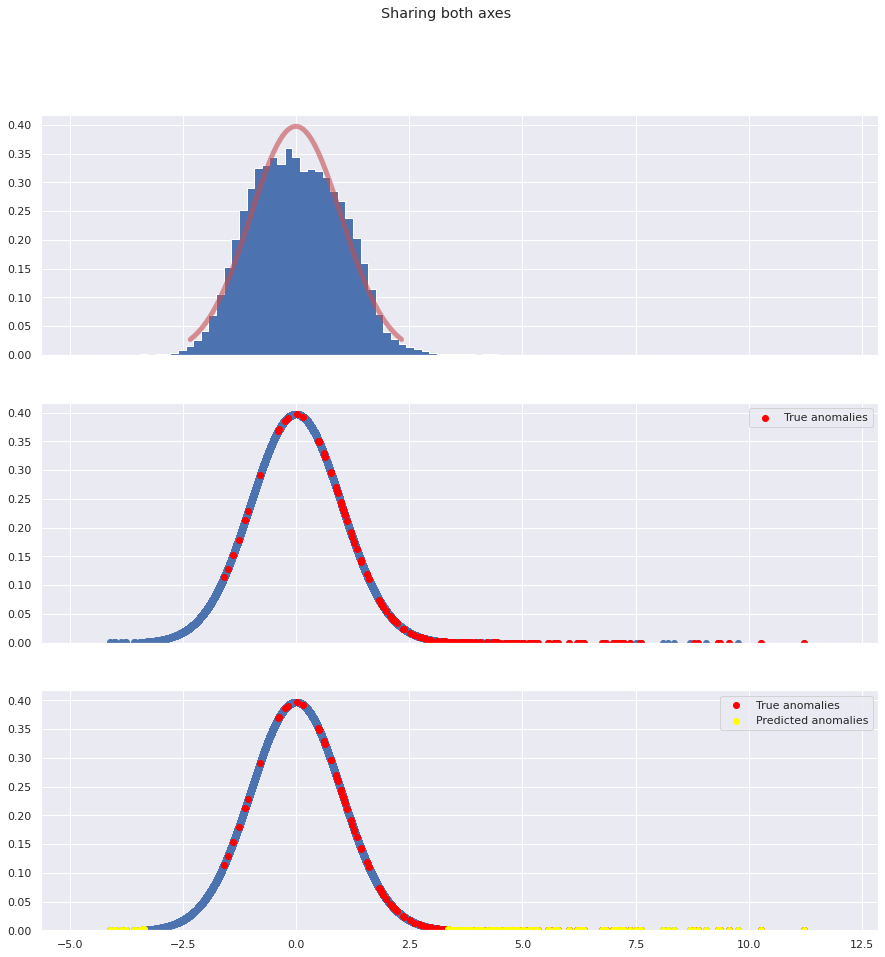

AUC: 0.883


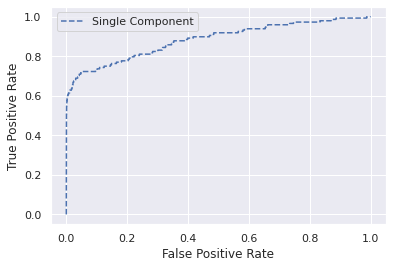

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


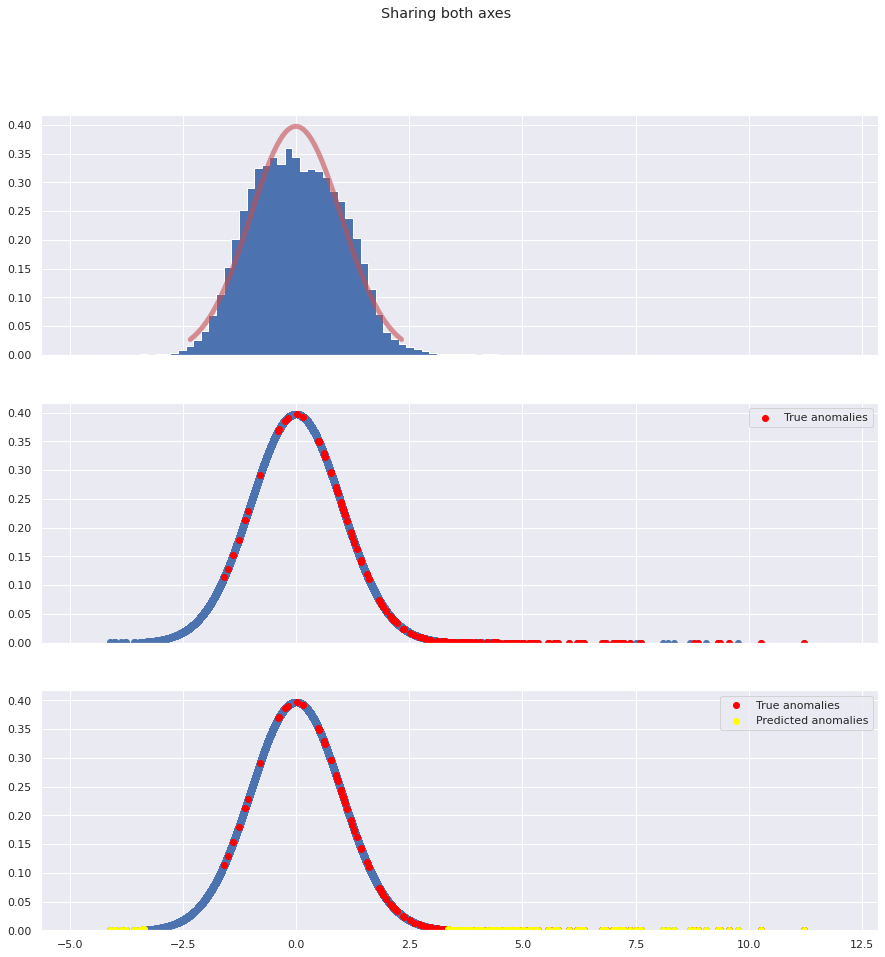

AUC: 0.883


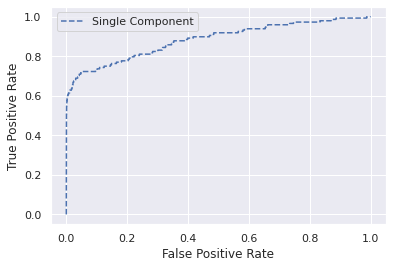

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


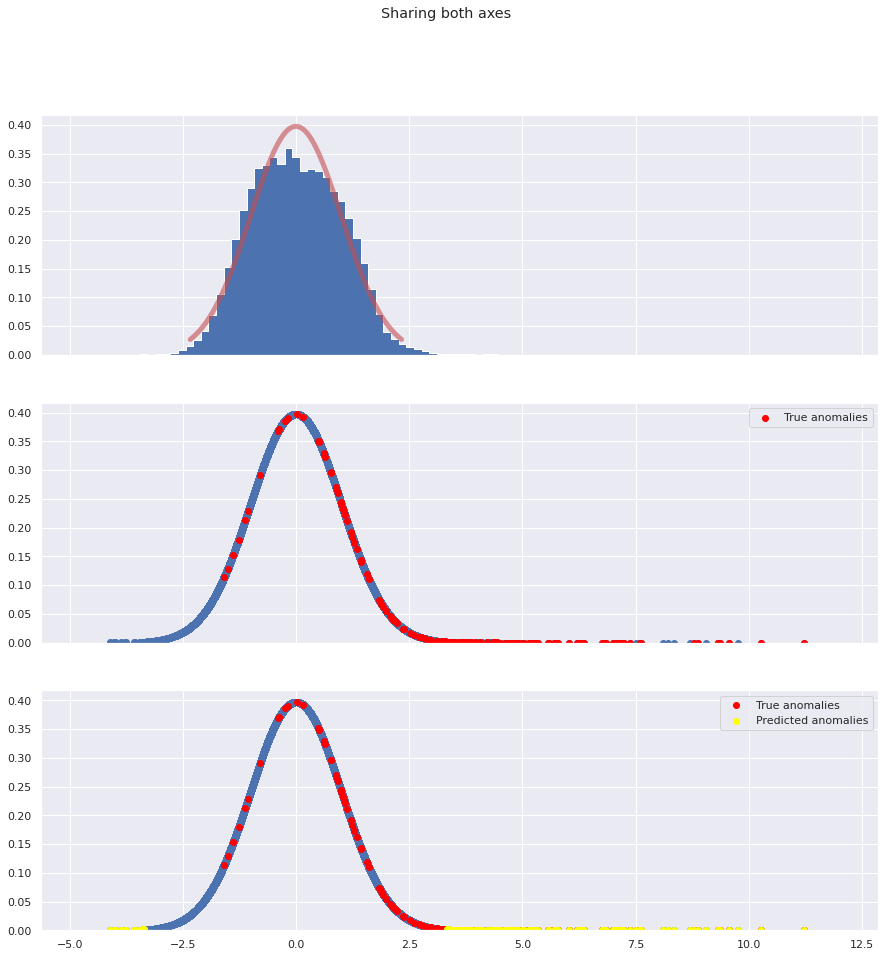

AUC: 0.883


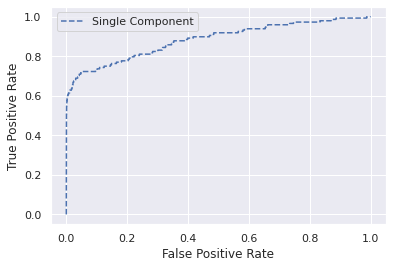

F1 score: 0.495
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


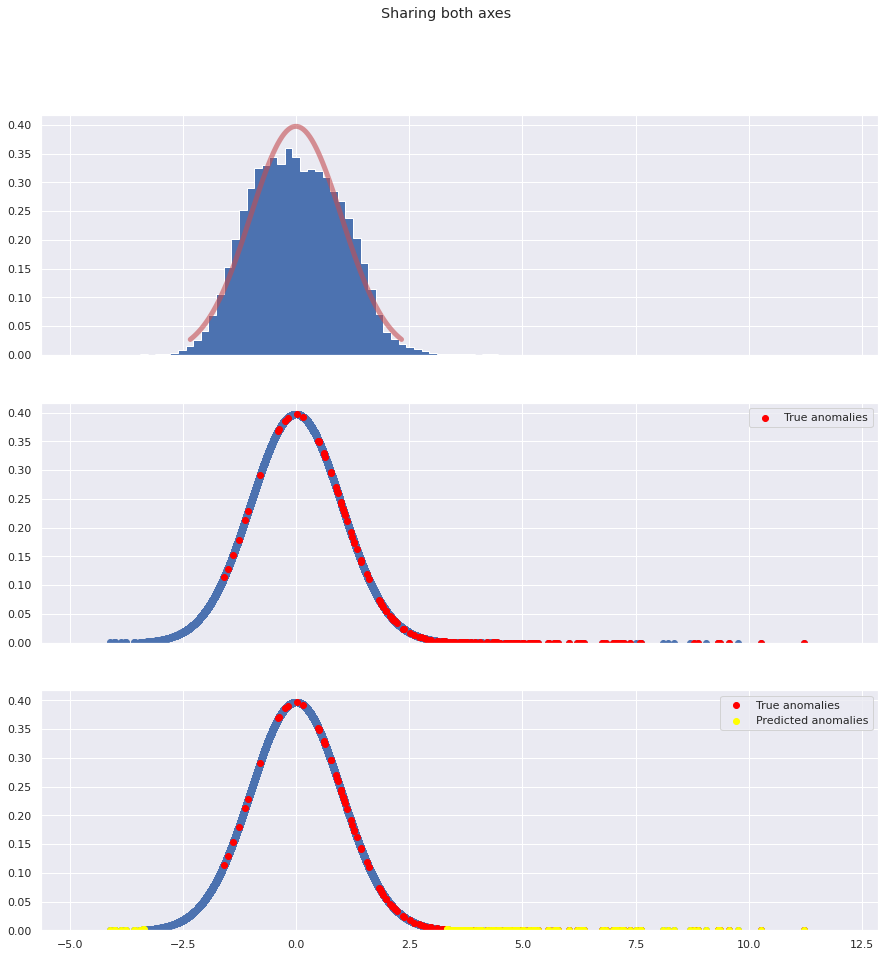

AUC: 0.883


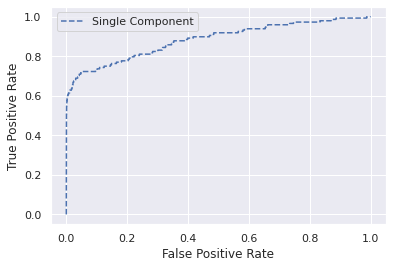

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


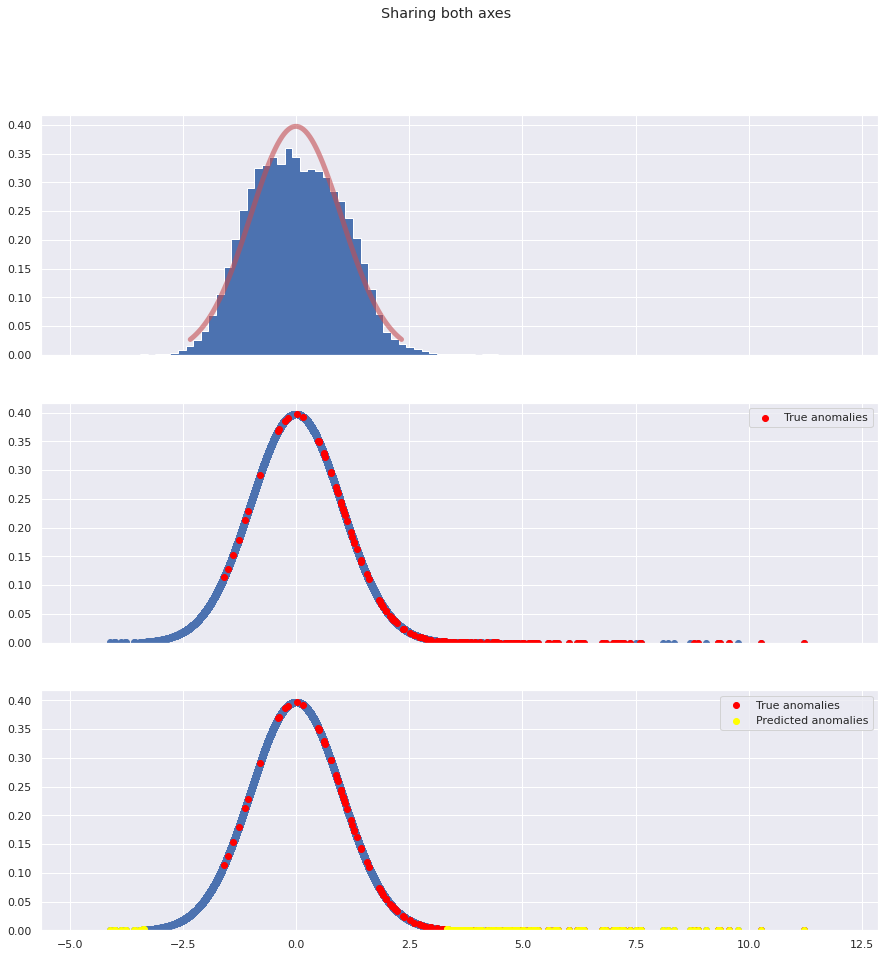

AUC: 0.883


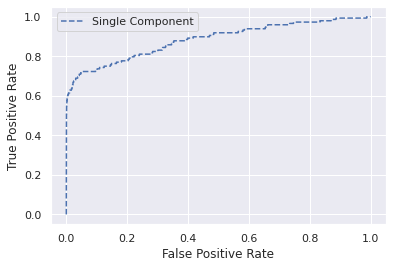

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


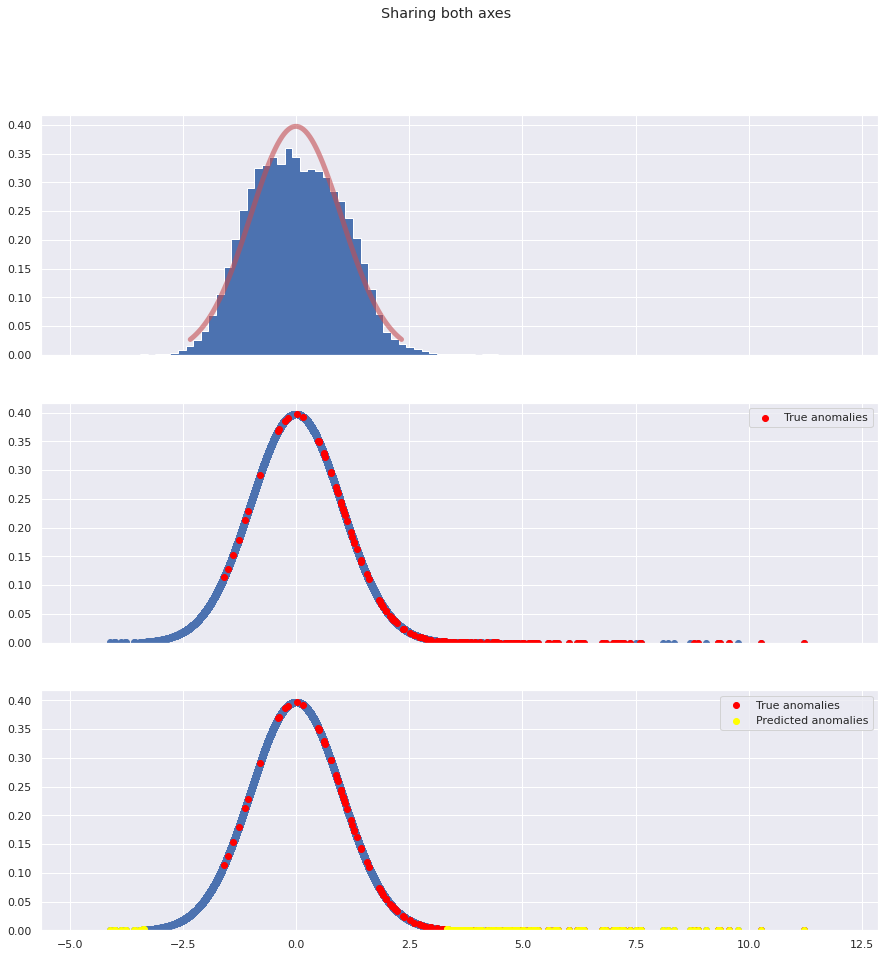

AUC: 0.883


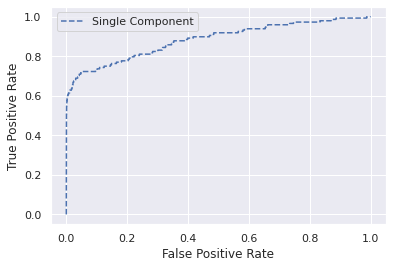

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


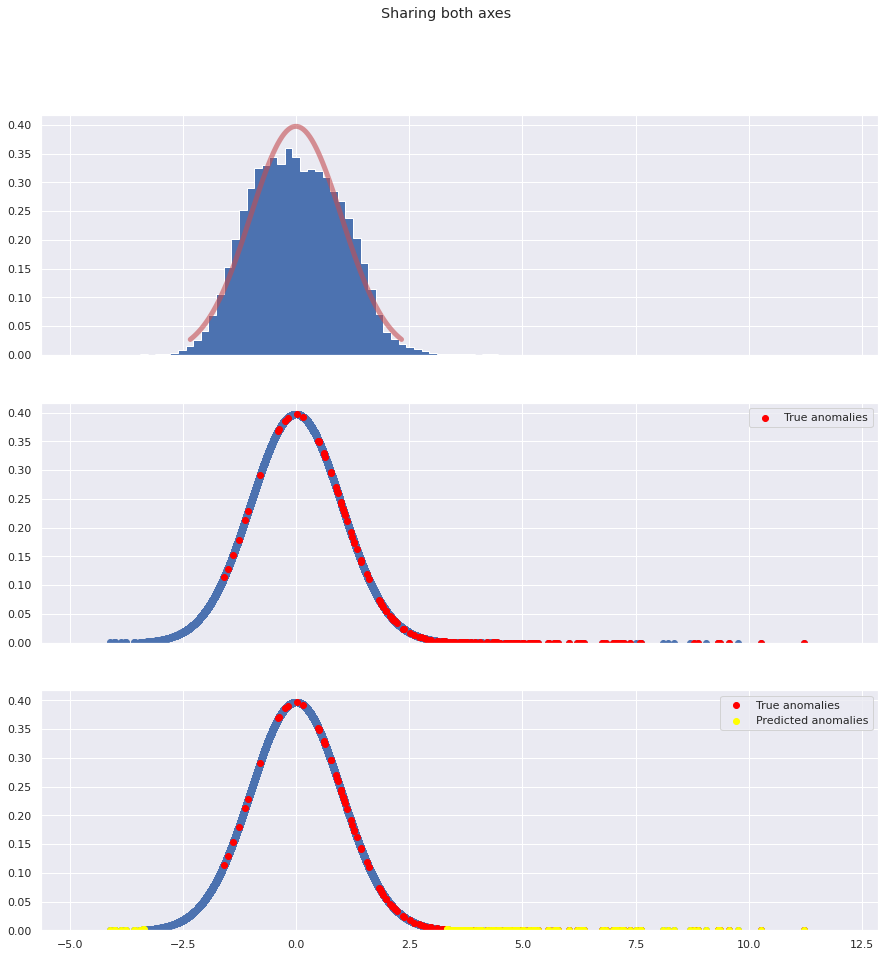

AUC: 0.883


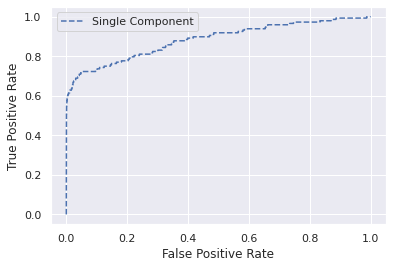

F1 score: 0.494
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


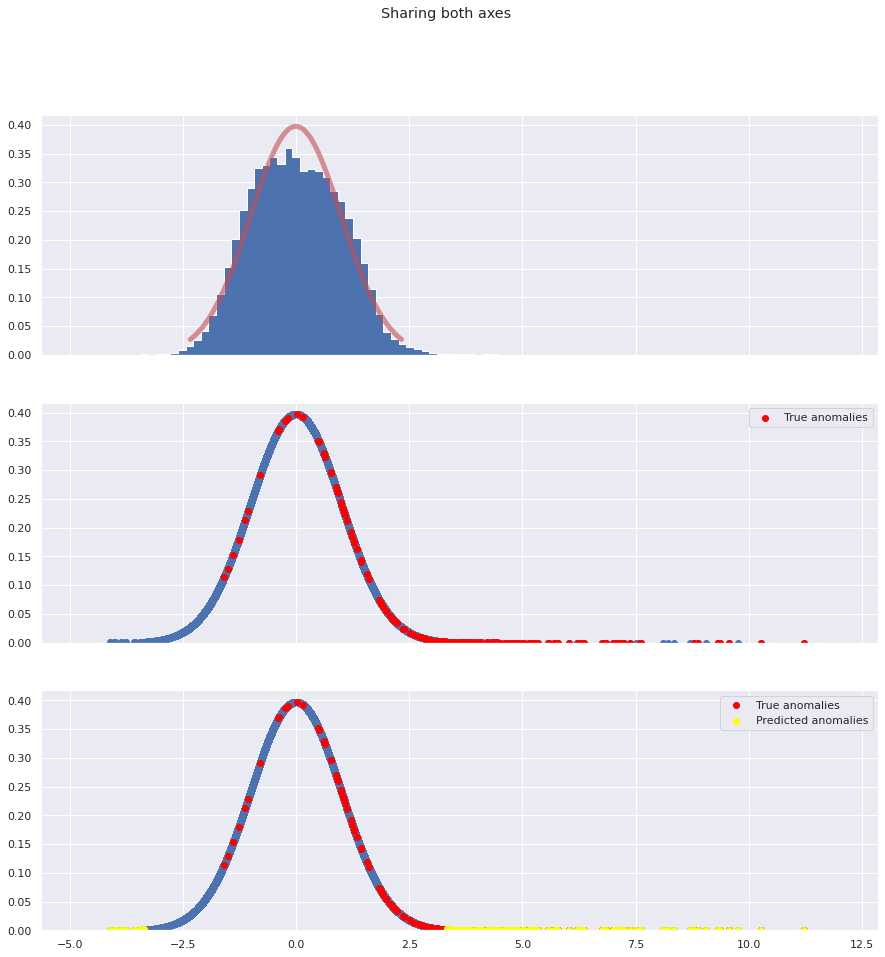

AUC: 0.883


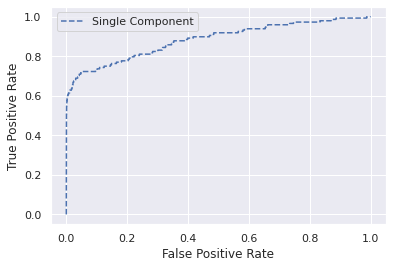

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


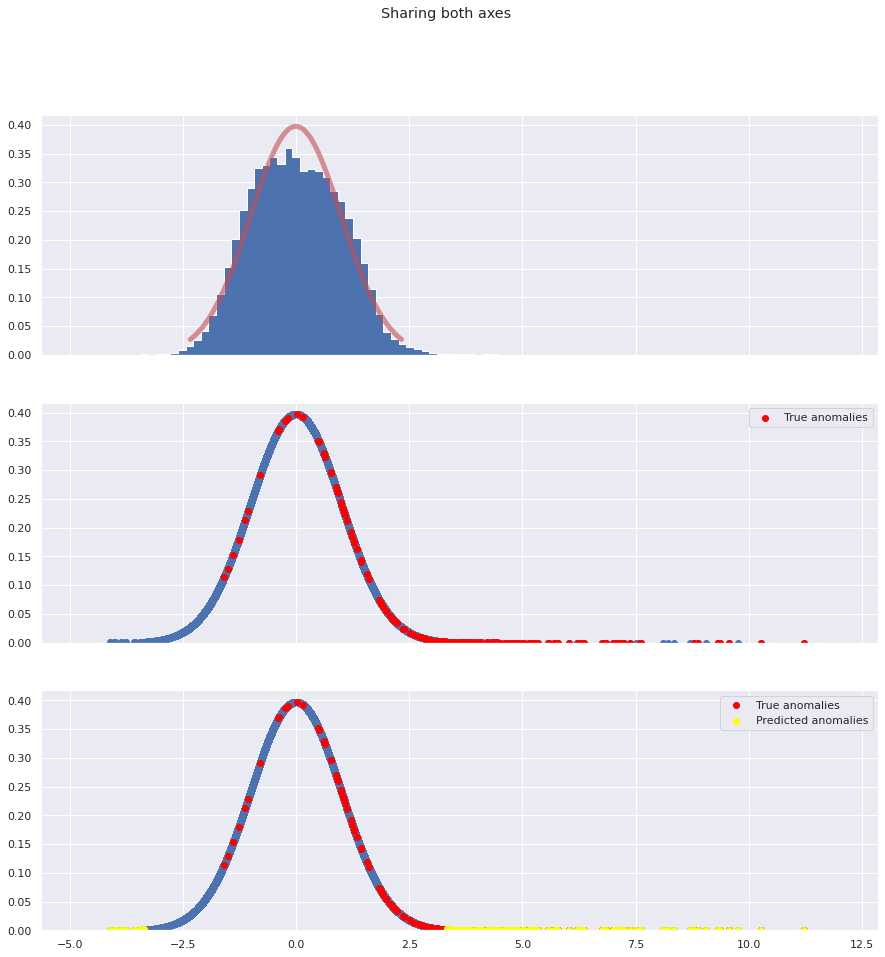

AUC: 0.883


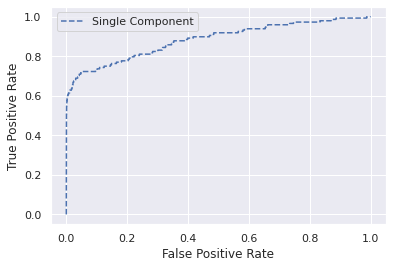

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


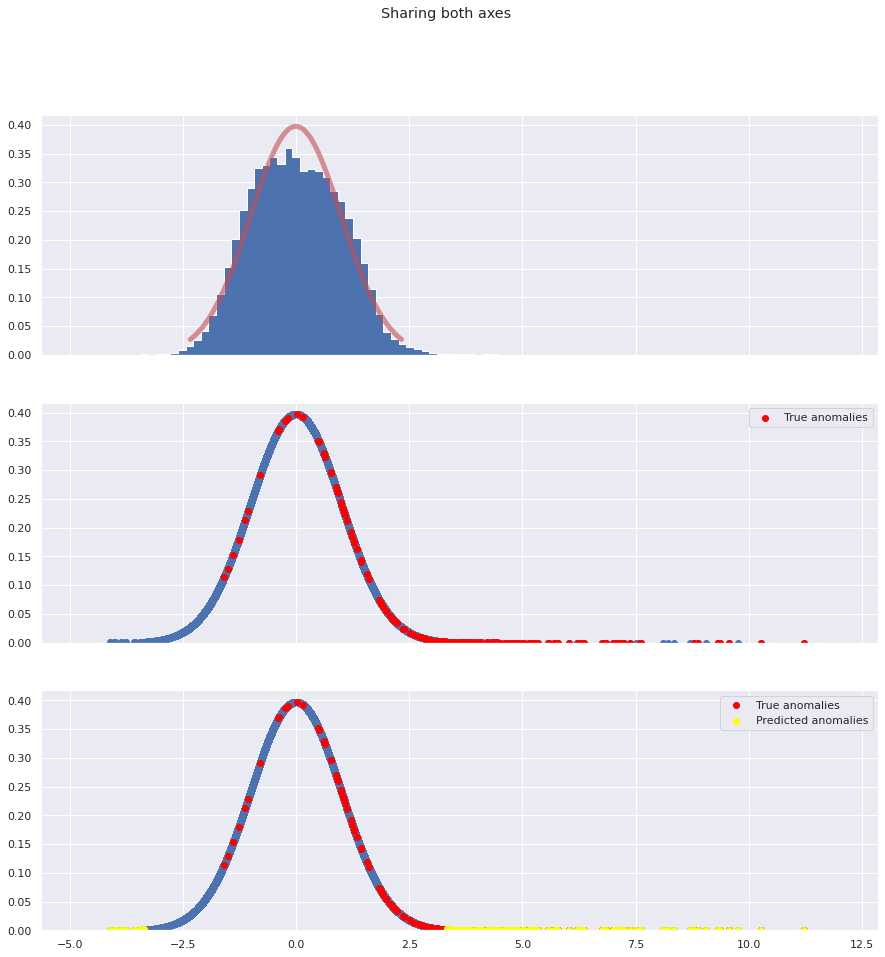

AUC: 0.883


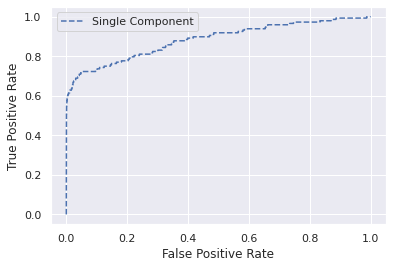

F1 score: 0.490
  var_name   epsilon       AUC  F1_score
0      V11  0.001060  0.883444  0.505051
0      V11  0.001085  0.883444  0.501672
0      V11  0.001086  0.883444  0.501672
0      V11  0.001109  0.883444  0.500000
0      V11  0.001126  0.883444  0.496689
0      V11  0.001150  0.883444  0.496689
0      V11  0.001157  0.883444  0.496689
0      V11  0.001164  0.883444  0.496689
0      V11  0.001179  0.883444  0.496689
0      V11  0.001181  0.883444  0.496689
0      V11  0.001191  0.883444  0.496689
0      V11  0.001194  0.883444  0.496689
0      V11  0.001209  0.883444  0.496689
0      V11  0.001274  0.883444  0.500000
0      V11  0.001289  0.883444  0.500000
0      V11  0.001307  0.883444  0.500000
0      V11  0.001318  0.883444  0.500000
0      V11  0.001325  0.883444  0.500000
0      V11  0.001338  0.883444  0.498361
0      V11  0.001379  0.883444  0.495114
0      V11  0.001394  0.883444  0.495114
0      V11  0.001420  0.883444  0.493506
0      V11  0.001422  0.883444  0.493506


In [22]:
y_test = y_test['Class']

for i in range(0, len(epsilons)): 
  var_name = 'V11'
  epsilon = epsilons[i]
  print("Epsilon: {}".format(epsilon))

  arr = np.array(non_fraud_X_train[var_name])
  std_dev = np.std(arr)
  mean = np.mean(arr)


  norm = stats.norm(

      loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )


  fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
  fig.suptitle('Sharing both axes')


  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  axs[0].plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


  x = np.array(X_test[var_name])
  mu = mean
  sigma = std_dev
  probs = p_x(x, mu, sigma)
  preds = np.where(probs < epsilon, 1, 0)

  summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


  axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[1].legend()



  axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
  axs[2].legend()



  plt.show()


  fpr, tpr, thresholds = roc_curve(summary_df['y_test'], 1-summary_df['p(x)'])
  auc = roc_auc_score(summary_df['y_test'], 1-summary_df['p(x)'])
  print('AUC: %.3f' % auc)

  fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


  from sklearn.metrics import f1_score

  f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
  print("F1 score: %.3f" % f1_score)

  new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

  results = results.append(new_results)
  results = results.drop_duplicates()
  print(results)

In [23]:
results.reset_index(inplace=True)

In [24]:
optimal_epsilon = results.sort_values(by='F1_score', ascending=False)['epsilon'].iloc[0]

### Optimal epsilon is 0.0010595747656947326

In [25]:
optimal_epsilon

0.0010595747656947326

### Fitting to different variables to find best auc

In [26]:
start_index = list(X_train.columns).index('V1')
end_index = list(X_train.columns).index('V28')

In [27]:
X_train

index      Time        V1  ...       V28   Amount    rows
0        37372   38927.0  1.016658  ...  0.010645    13.70   37372
1       215884  140262.0 -2.546080  ... -0.191483     1.00  215884
2        98616   66732.0  1.336743  ...  0.011304    55.00   98616
3       172195  120995.0 -1.033347  ... -0.017385   389.98  172195
4        19496   30328.0 -0.440280  ...  0.088869    60.80   19496
...        ...       ...       ...  ...       ...      ...     ...
190815   21440   31666.0 -2.986845  ...  0.404045  2312.26   21440
190816  117583   74729.0  0.937083  ...  0.023771   171.32  117583
190817   73349   55095.0 -1.149963  ...  0.031193     7.58   73349
190818  267336  162728.0  1.754554  ... -0.019622    94.80  267336
190819  128037   78576.0 -0.707635  ... -0.205589    57.80  128037

[190820 rows x 32 columns]

In [28]:
possible_vars = list(X_train.columns)[start_index:end_index+1]

In [29]:
possible_vars

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [30]:
summary_df

X_test      p(x)  y_test  y_pred
0     -0.854023  0.278297     0.0     0.0
1      0.096501  0.395414     0.0     0.0
2     -0.813214  0.287780     0.0     0.0
3      0.905210  0.263101     0.0     0.0
4      0.101512  0.395206     0.0     0.0
...         ...       ...     ...     ...
93982 -0.504610  0.351450     0.0     0.0
93983  1.482063  0.132315     0.0     0.0
93984  0.334963  0.375143     0.0     0.0
93985  0.710627  0.307932     0.0     0.0
93986 -0.484270  0.354930     0.0     0.0

[93987 rows x 4 columns]

Epsilon: 0.0010595747656947326


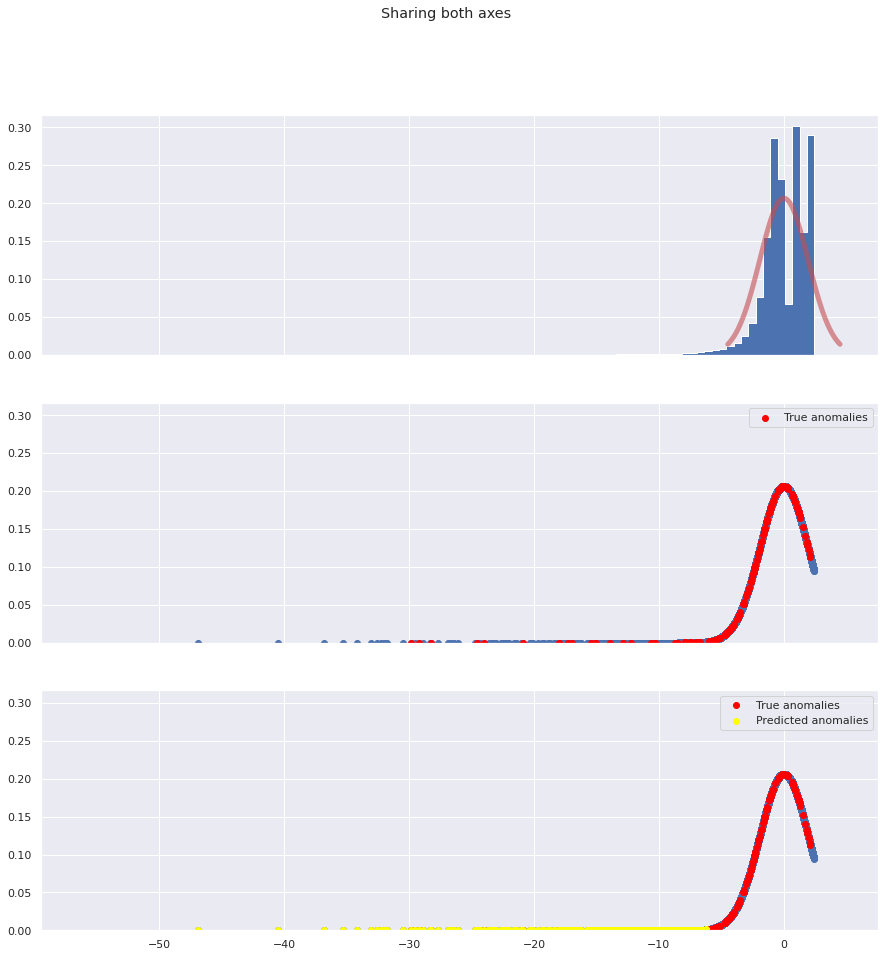

AUC: 0.702


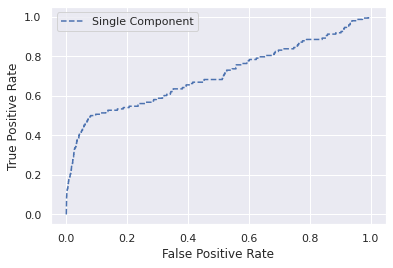

F1 score: 0.047
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

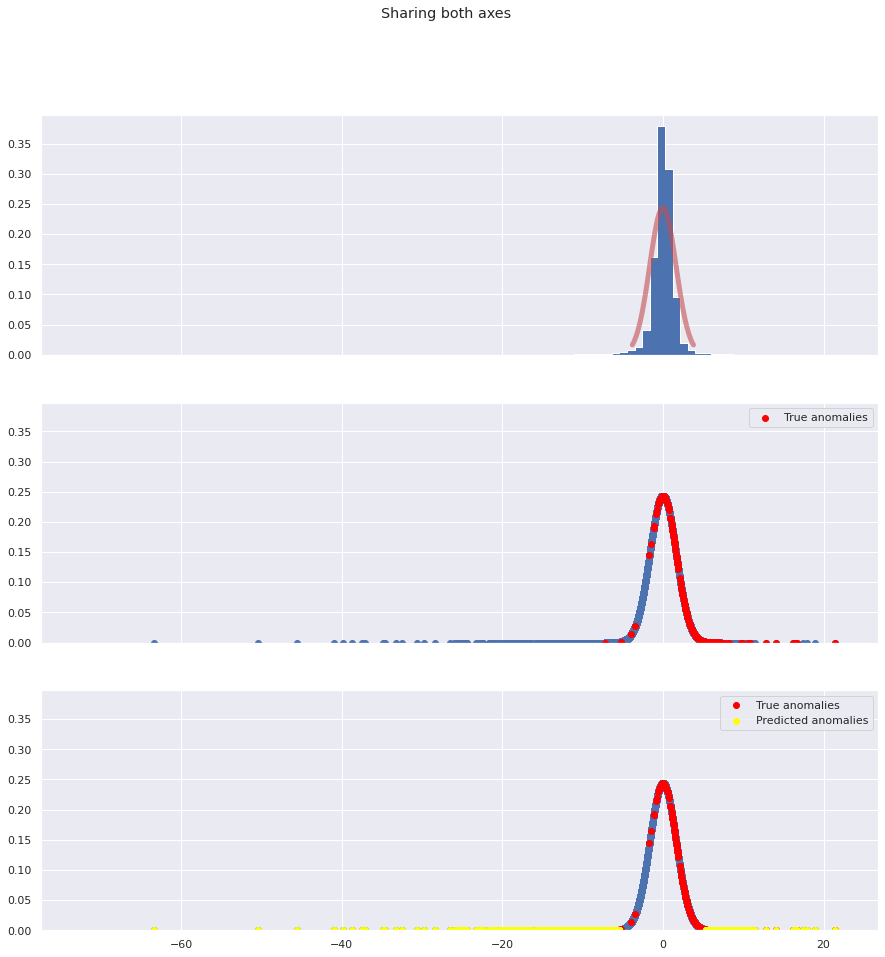

AUC: 0.829


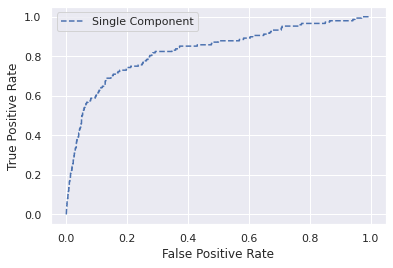

F1 score: 0.039
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

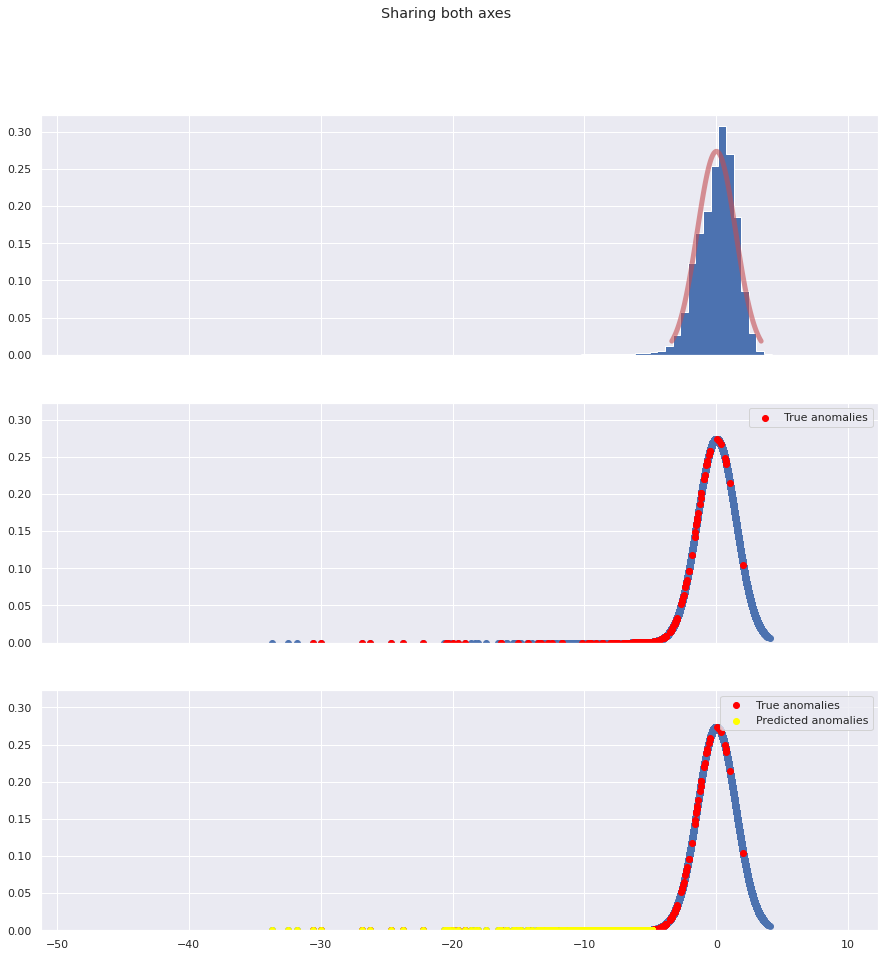

AUC: 0.884


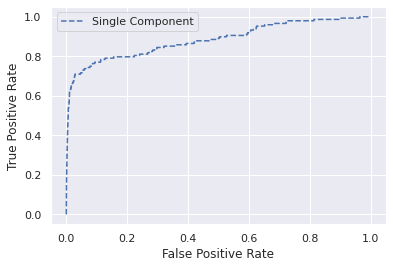

F1 score: 0.195
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

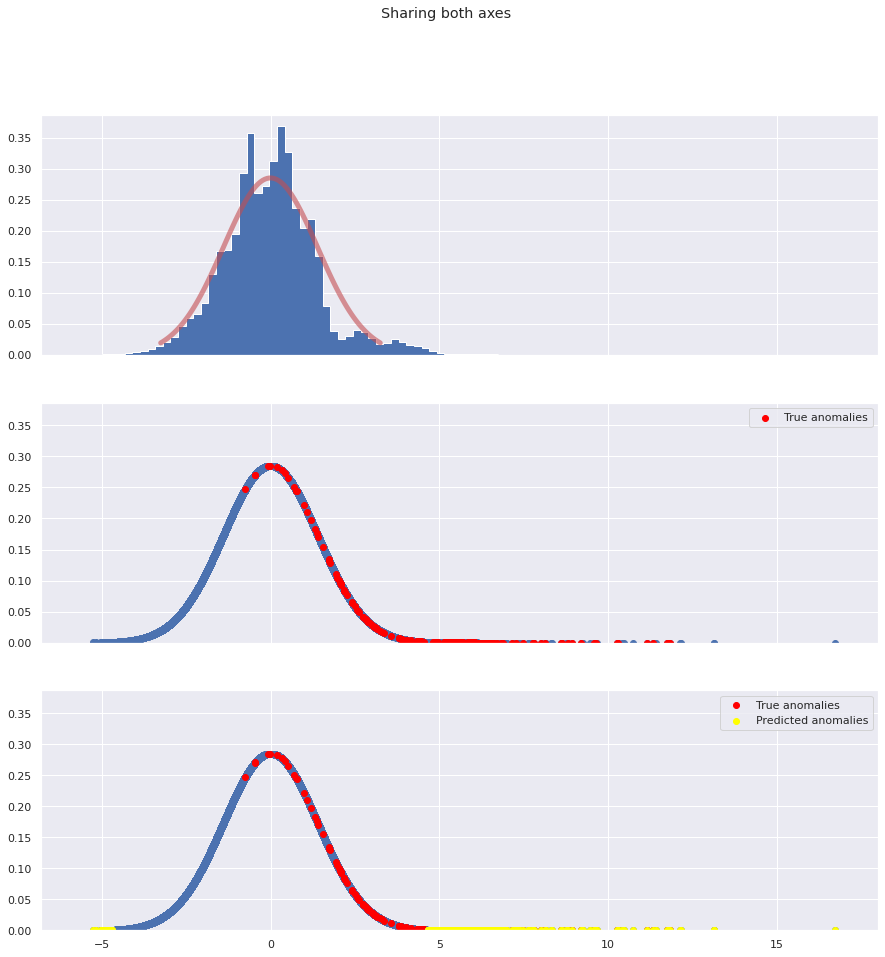

AUC: 0.903


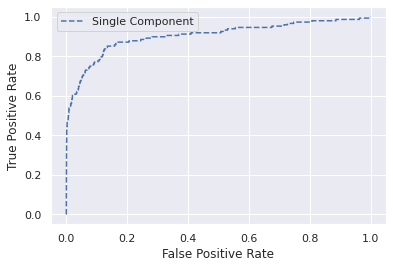

F1 score: 0.221
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

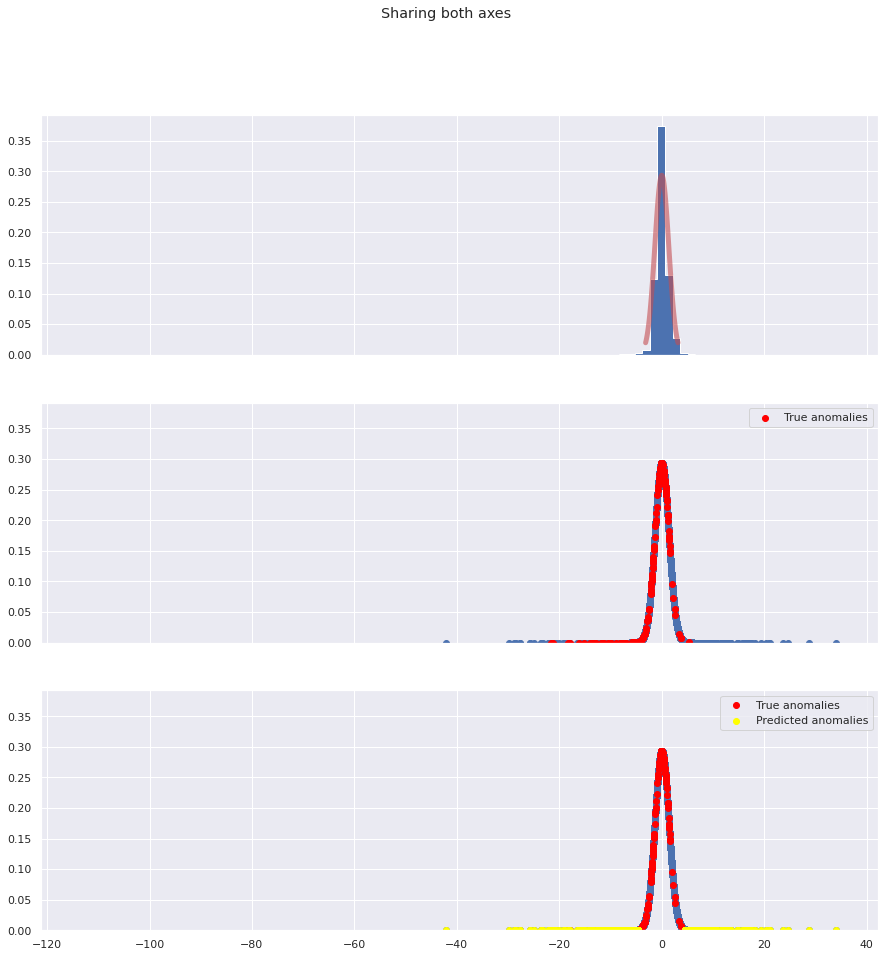

AUC: 0.752


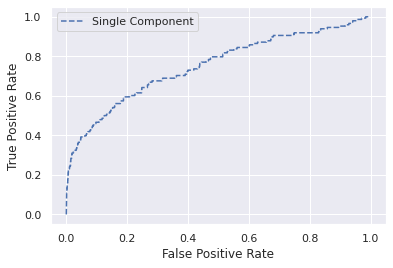

F1 score: 0.073
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

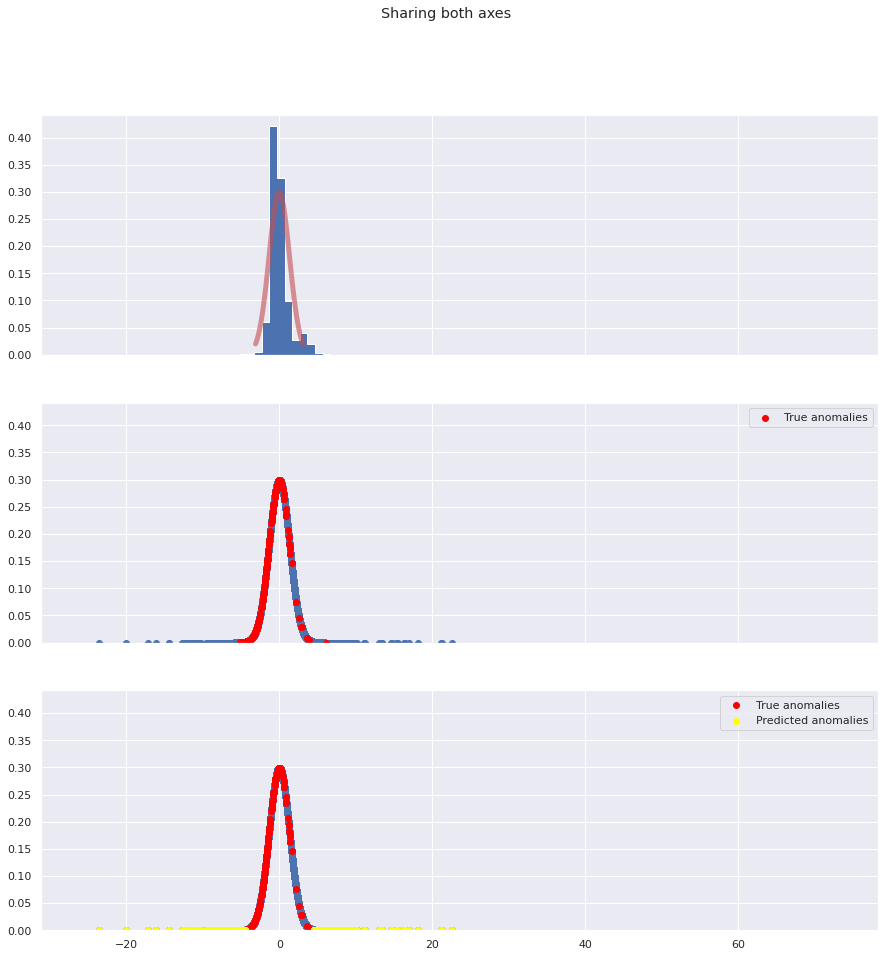

AUC: 0.722


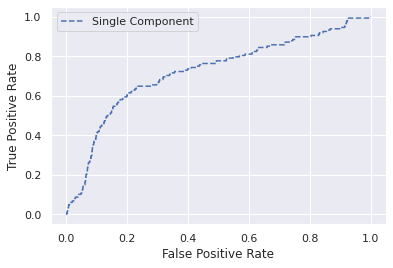

F1 score: 0.012
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

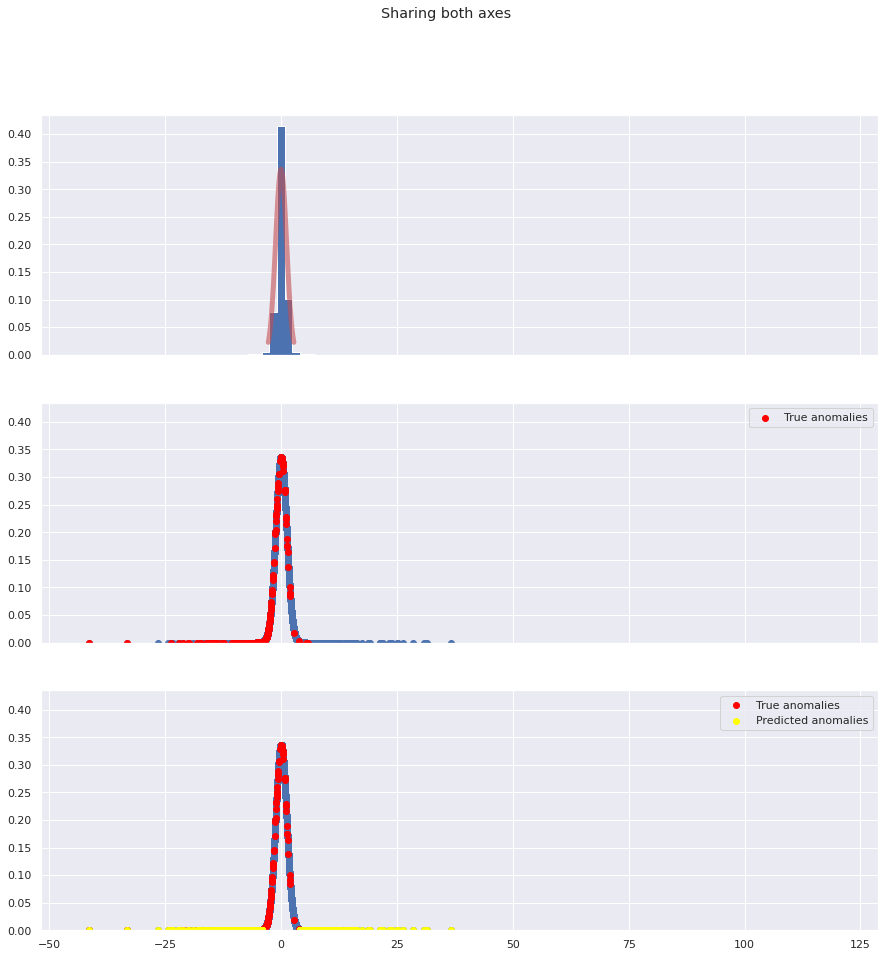

AUC: 0.868


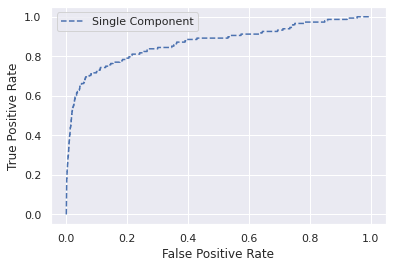

F1 score: 0.099
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

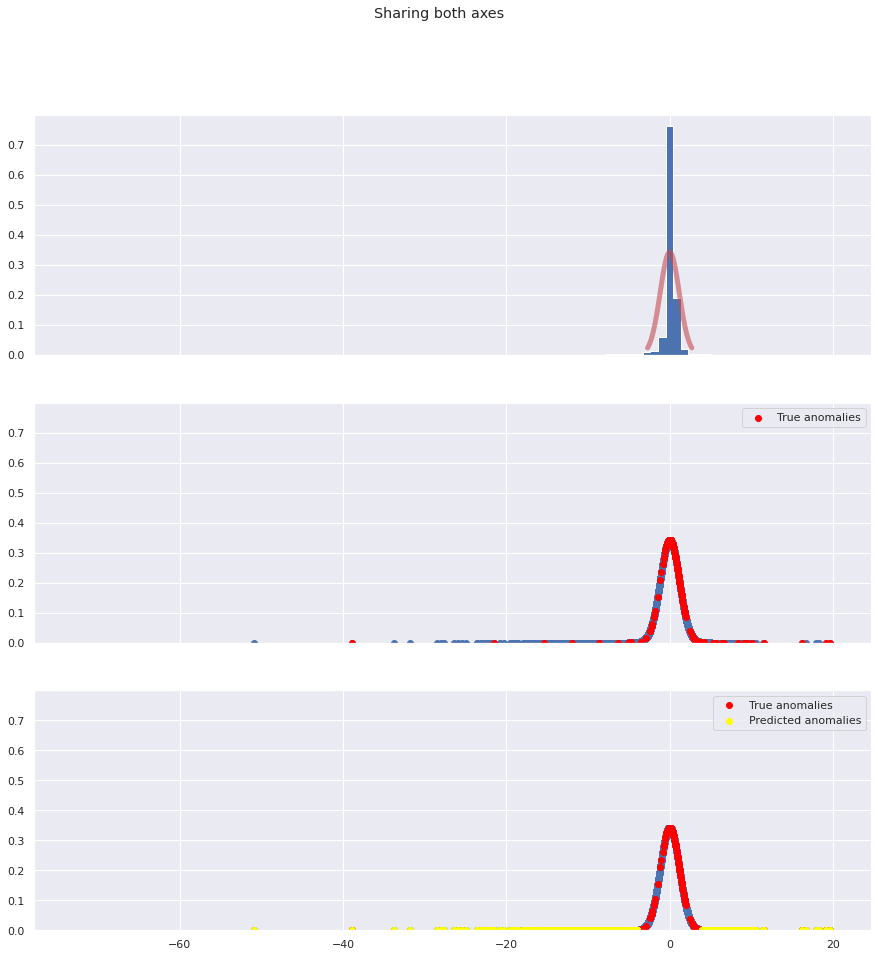

AUC: 0.773


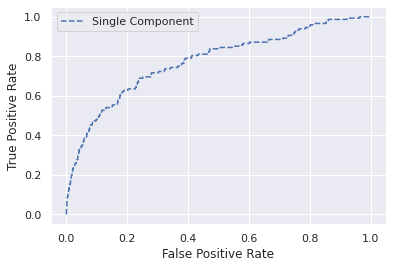

F1 score: 0.033
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

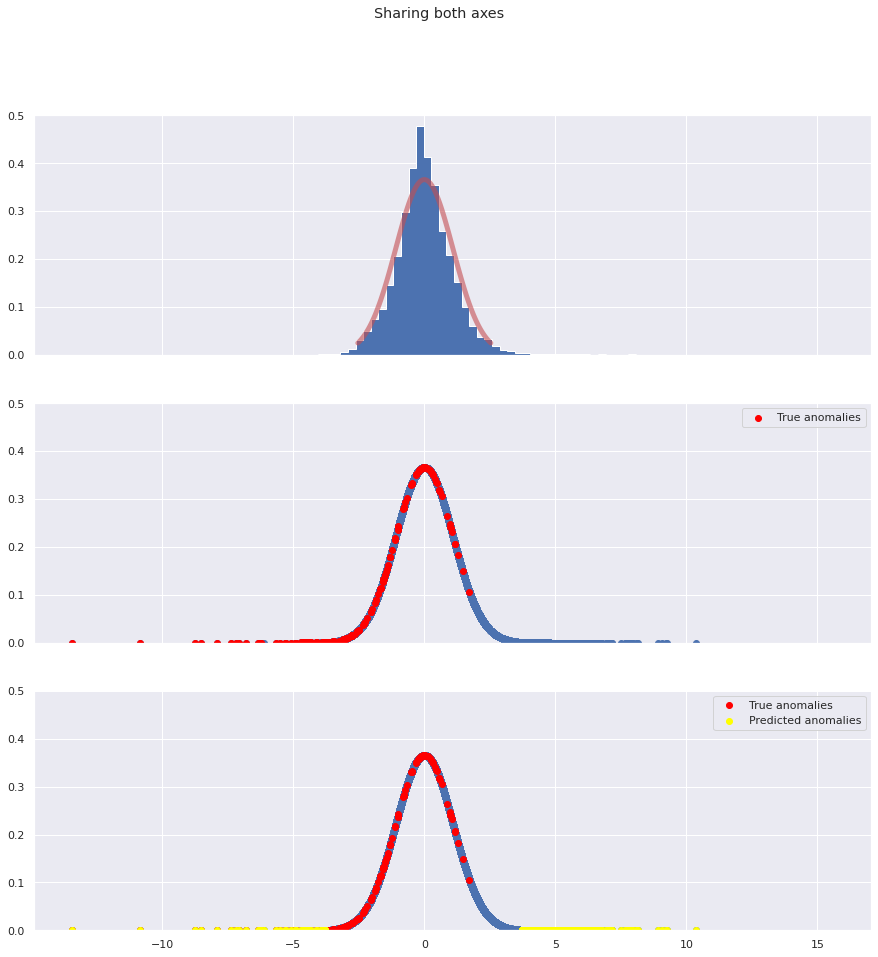

AUC: 0.770


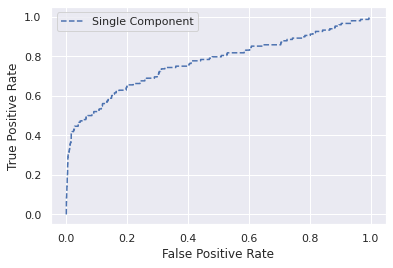

F1 score: 0.117
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

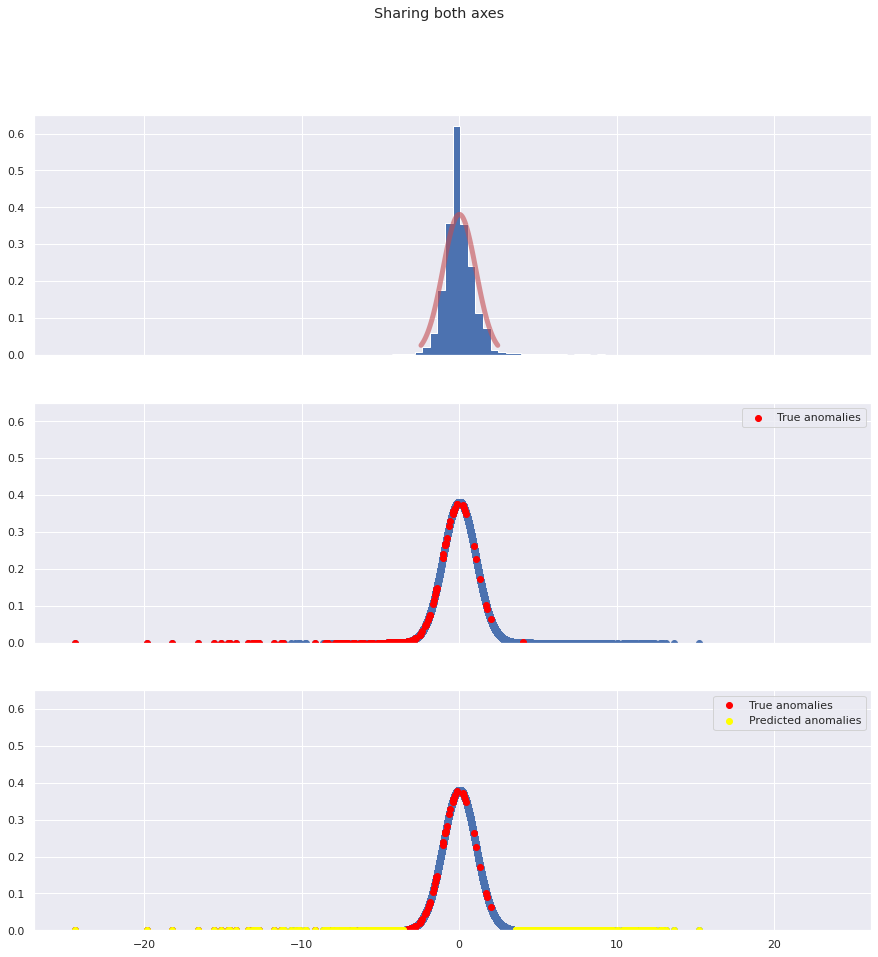

AUC: 0.914


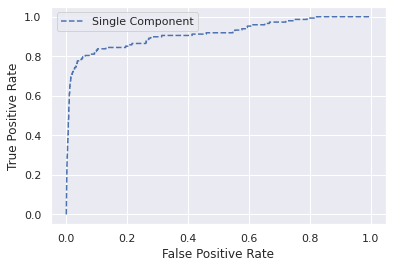

F1 score: 0.149
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

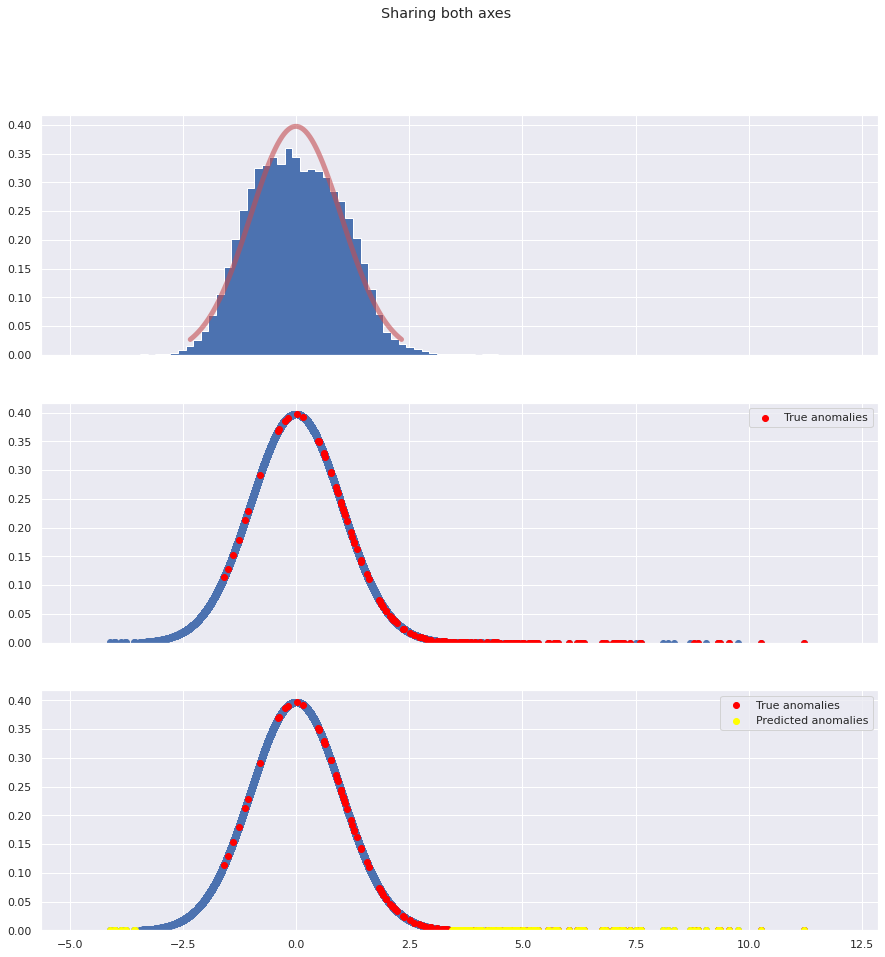

AUC: 0.883


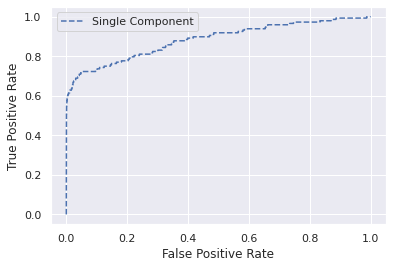

F1 score: 0.505
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

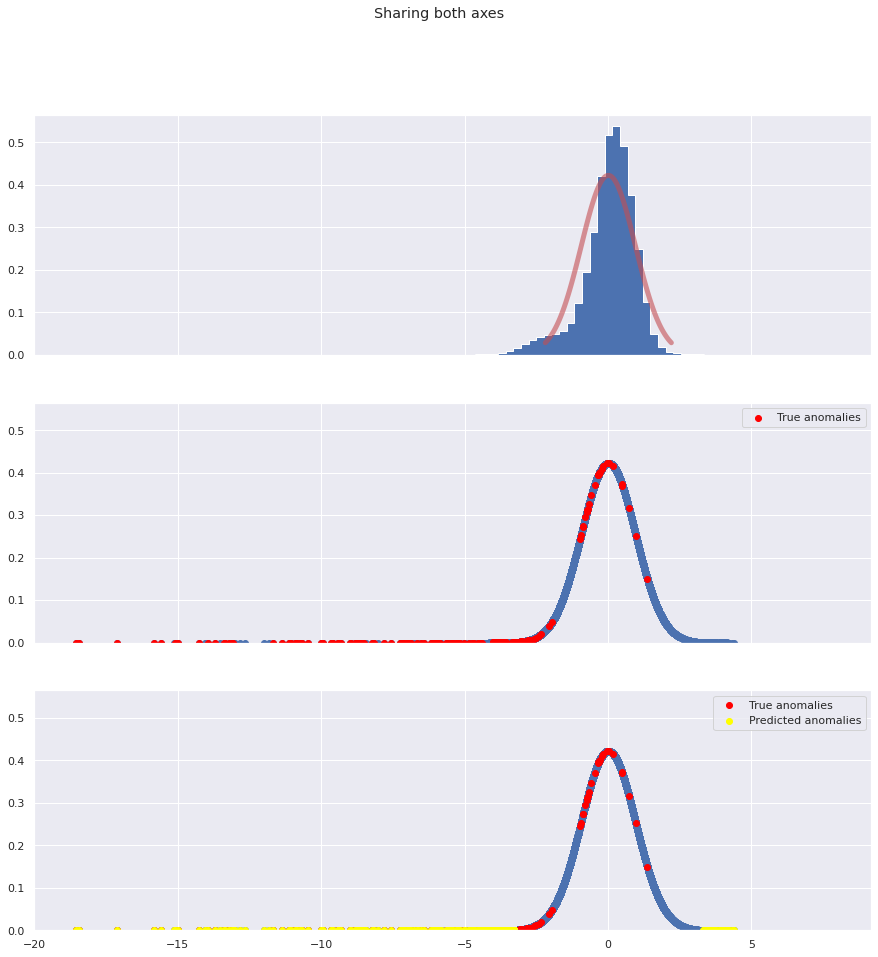

AUC: 0.907


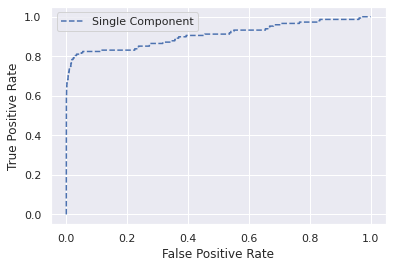

F1 score: 0.258
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

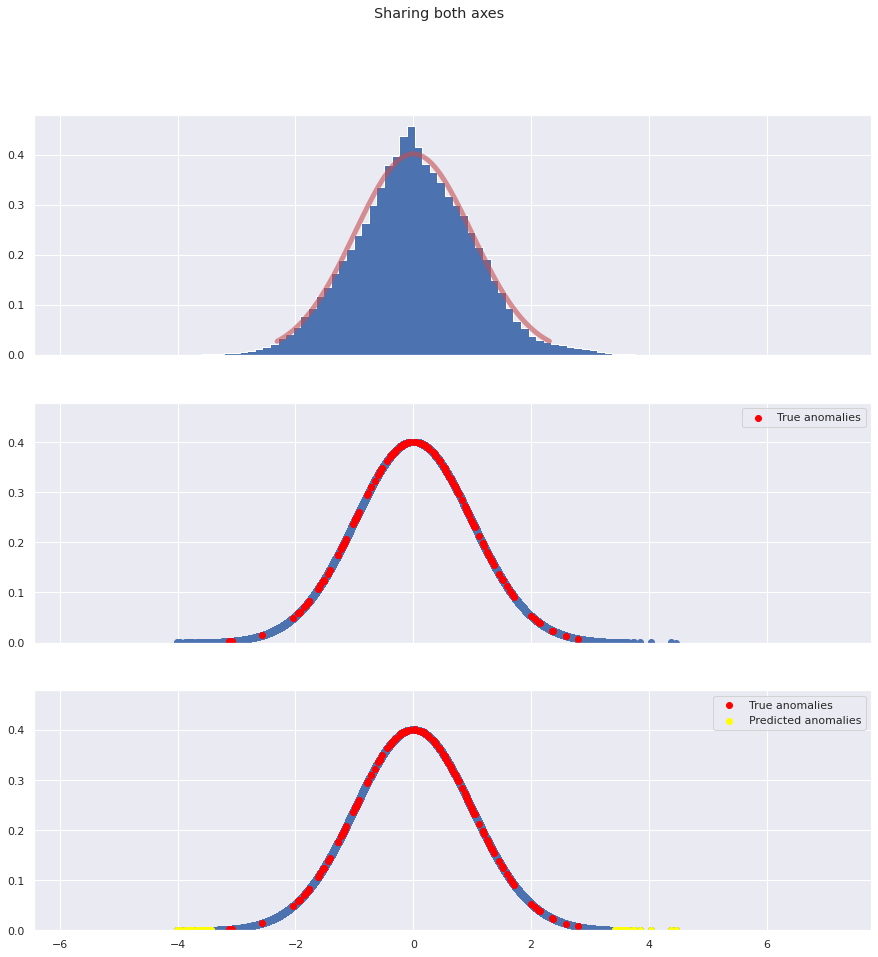

AUC: 0.581


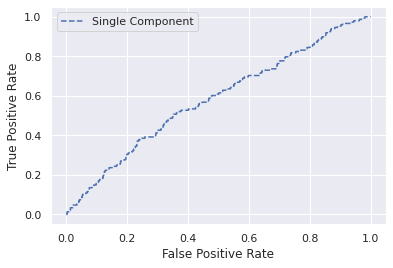

F1 score: 0.000
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

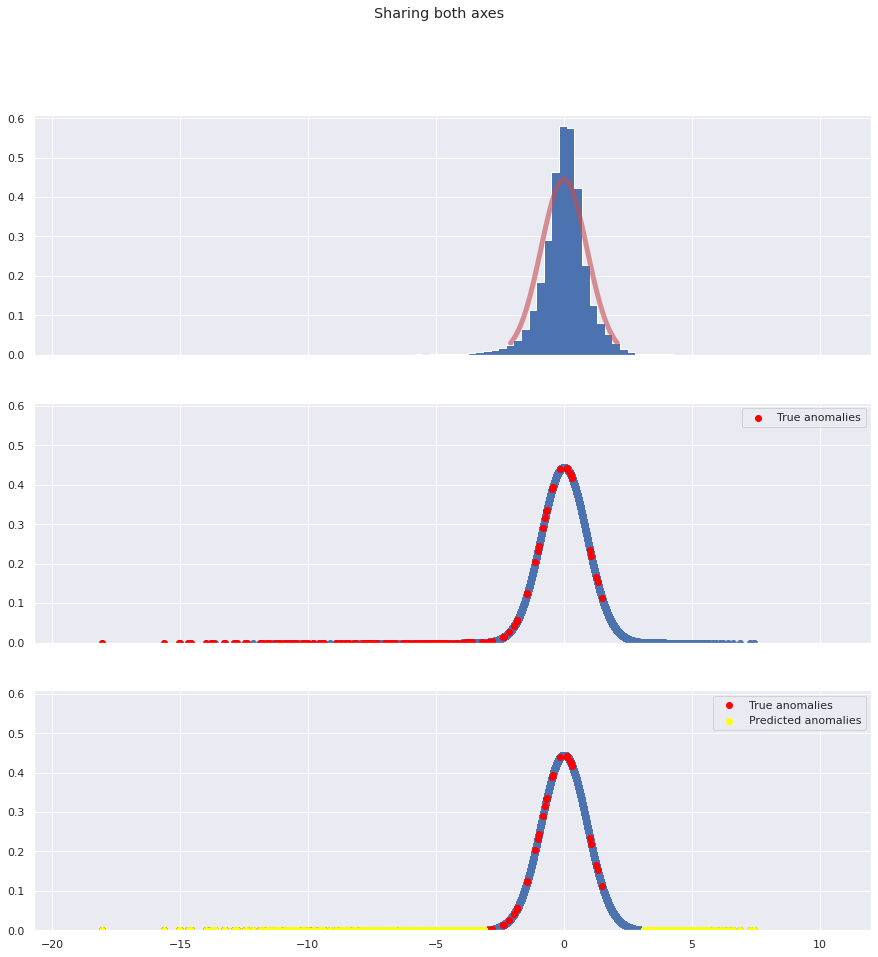

AUC: 0.941


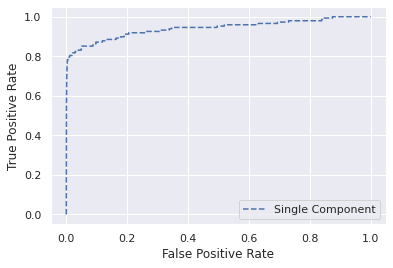

F1 score: 0.233
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

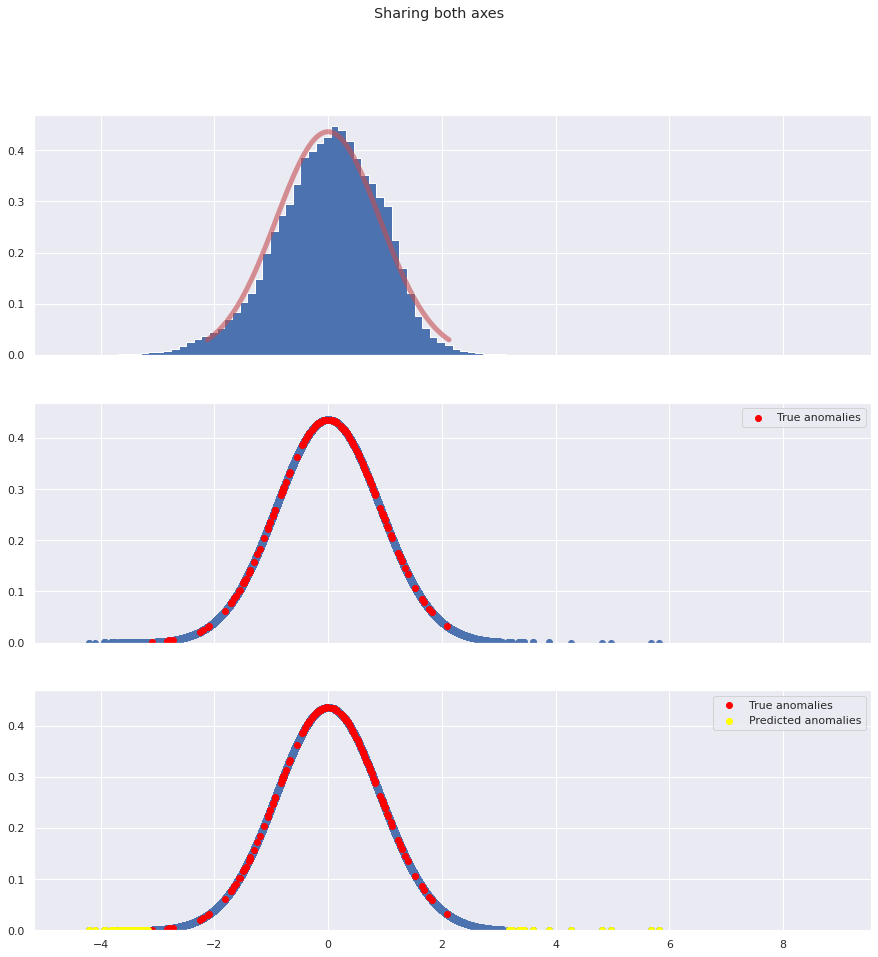

AUC: 0.538


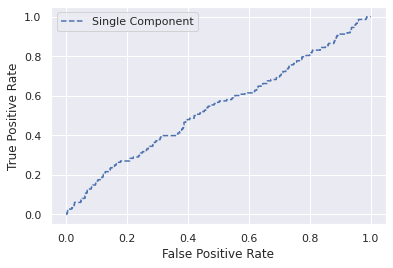

F1 score: 0.000
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

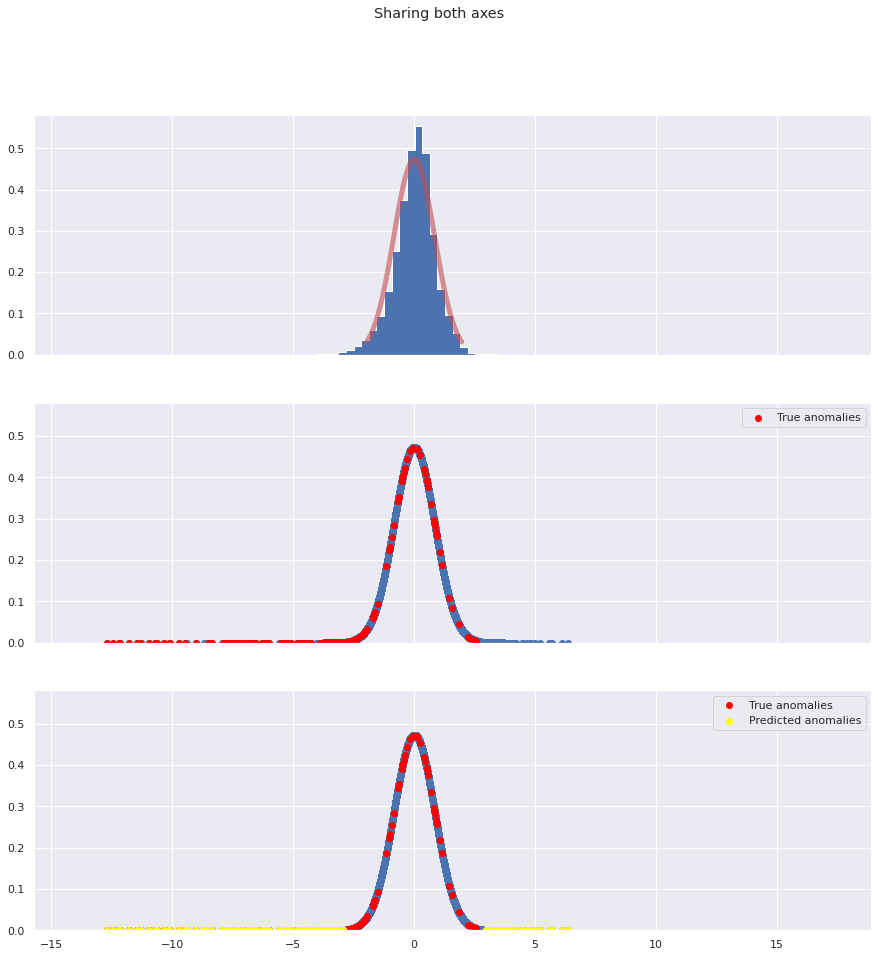

AUC: 0.889


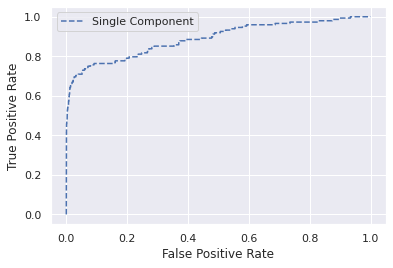

F1 score: 0.275
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

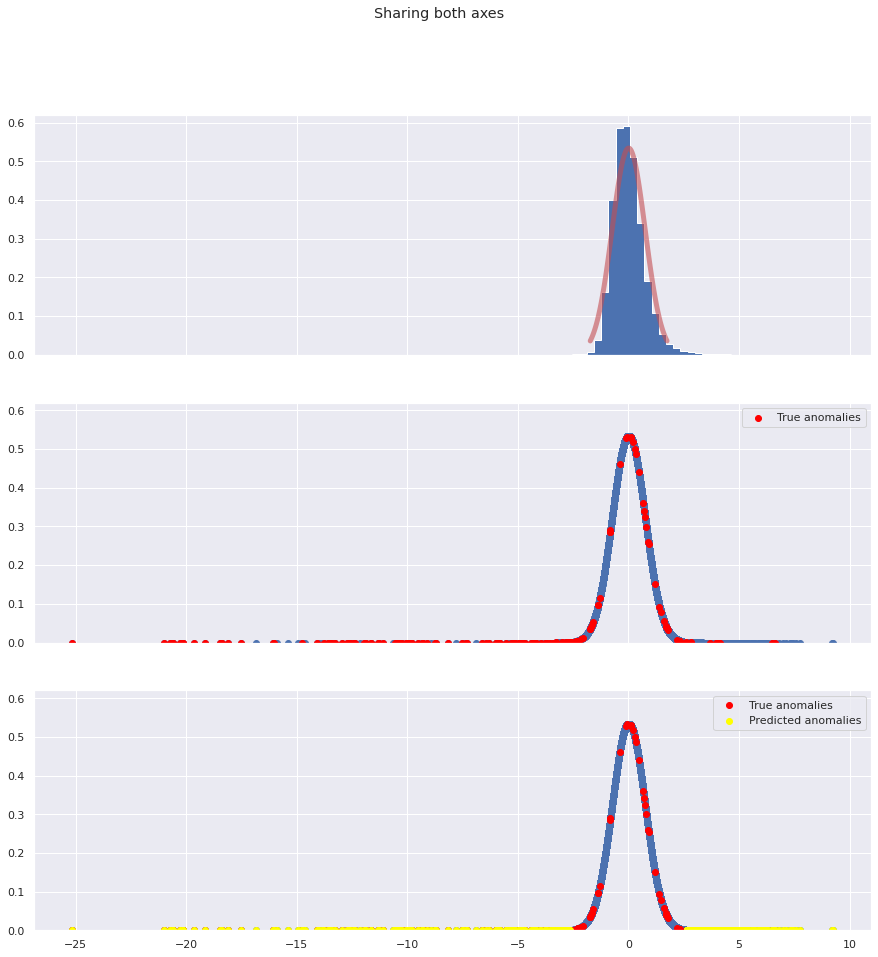

AUC: 0.930


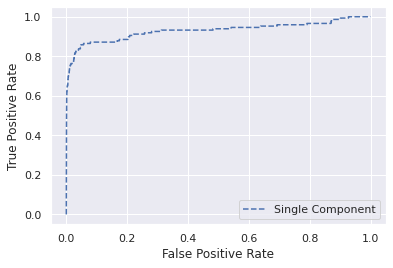

F1 score: 0.235
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

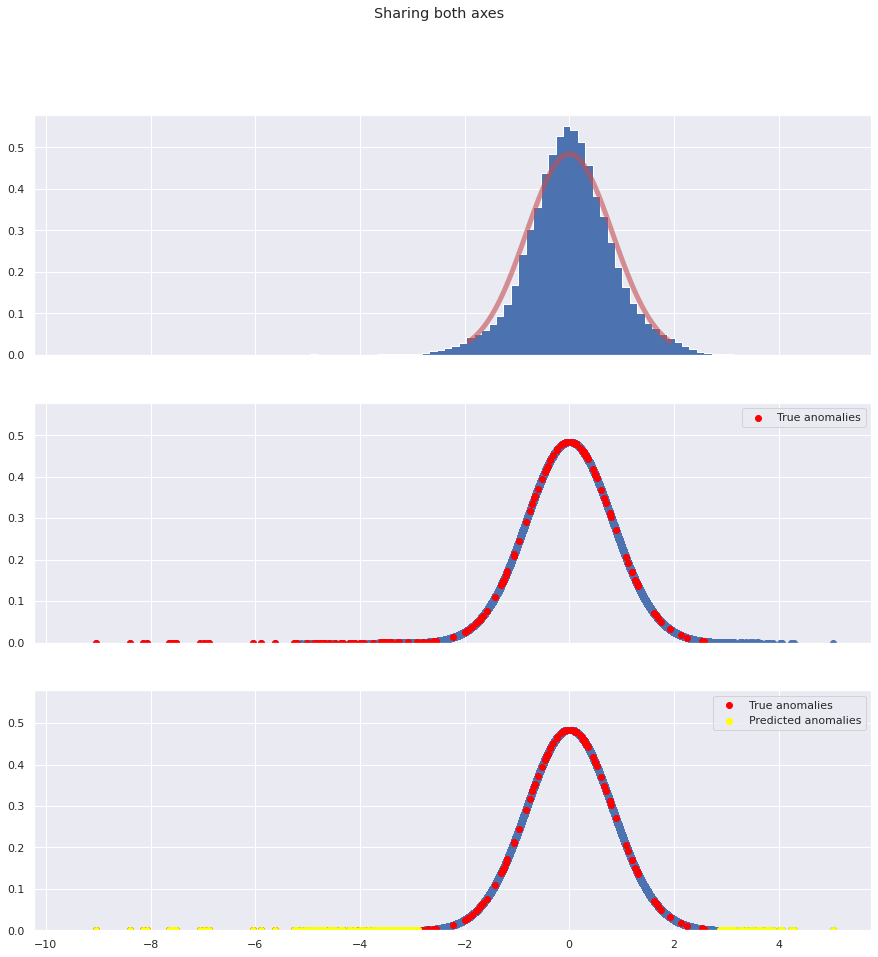

AUC: 0.765


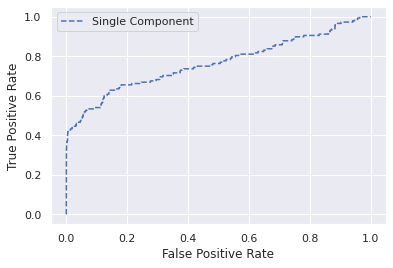

F1 score: 0.305
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

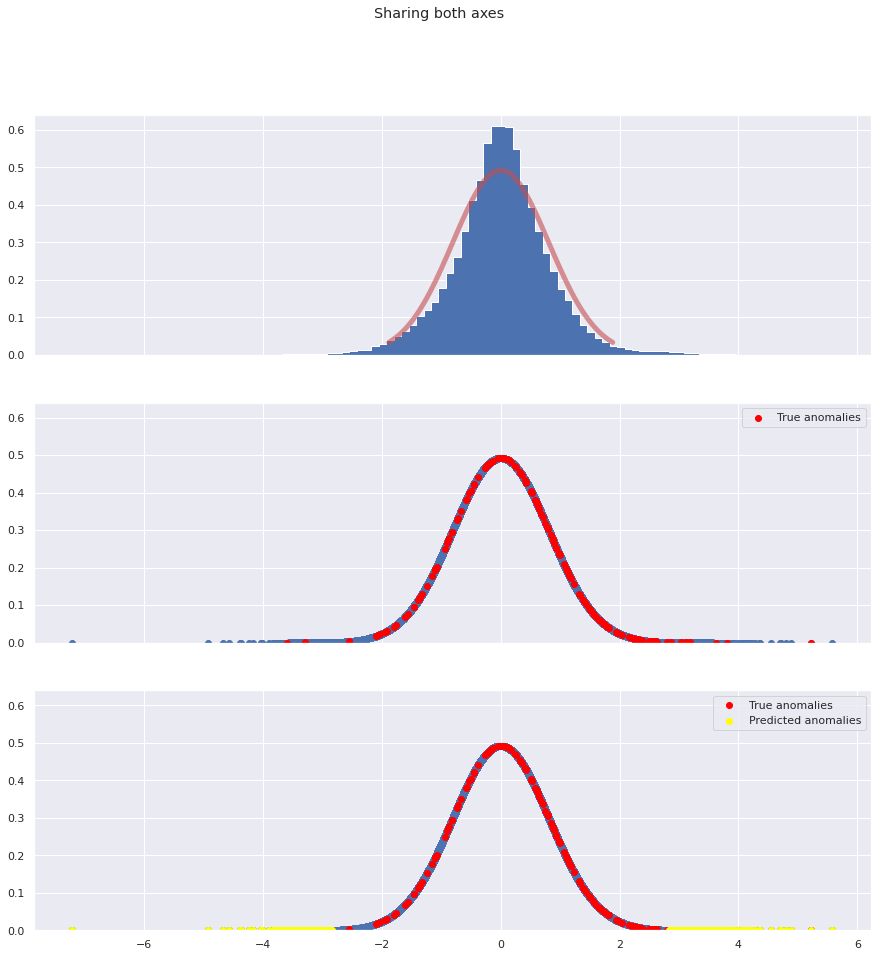

AUC: 0.742


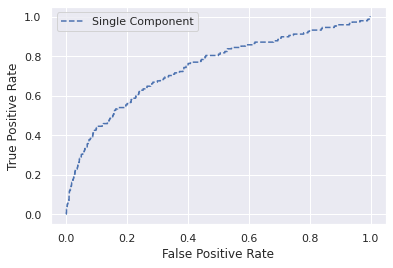

F1 score: 0.026
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

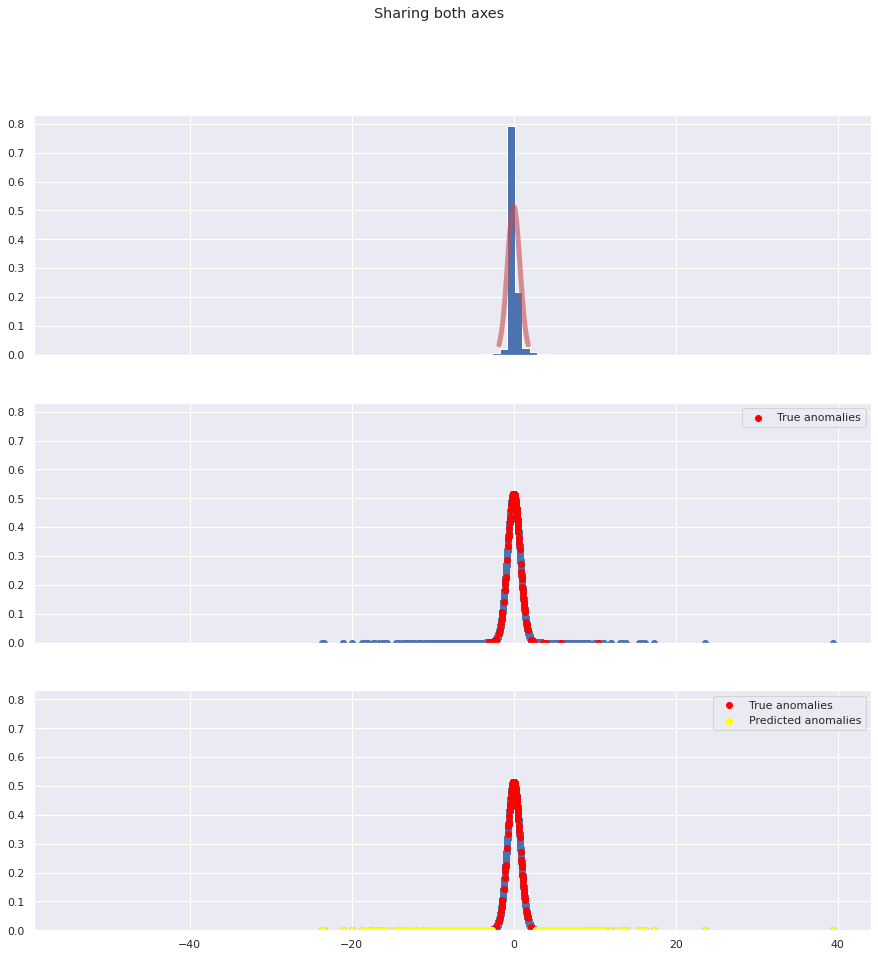

AUC: 0.718


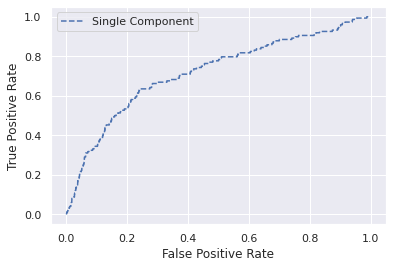

F1 score: 0.010
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
5     0.0      V11  0.001150  0.883444  0.496689
6     0.0      V11  0.001157  0.883444  0.496689
7     0.0      V11  0.001164  0.883444  0.496689
8     0.0      V11  0.001179  0.883444  0.496689
9     0.0      V11  0.001181  0.883444  0.496689
10    0.0      V11  0.001191  0.883444  0.496689
11    0.0      V11  0.001194  0.883444  0.496689
12    0.0      V11  0.001209  0.883444  0.496689
13    0.0      V11  0.001274  0.883444  0.500000
14    0.0      V11  0.001289  0.883444  0.500000
15    0.0      V11  0.001307  0.883444  0.500000
16    0.0      V11  0.001318  0.883444  0.500000
17    0.0      V11  0.001325  0.883444  0.500000
18    0.0      V11  0.001338  0.883444  0.498361
19  

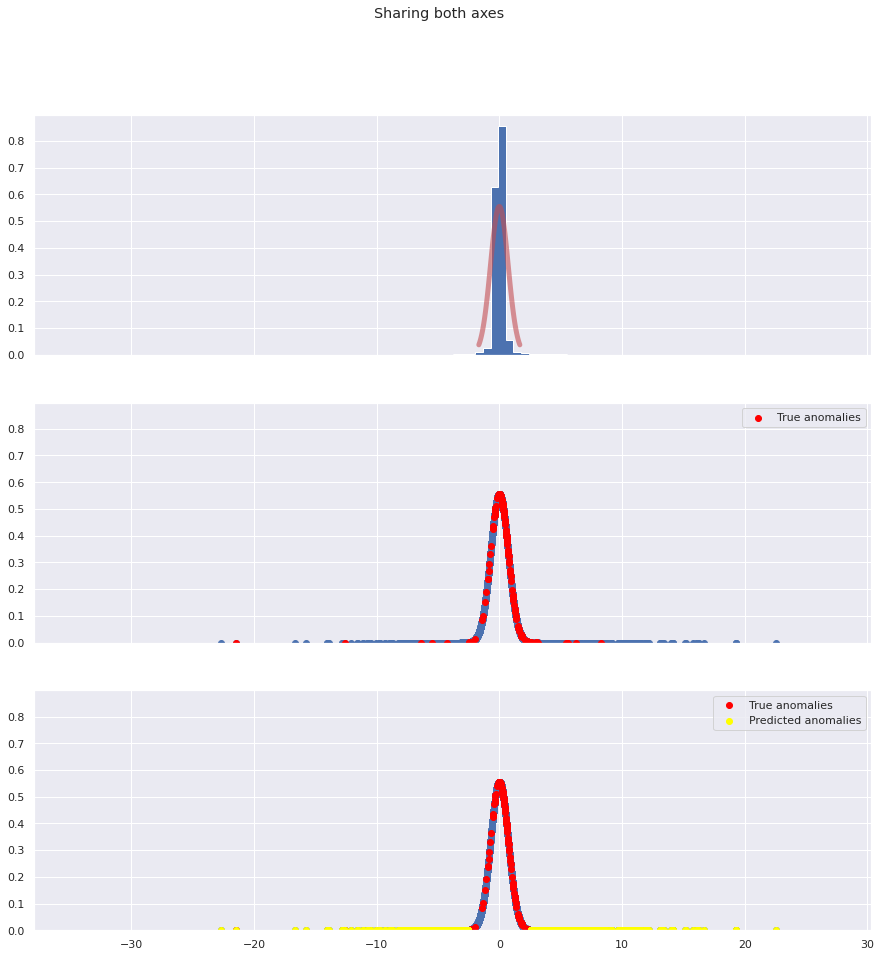

AUC: 0.802


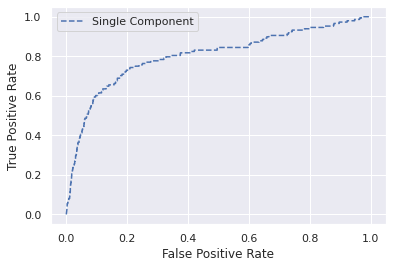

F1 score: 0.023
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V17  0.001060  0.929770  0.235160
0     NaN      V18  0.001060  0.764680  0.304598
0     NaN      V19  0.001060  0.742134  0.025899
0     NaN      V20  0.001060  0.718391  0.009764
0     NaN      V21  0.001060  0.802466  0.022544

[61 rows x 5 columns]
Epsilon: 0.0010595747656947326


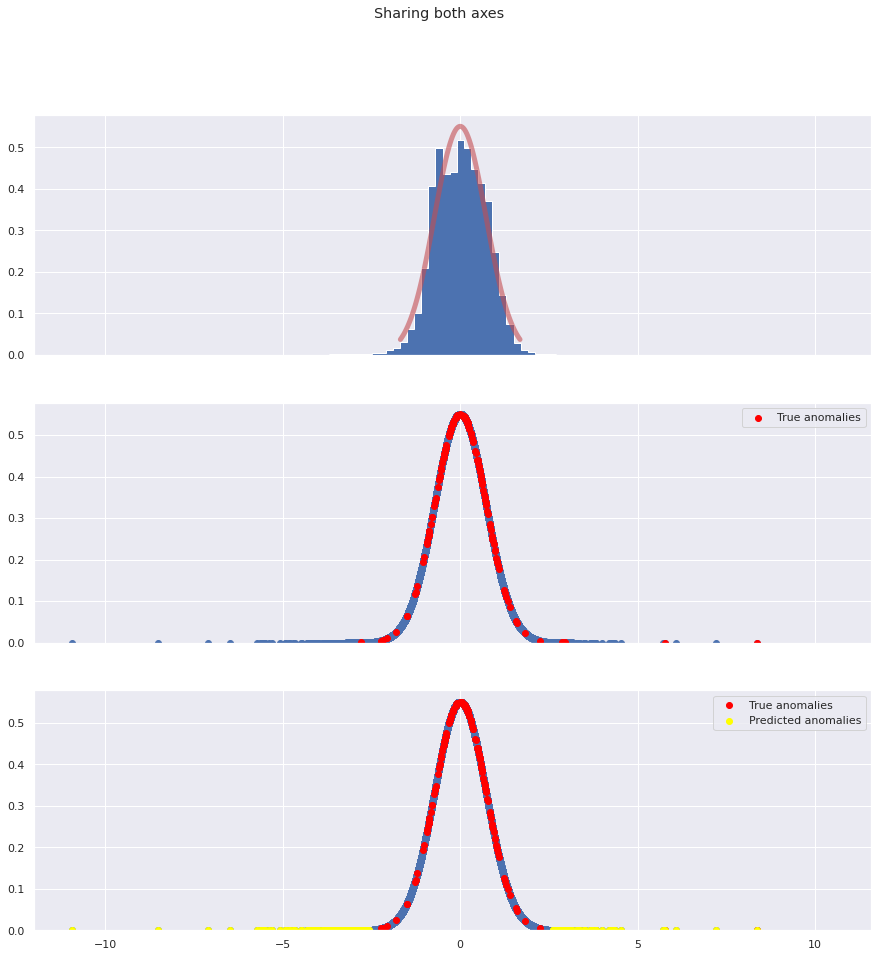

AUC: 0.550


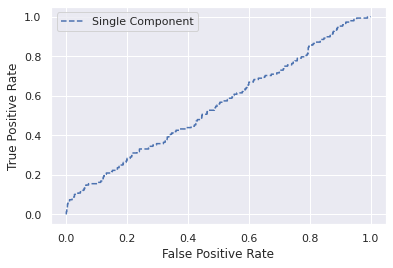

F1 score: 0.027
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V18  0.001060  0.764680  0.304598
0     NaN      V19  0.001060  0.742134  0.025899
0     NaN      V20  0.001060  0.718391  0.009764
0     NaN      V21  0.001060  0.802466  0.022544
0     NaN      V22  0.001060  0.549927  0.026738

[62 rows x 5 columns]
Epsilon: 0.0010595747656947326


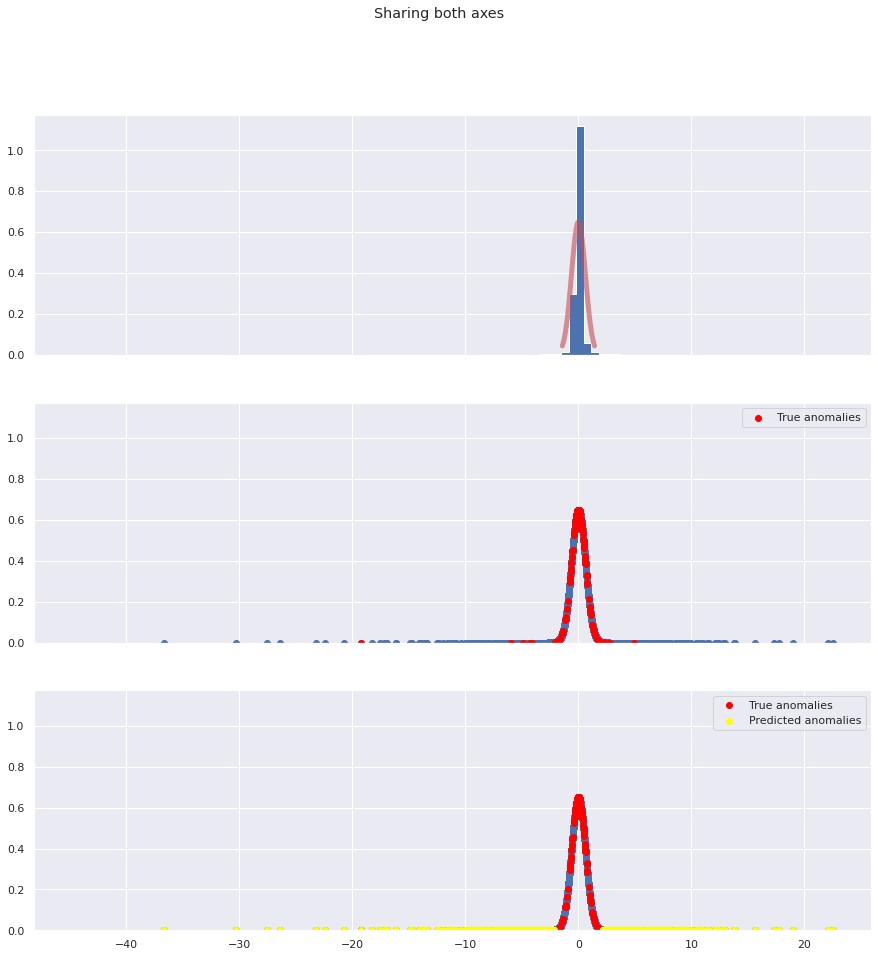

AUC: 0.682


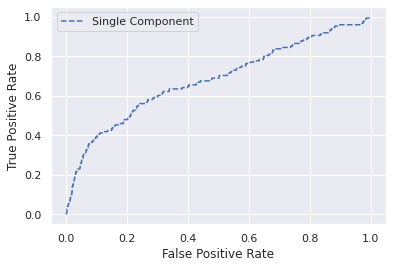

F1 score: 0.018
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V19  0.001060  0.742134  0.025899
0     NaN      V20  0.001060  0.718391  0.009764
0     NaN      V21  0.001060  0.802466  0.022544
0     NaN      V22  0.001060  0.549927  0.026738
0     NaN      V23  0.001060  0.681684  0.018256

[63 rows x 5 columns]
Epsilon: 0.0010595747656947326


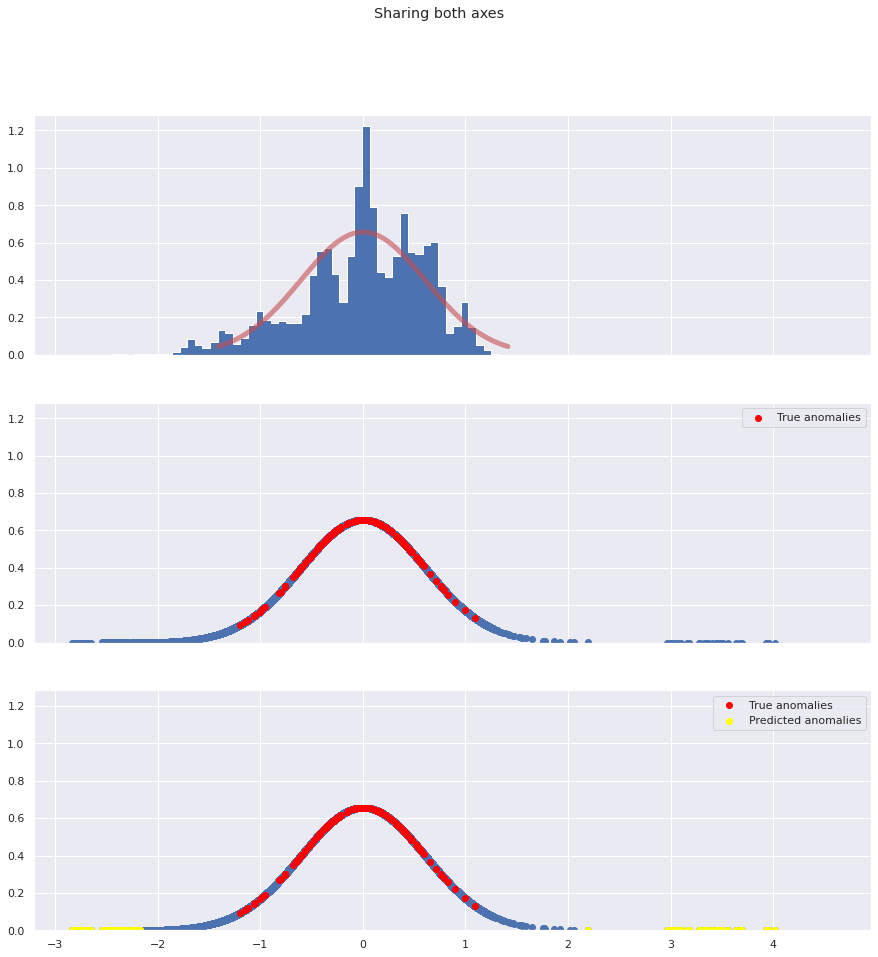

AUC: 0.482


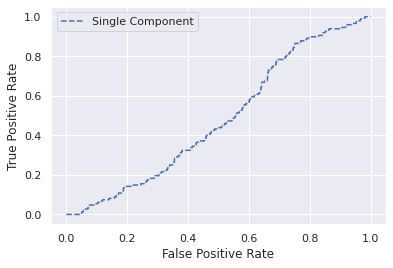

F1 score: 0.000
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V20  0.001060  0.718391  0.009764
0     NaN      V21  0.001060  0.802466  0.022544
0     NaN      V22  0.001060  0.549927  0.026738
0     NaN      V23  0.001060  0.681684  0.018256
0     NaN      V24  0.001060  0.482115  0.000000

[64 rows x 5 columns]
Epsilon: 0.0010595747656947326


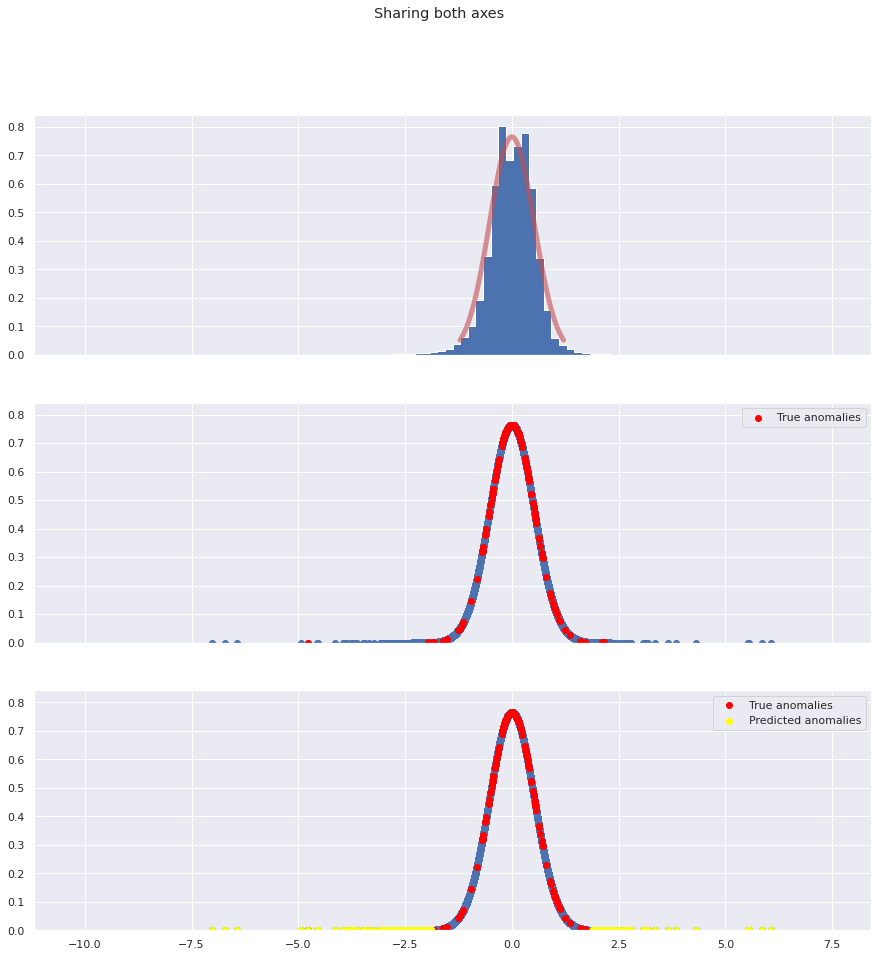

AUC: 0.562


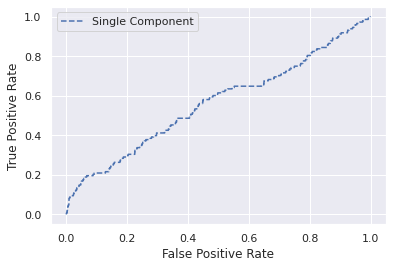

F1 score: 0.014
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V21  0.001060  0.802466  0.022544
0     NaN      V22  0.001060  0.549927  0.026738
0     NaN      V23  0.001060  0.681684  0.018256
0     NaN      V24  0.001060  0.482115  0.000000
0     NaN      V25  0.001060  0.562260  0.014184

[65 rows x 5 columns]
Epsilon: 0.0010595747656947326


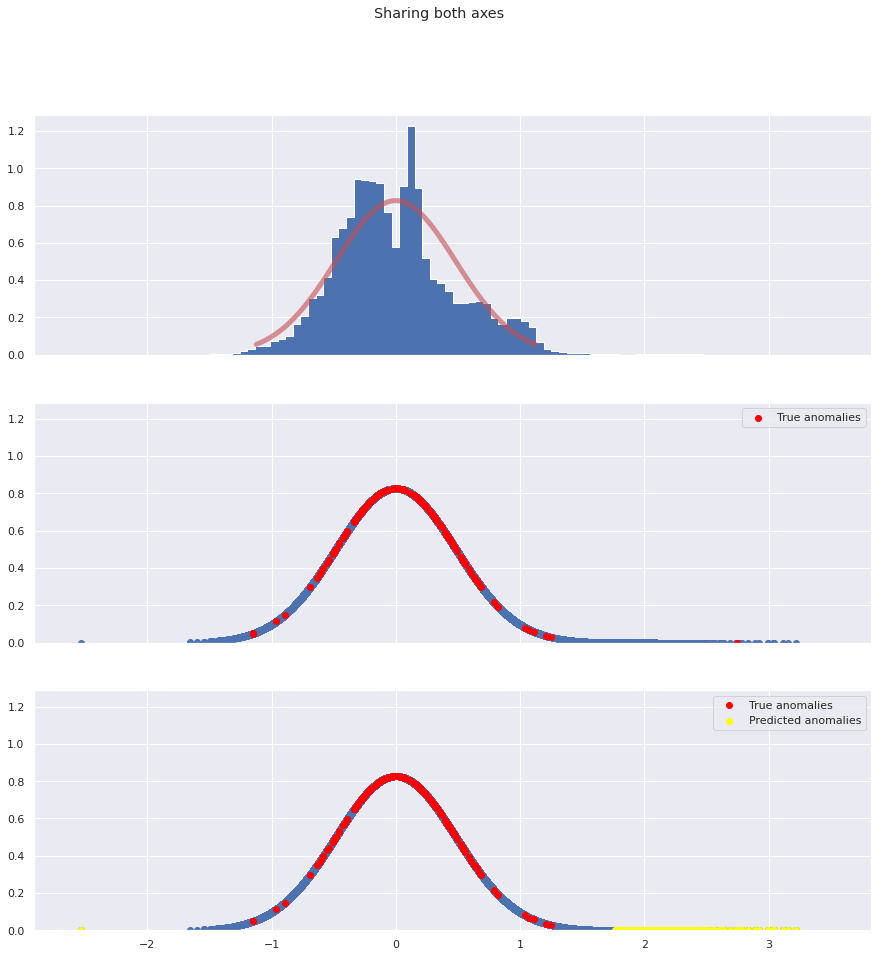

AUC: 0.505


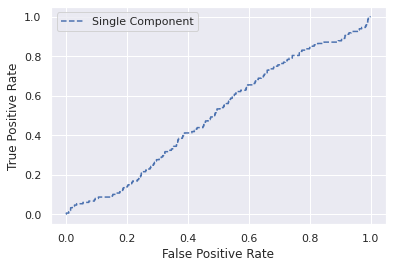

F1 score: 0.006
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V22  0.001060  0.549927  0.026738
0     NaN      V23  0.001060  0.681684  0.018256
0     NaN      V24  0.001060  0.482115  0.000000
0     NaN      V25  0.001060  0.562260  0.014184
0     NaN      V26  0.001060  0.505426  0.006154

[66 rows x 5 columns]
Epsilon: 0.0010595747656947326


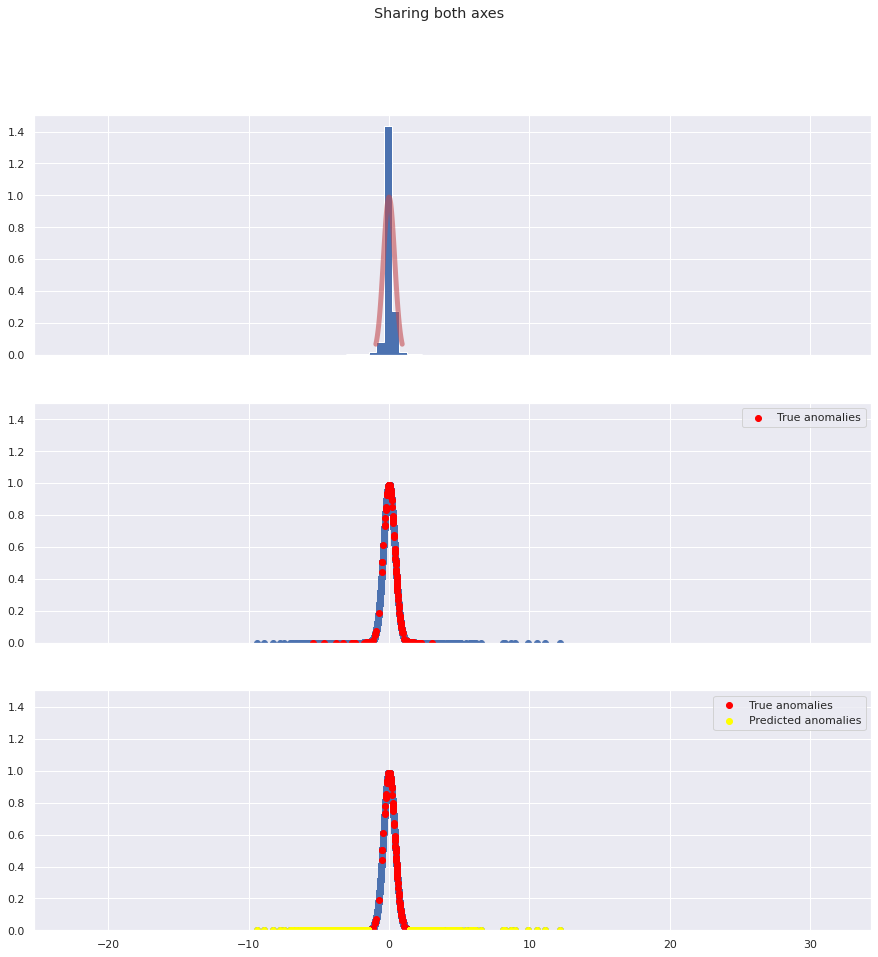

AUC: 0.815


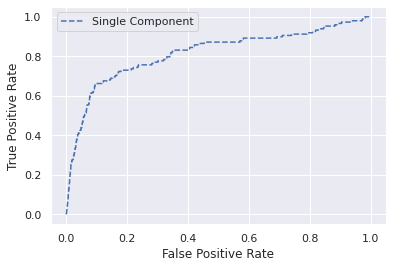

F1 score: 0.045
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V23  0.001060  0.681684  0.018256
0     NaN      V24  0.001060  0.482115  0.000000
0     NaN      V25  0.001060  0.562260  0.014184
0     NaN      V26  0.001060  0.505426  0.006154
0     NaN      V27  0.001060  0.814707  0.045198

[67 rows x 5 columns]
Epsilon: 0.0010595747656947326


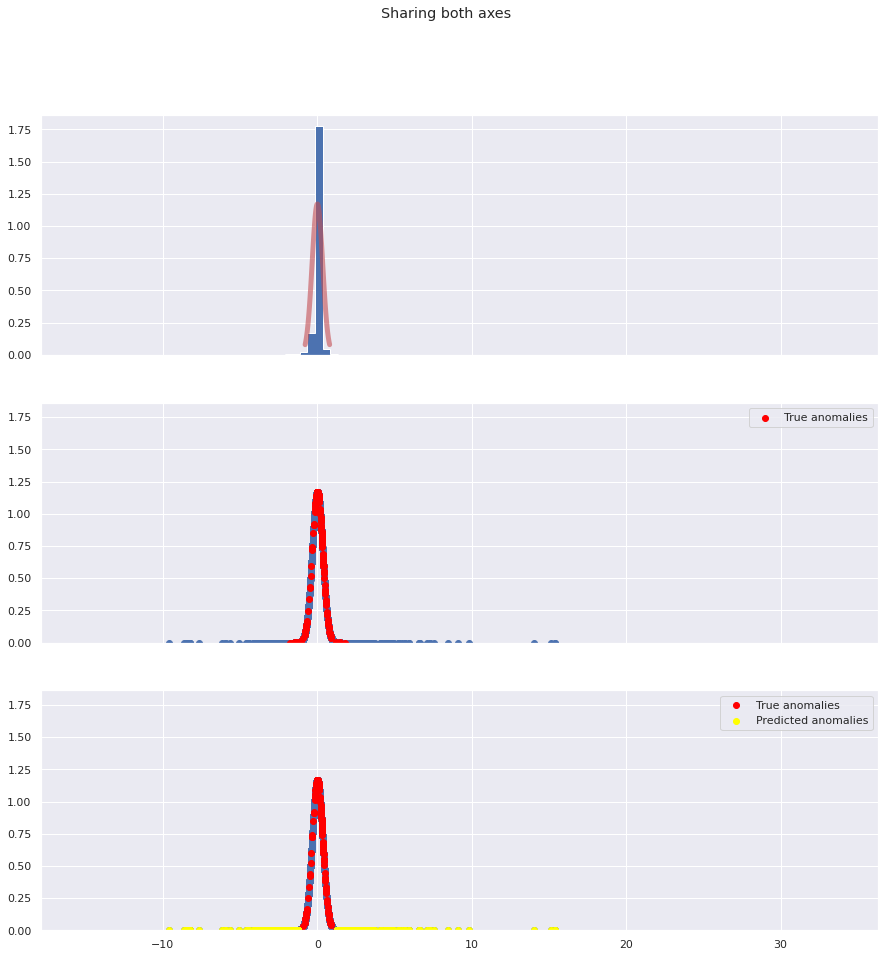

AUC: 0.801


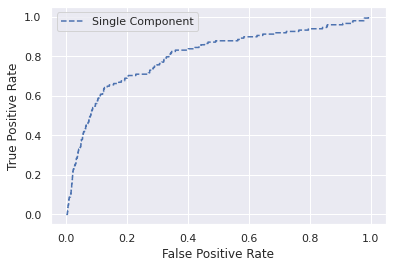

F1 score: 0.017
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     0.0      V11  0.001085  0.883444  0.501672
2     0.0      V11  0.001086  0.883444  0.501672
3     0.0      V11  0.001109  0.883444  0.500000
4     0.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
0     NaN      V24  0.001060  0.482115  0.000000
0     NaN      V25  0.001060  0.562260  0.014184
0     NaN      V26  0.001060  0.505426  0.006154
0     NaN      V27  0.001060  0.814707  0.045198
0     NaN      V28  0.001060  0.801460  0.017178

[68 rows x 5 columns]


In [31]:
for i in possible_vars: 
  var_name = i
  epsilon = optimal_epsilon
  print("Epsilon: {}".format(epsilon))

  arr = np.array(non_fraud_X_train[var_name])
  std_dev = np.std(arr)
  mean = np.mean(arr)


  norm = stats.norm(

      loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )



  fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
  fig.suptitle('Sharing both axes')



  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  axs[0].plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


  x = np.array(X_test[var_name])
  mu = mean
  sigma = std_dev
  probs = p_x(x, mu, sigma)
  preds = np.where(probs < epsilon, 1, 0)

  summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


  axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[1].legend()



  axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
  axs[2].legend()



  plt.show()


  fpr, tpr, thresholds = roc_curve(summary_df['y_test'], 1-summary_df['p(x)'])
  auc = roc_auc_score(summary_df['y_test'], 1-summary_df['p(x)'])
  print('AUC: %.3f' % auc)

  fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


  from sklearn.metrics import f1_score

  f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
  print("F1 score: %.3f" % f1_score)

  new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

  results = results.append(new_results)
  results = results.drop_duplicates()
  print(results)

In [32]:
results = results[column_names]
results.reset_index(inplace=True)
results

index var_name   epsilon       AUC  F1_score
0       0      V11  0.001060  0.883444  0.505051
1       1      V11  0.001085  0.883444  0.501672
2       2      V11  0.001086  0.883444  0.501672
3       3      V11  0.001109  0.883444  0.500000
4       4      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
63      0      V24  0.001060  0.482115  0.000000
64      0      V25  0.001060  0.562260  0.014184
65      0      V26  0.001060  0.505426  0.006154
66      0      V27  0.001060  0.814707  0.045198
67      0      V28  0.001060  0.801460  0.017178

[68 rows x 5 columns]

In [33]:
results.sort_values(by=['AUC'], ascending = False)

index var_name  epsilon       AUC  F1_score
53      0      V14  0.00106  0.941236  0.233068
56      0      V17  0.00106  0.929770  0.235160
49      0      V10  0.00106  0.914367  0.149201
51      0      V12  0.00106  0.907266  0.258145
43      0       V4  0.00106  0.903462  0.221169
..    ...      ...      ...       ...       ...
64      0      V25  0.00106  0.562260  0.014184
61      0      V22  0.00106  0.549927  0.026738
54      0      V15  0.00106  0.538454  0.000000
65      0      V26  0.00106  0.505426  0.006154
63      0      V24  0.00106  0.482115  0.000000

[68 rows x 5 columns]

In [34]:
results.iloc[[results['AUC'].idxmax()]]

index var_name  epsilon       AUC  F1_score
53      0      V14  0.00106  0.941236  0.233068

### **Selecting best features to work with**

**Error analysis for anomaly detection**
* Want $p(x)$ large for normal examples $x$.
* Want $p(x)$ small for anomalous examples of $x$. 

Most common problem is that $p(x)$ is comparable (say, both large) for normal and anomalous examples. 

Epsilon: 0.0010595747656947326


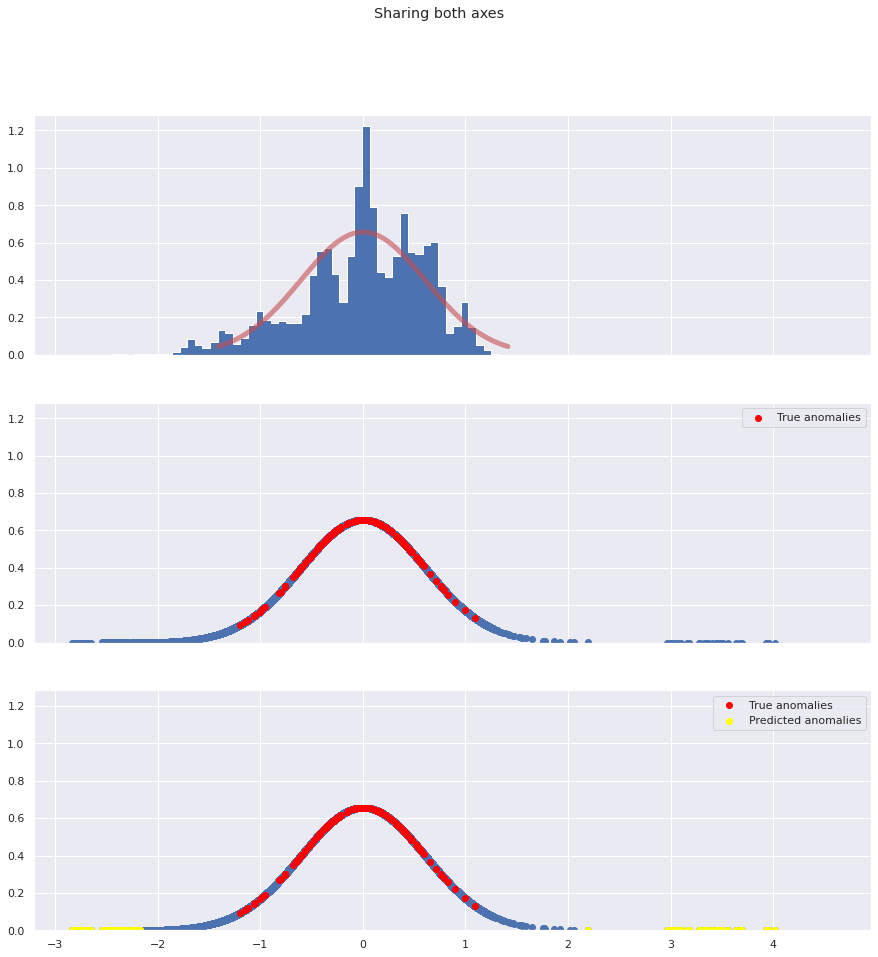

AUC: 0.518


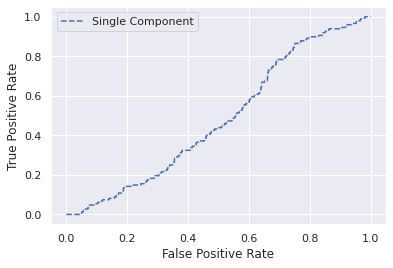

F1 score: 0.000
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     1.0      V11  0.001085  0.883444  0.501672
2     2.0      V11  0.001086  0.883444  0.501672
3     3.0      V11  0.001109  0.883444  0.500000
4     4.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
64    0.0      V25  0.001060  0.562260  0.014184
65    0.0      V26  0.001060  0.505426  0.006154
66    0.0      V27  0.001060  0.814707  0.045198
67    0.0      V28  0.001060  0.801460  0.017178
0     NaN      V24  0.001060  0.517885  0.000000

[68 rows x 5 columns]


In [35]:
var_name = 'V24'
epsilon = optimal_epsilon
print("Epsilon: {}".format(epsilon))

arr = np.array(non_fraud_X_train[var_name])
std_dev = np.std(arr)
mean = np.mean(arr)


norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)



fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
fig.suptitle('Sharing both axes')



x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
axs[0].plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


x = np.array(X_test[var_name])
mu = mean
sigma = std_dev
probs = p_x(x, mu, sigma)
preds = np.where(probs < epsilon, 1, 0)

summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[1].legend()



axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
axs[2].legend()



plt.show()


fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
print('AUC: %.3f' % auc)

fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


from sklearn.metrics import f1_score

f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
print("F1 score: %.3f" % f1_score)

new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

results = results.append(new_results)
results = results.drop_duplicates()
print(results)

In [36]:
summary_df

X_test      p(x)  y_test  y_pred
0      0.023440  0.656456     0.0     0.0
1      0.401147  0.528625     0.0     0.0
2     -0.495687  0.470290     0.0     0.0
3      0.009967  0.656837     0.0     0.0
4      0.258708  0.600273     0.0     0.0
...         ...       ...     ...     ...
93982  1.042400  0.150921     0.0     0.0
93983 -0.369755  0.545324     0.0     0.0
93984 -0.076959  0.651547     0.0     0.0
93985  0.614267  0.394402     0.0     0.0
93986  0.229273  0.612037     0.0     0.0

[93987 rows x 4 columns]

Epsilon: 0.0010595747656947326


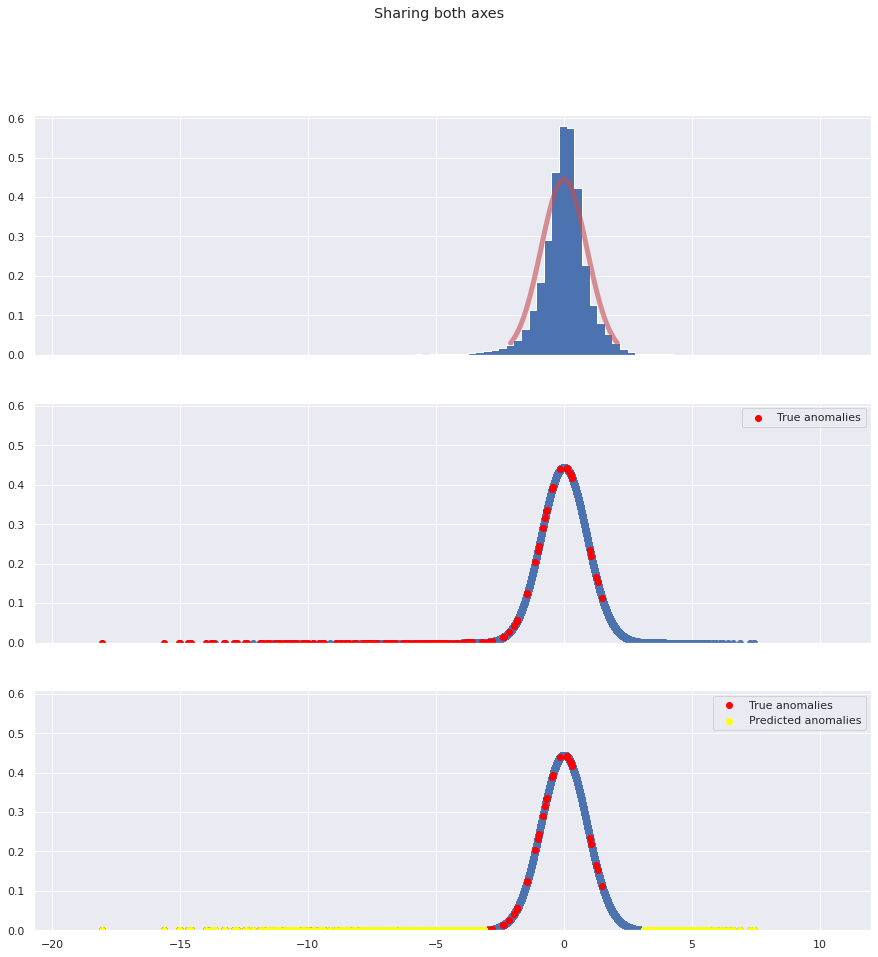

AUC: 0.059


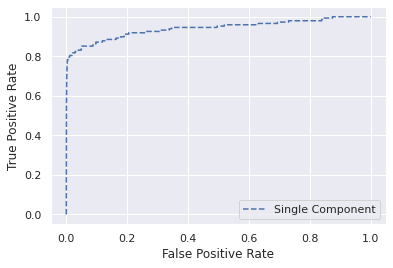

F1 score: 0.233
    index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     1.0      V11  0.001085  0.883444  0.501672
2     2.0      V11  0.001086  0.883444  0.501672
3     3.0      V11  0.001109  0.883444  0.500000
4     4.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
65    0.0      V26  0.001060  0.505426  0.006154
66    0.0      V27  0.001060  0.814707  0.045198
67    0.0      V28  0.001060  0.801460  0.017178
0     NaN      V24  0.001060  0.517885  0.000000
0     NaN      V14  0.001060  0.058754  0.233068

[69 rows x 5 columns]


In [37]:
var_name = 'V14'
epsilon = optimal_epsilon
print("Epsilon: {}".format(epsilon))

arr = np.array(non_fraud_X_train[var_name])
std_dev = np.std(arr)
mean = np.mean(arr)


norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)



fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
fig.suptitle('Sharing both axes')



x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
axs[0].plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


x = np.array(X_test[var_name])
mu = mean
sigma = std_dev
probs = p_x(x, mu, sigma)
preds = np.where(probs < epsilon, 1, 0)

summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[1].legend()



axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
axs[2].legend()



plt.show()


fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
print('AUC: %.3f' % auc)

fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


from sklearn.metrics import f1_score

f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
print("F1 score: %.3f" % f1_score)

new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

results = results.append(new_results)
results = results.drop_duplicates()
print(results)

In [38]:
results

index var_name   epsilon       AUC  F1_score
0     0.0      V11  0.001060  0.883444  0.505051
1     1.0      V11  0.001085  0.883444  0.501672
2     2.0      V11  0.001086  0.883444  0.501672
3     3.0      V11  0.001109  0.883444  0.500000
4     4.0      V11  0.001126  0.883444  0.496689
..    ...      ...       ...       ...       ...
65    0.0      V26  0.001060  0.505426  0.006154
66    0.0      V27  0.001060  0.814707  0.045198
67    0.0      V28  0.001060  0.801460  0.017178
0     NaN      V24  0.001060  0.517885  0.000000
0     NaN      V14  0.001060  0.058754  0.233068

[69 rows x 5 columns]

In [39]:
results['F1_score'].max()

0.5050505050505052

# **Two Gaussians**

In [53]:
column_names = ["var_name", "AUC_score"]

two_gaussians_summary_df = pd.DataFrame(columns = column_names)
two_gaussians_summary_df

Empty DataFrame
Columns: [var_name, AUC_score]
Index: []

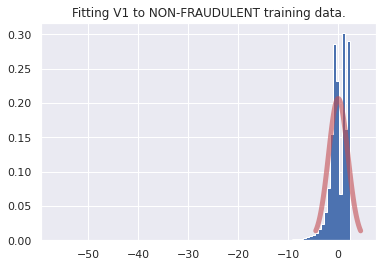

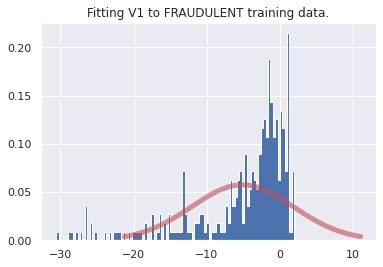

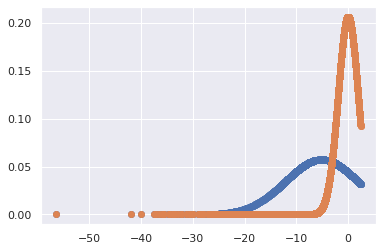

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V1        1.016658  0.038975     0.180242       0       0
215884       V1       -2.546080  0.053725     0.086157       0       0
98616        V1        1.336743  0.037381     0.163035       0       0
172195       V1       -1.033347  0.048415     0.178645       0       0
19496        V1       -0.440280  0.045880     0.201107       0       0
...         ...             ...       ...          ...     ...     ...
21440        V1       -2.986845  0.054887     0.062068       0       0
117583       V1        0.937083  0.039368     0.184008       0       0
73349        V1       -1.149963  0.048888     0.172607       0       0
267336       V1        1.754554  0.035285     0.137230       0       0
128037       V1       -0.707635  0.047049     0.192891       0       0

[190820 rows x 6 columns]
AUC score:0.699434086061993
  var_name  AUC_score


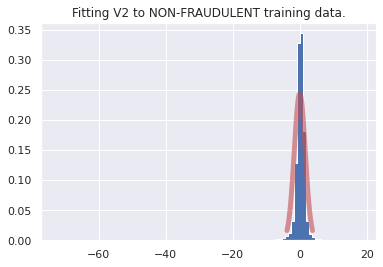

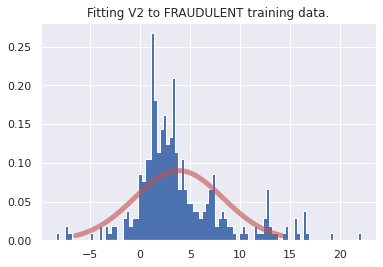

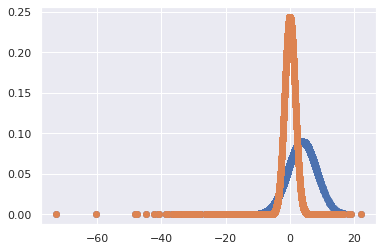

       var_name  X_train values   p_fraud   p_non_fraud  y_pred  y_true
index                                                                  
37372        V2        0.139269  0.063361  2.426889e-01       0       0
215884       V2        1.129681  0.074484  1.914919e-01       0       0
98616        V2       -0.623283  0.054077  2.269860e-01       0       0
172195       V2       -0.453670  0.056160  2.347508e-01       0       0
19496        V2       -1.339789  0.045359  1.749286e-01       0       0
...         ...             ...       ...           ...     ...     ...
21440        V2       -8.663978  0.001687  2.070375e-07       1       0
117583       V2       -0.849673  0.051299  2.134220e-01       0       0
73349        V2        1.696462  0.079896  1.418318e-01       0       0
267336       V2       -0.699398  0.053142  2.228068e-01       0       0
128037       V2        0.493302  0.067517  2.325504e-01       0       0

[190820 rows x 6 columns]
AUC score:0.7714050039631436
  var_na

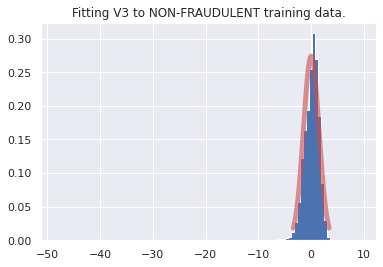

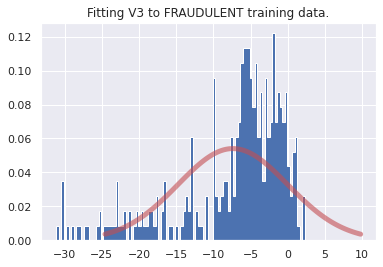

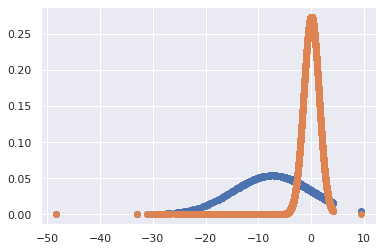

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V3        0.302209  0.031405     0.268452       0       0
215884       V3        0.401727  0.030964     0.264200       0       0
98616        V3        0.135579  0.032144     0.272860       0       0
172195       V3        0.633679  0.029940     0.249979       0       0
19496        V3        1.840669  0.024732     0.124495       0       0
...         ...             ...       ...          ...     ...     ...
21440        V3       -1.910863  0.041034     0.114657       0       0
117583       V3        0.524186  0.030423     0.257406       0       0
73349        V3        1.637114  0.025590     0.146930       0       0
267336       V3       -0.076332  0.033085     0.273355       0       0
128037       V3        2.648089  0.021442     0.053236       0       0

[190820 rows x 6 columns]
AUC score:0.8404071354652751
  var_name  AUC_score

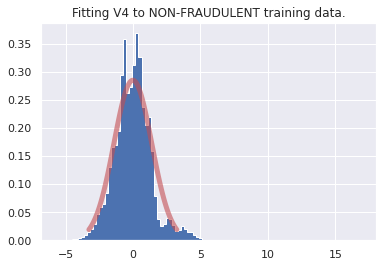

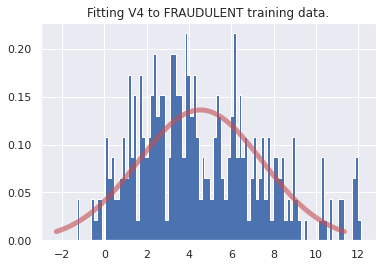

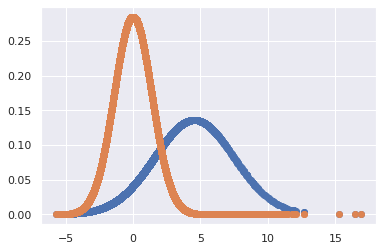

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V4        0.986137  0.065361     0.221309       0       0
215884       V4        1.185293  0.070815     0.197973       0       0
98616        V4       -0.942049  0.023678     0.228359       0       0
172195       V4       -0.205151  0.036738     0.282338       0       0
19496        V4       -2.069536  0.010696     0.096494       0       0
...         ...             ...       ...          ...     ...     ...
21440        V4        0.664058  0.056855     0.253888       0       0
117583       V4       -0.020031  0.040618     0.285095       0       0
73349        V4        2.658991  0.110982     0.046250       1       0
267336       V4        0.443915  0.051328     0.270502       0       0
128037       V4        1.064807  0.067501     0.212292       0       0

[190820 rows x 6 columns]
AUC score:0.8601254531487089
  var_name  AUC_score

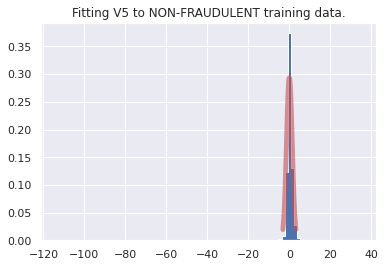

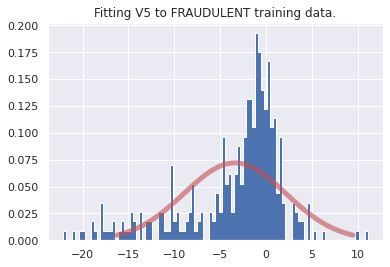

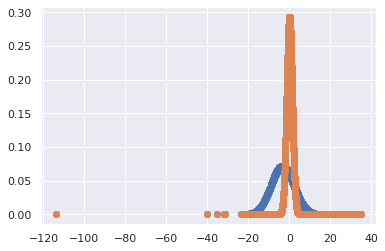

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V5        0.375761  0.057202     0.282953       0       0
215884       V5       -0.567482  0.063292     0.268146       0       0
98616        V5       -0.653556  0.063787     0.260516       0       0
172195       V5       -0.543829  0.063154     0.270092       0       0
19496        V5       -0.898234  0.065129     0.234797       0       0
...         ...             ...       ...          ...     ...     ...
21440        V5       -3.934875  0.071686     0.004366       1       0
117583       V5       -0.606327  0.063517     0.264807       0       0
73349        V5       -0.021502  0.059903     0.293331       0       0
267336       V5       -0.672082  0.063892     0.258767       0       0
128037       V5       -0.680271  0.063938     0.257982       0       0

[190820 rows x 6 columns]
AUC score:0.7156613333938915
  var_name  AUC_score

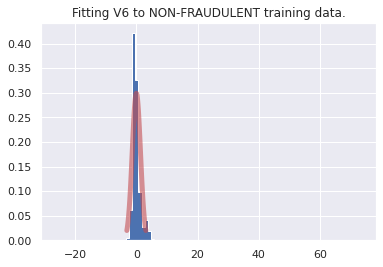

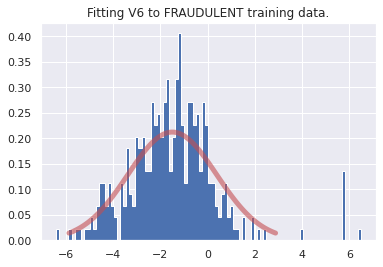

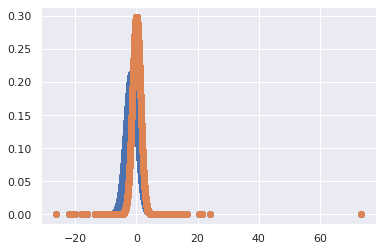

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V6        0.886556  0.094887     0.240053       0       0
215884       V6       -0.589366  0.188882     0.270846       0       0
98616        V6       -0.280165  0.172085     0.292215       0       0
172195       V6        0.786511  0.101377     0.251556       0       0
19496        V6       -0.397711  0.178857     0.285700       0       0
...         ...             ...       ...          ...     ...     ...
21440        V6        0.861269  0.096513     0.243039       0       0
117583       V6        0.692302  0.107615     0.261544       0       0
73349        V6        0.192287  0.141653     0.295866       0       0
267336       V6        0.389061  0.128212     0.286611       0       0
128037       V6        1.183838  0.076659     0.202074       0       0

[190820 rows x 6 columns]
AUC score:0.7550712914085007
  var_name  AUC_score

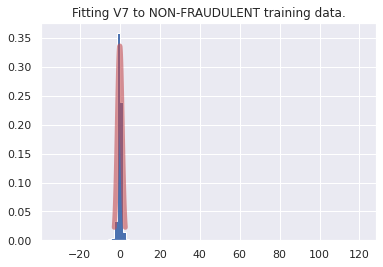

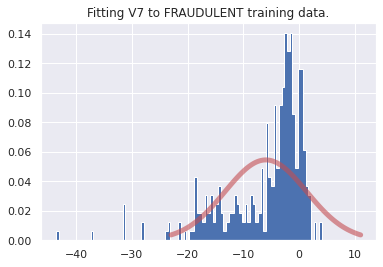

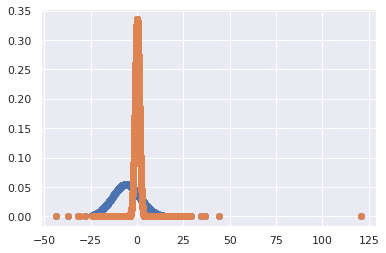

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V7       -0.095053  0.039512     0.334912       0       0
215884       V7       -0.537083  0.041401     0.301964       0       0
98616        V7       -0.541596  0.041420     0.301429       0       0
172195       V7        2.217916  0.029157     0.059823       0       0
19496        V7       -1.004230  0.043323     0.232744       0       0
...         ...             ...       ...          ...     ...     ...
21440        V7        1.647511  0.031720     0.130240       0       0
117583       V7       -0.463724  0.041092     0.310165       0       0
73349        V7        0.205204  0.038199     0.331960       0       0
267336       V7       -0.807534  0.042524     0.264667       0       0
128037       V7        0.169413  0.038356     0.333430       0       0

[190820 rows x 6 columns]
AUC score:0.7883744555256184
  var_name  AUC_score

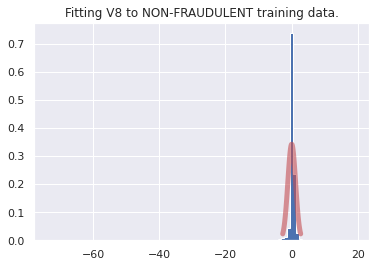

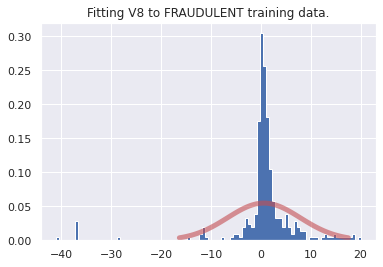

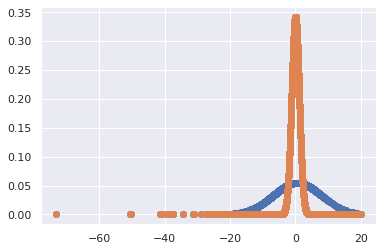

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V8        0.340130  0.054725     0.327673       0       0
215884       V8        1.353510  0.054461     0.173931       0       0
98616        V8       -0.027829  0.054559     0.342081       0       0
172195       V8       -0.109946  0.054503     0.340718       0       0
19496        V8        0.101991  0.054633     0.340779       0       0
...         ...             ...       ...          ...     ...     ...
21440        V8       -0.480963  0.054165     0.314566       0       0
117583       V8        0.148857  0.054656     0.339276       0       0
73349        V8        0.588754  0.054758     0.300834       0       0
267336       V8        0.202915  0.054679     0.336873       0       0
128037       V8        0.074553  0.054619     0.341406       0       0

[190820 rows x 6 columns]
AUC score:0.6563233627187115
  var_name  AUC_score

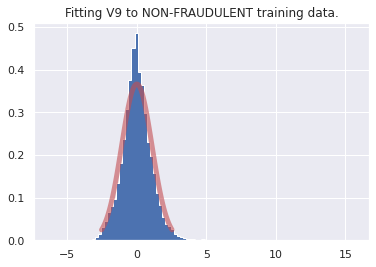

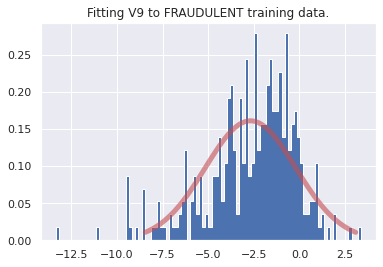

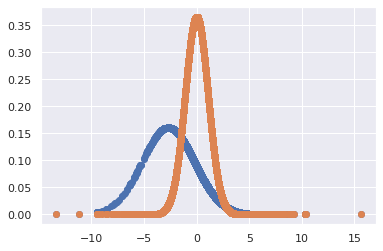

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372        V9       -0.065755  0.092144     0.365243       0       0
215884       V9       -0.525949  0.110193     0.325337       0       0
98616        V9       -1.034029  0.128984     0.232787       0       0
172195       V9        0.310629  0.077588     0.351674       0       0
19496        V9       -1.488139  0.143288     0.143609       0       0
...         ...             ...       ...          ...     ...     ...
21440        V9       -1.546866  0.144894     0.133214       1       0
117583       V9        0.785062  0.060451     0.282914       0       0
73349        V9       -1.187820  0.134164     0.201537       0       0
267336       V9        0.858635  0.057965     0.268926       0       0
128037       V9        1.247988  0.045740     0.190619       0       0

[190820 rows x 6 columns]
AUC score:0.7822347270021689
  var_name  AUC_score

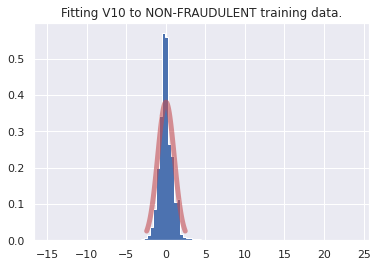

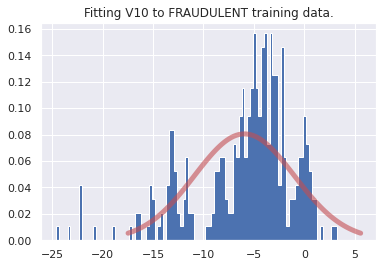

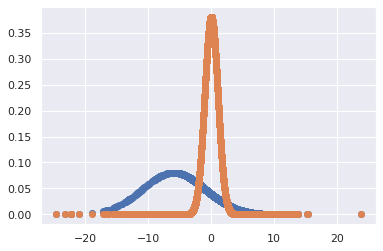

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V10       -0.182531  0.040981     0.374258       0       0
215884      V10       -0.748787  0.046495     0.292738       0       0
98616       V10        0.760954  0.032258     0.294645       0       0
172195      V10       -0.711619  0.046129     0.300172       0       0
19496       V10        0.663768  0.033119     0.313517       0       0
...         ...             ...       ...          ...     ...     ...
21440       V10        0.346951  0.035991     0.361594       0       0
117583      V10       -0.400162  0.043084     0.352507       0       0
73349       V10       -0.480985  0.043871     0.340989       0       0
267336      V10        0.102675  0.038267     0.379222       0       0
128037      V10       -0.367904  0.042771     0.356619       0       0

[190820 rows x 6 columns]
AUC score:0.9062933888515283
  var_name  AUC_score

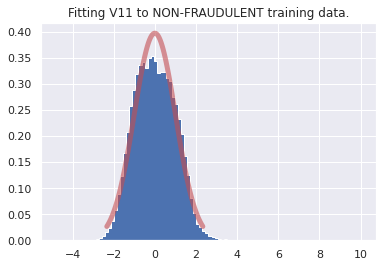

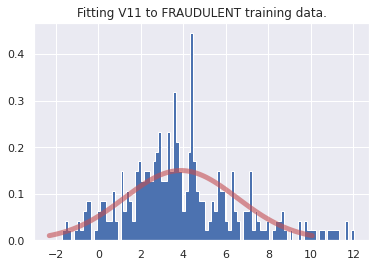

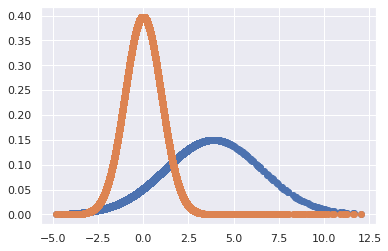

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V11        0.865235  0.078951     0.272580       0       0
215884      V11       -1.640814  0.017446     0.105574       0       0
98616       V11        0.795079  0.076602     0.288937       0       0
172195      V11       -0.177289  0.046923     0.391793       0       0
19496       V11       -1.451948  0.020162     0.140913       0       0
...         ...             ...       ...          ...     ...     ...
21440       V11        0.276998  0.059985     0.381951       0       0
117583      V11        0.113700  0.055101     0.394661       0       0
73349       V11       -0.395574  0.041269     0.368736       0       0
267336      V11        1.051043  0.085238     0.228143       0       0
128037      V11       -1.122580  0.025637     0.214205       0       0

[190820 rows x 6 columns]
AUC score:0.886340072386584
  var_name  AUC_score


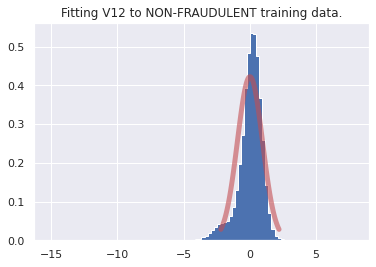

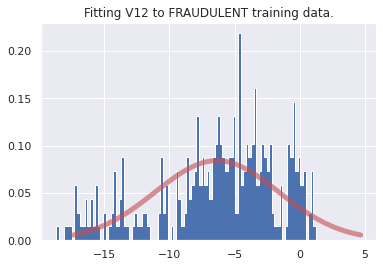

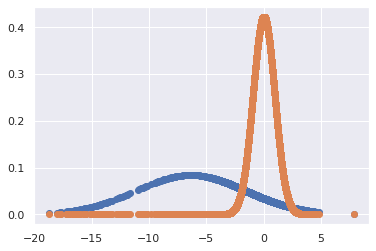

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V12        0.696081  0.027844     0.325311       0       0
215884      V12       -0.390295  0.038142     0.385500       0       0
98616       V12       -0.111996  0.035365     0.418679       0       0
172195      V12        0.214419  0.032221     0.412941       0       0
19496       V12       -0.556253  0.039836     0.352123       0       0
...         ...             ...       ...          ...     ...     ...
21440       V12       -0.167592  0.035913     0.414698       0       0
117583      V12        1.666005  0.020110     0.091407       0       0
73349       V12       -0.129168  0.035533     0.417600       0       0
267336      V12        1.643280  0.020274     0.095309       0       0
128037      V12        0.828646  0.026699     0.291051       0       0

[190820 rows x 6 columns]
AUC score:0.8906648863044212
  var_name  AUC_score

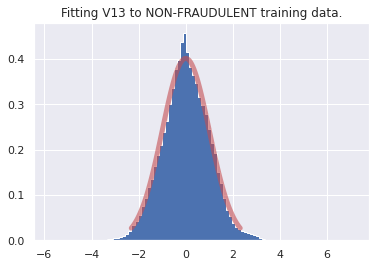

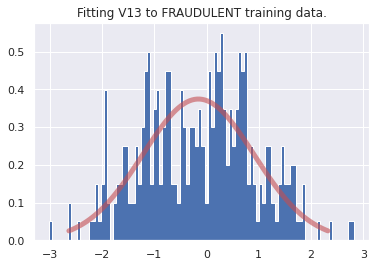

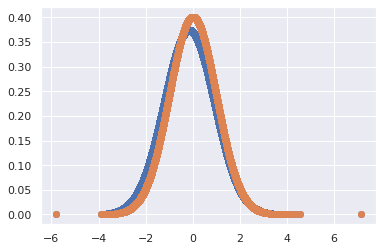

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V13       -0.084669  0.373749     0.400042       0       0
215884      V13       -1.515830  0.165590     0.125342       1       0
98616       V13        0.239959  0.349679     0.389998       0       0
172195      V13       -1.324015  0.205081     0.165171       1       0
19496       V13        1.307404  0.145936     0.169012       0       0
...         ...             ...       ...          ...     ...     ...
21440       V13        0.213818  0.352770     0.392345       0       0
117583      V13        1.587666  0.098224     0.112071       0       0
73349       V13       -0.294736  0.371354     0.384190       0       0
267336      V13        1.265712  0.153876     0.178446       0       0
128037      V13        0.326756  0.338145     0.380413       0       0

[190820 rows x 6 columns]
AUC score:0.537998897010525
  var_name  AUC_score


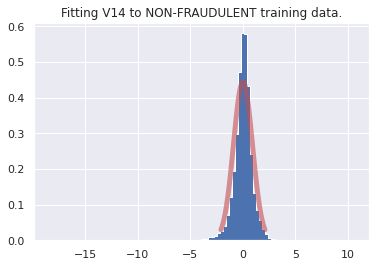

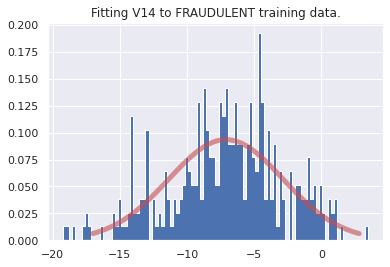

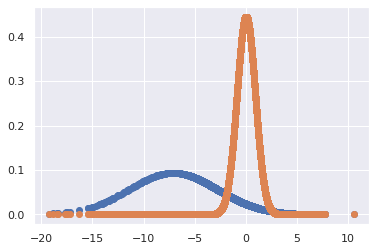

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V14        0.521748  0.018879     0.377885       0       0
215884      V14        1.332434  0.013194     0.150024       0       0
98616       V14        0.041546  0.022947     0.444396       0       0
172195      V14       -0.221308  0.025398     0.430149       0       0
19496       V14       -1.292904  0.036926     0.154932       0       0
...         ...             ...       ...          ...     ...     ...
21440       V14       -0.139022  0.024614     0.438589       0       0
117583      V14       -0.683250  0.030076     0.329931       0       0
73349       V14       -1.026354  0.033843     0.228215       0       0
267336      V14       -0.306132  0.026221     0.417923       0       0
128037      V14       -1.532442  0.039803     0.101456       0       0

[190820 rows x 6 columns]
AUC score:0.9228577353577354
  var_name  AUC_score

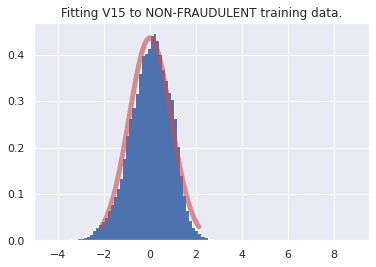

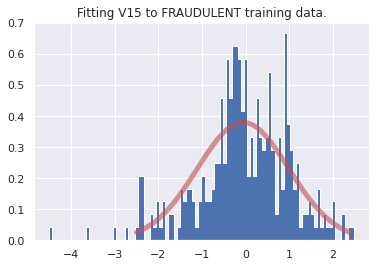

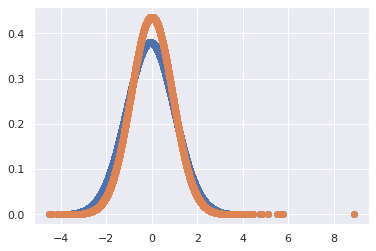

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V15        1.981066  0.057304     0.041744       1       0
215884      V15        0.559218  0.319152     0.362217       0       0
98616       V15        0.140385  0.373077     0.431471       0       0
172195      V15       -2.510475  0.024986     0.010006       1       0
19496       V15       -0.985107  0.257956     0.243916       1       0
...         ...             ...       ...          ...     ...     ...
21440       V15       -1.375023  0.173625     0.140541       1       0
117583      V15       -1.059042  0.241851     0.222799       1       0
73349       V15       -0.348257  0.366046     0.405800       0       0
267336      V15       -0.004562  0.379457     0.436517       0       0
128037      V15       -1.677255  0.116178     0.080877       1       0

[190820 rows x 6 columns]
AUC score:0.5008747973864254
  var_name  AUC_score

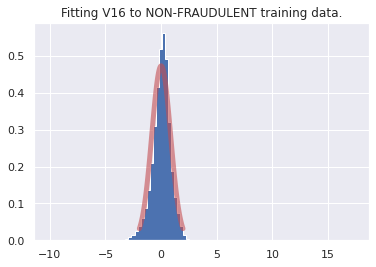

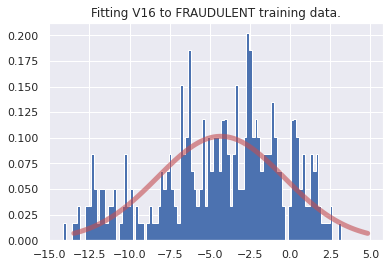

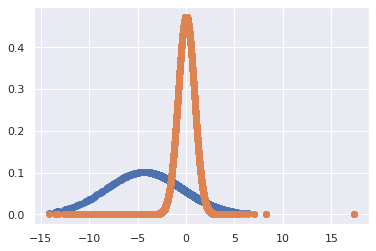

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V16       -1.313444  0.075689     0.138546       0       0
215884      V16       -0.015673  0.055678     0.472964       0       0
98616       V16        1.641911  0.032105     0.072377       0       0
172195      V16       -0.582477  0.064527     0.370244       0       0
19496       V16       -0.184252  0.058301     0.461005       0       0
...         ...             ...       ...          ...     ...     ...
21440       V16       -0.426207  0.062084     0.414383       0       0
117583      V16        0.368635  0.049787     0.431801       0       0
73349       V16       -0.199641  0.058541     0.459014       0       0
267336      V16        0.739688  0.044289     0.324707       0       0
128037      V16       -1.130639  0.072964     0.190091       0       0

[190820 rows x 6 columns]
AUC score:0.8514616014616014
  var_name  AUC_score

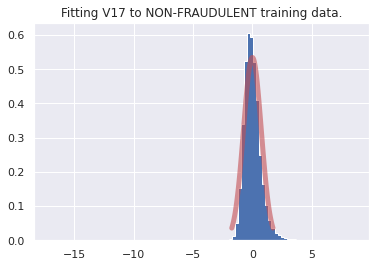

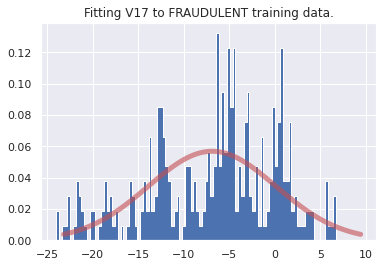

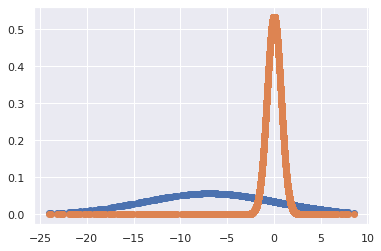

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V17        0.894049  0.030676     0.264506       0       0
215884      V17        0.590390  0.032158     0.394459       0       0
98616       V17       -0.311148  0.036587     0.487521       0       0
172195      V17       -0.161588  0.035853     0.520654       0       0
19496       V17        0.205590  0.034047     0.516101       0       0
...         ...             ...       ...          ...     ...     ...
21440       V17        0.771636  0.031272     0.316992       0       0
117583      V17       -0.608646  0.038040     0.379643       0       0
73349       V17        1.589715  0.027339     0.056749       0       0
267336      V17       -0.931197  0.039600     0.241930       0       0
128037      V17        0.491312  0.032644     0.433598       0       0

[190820 rows x 6 columns]
AUC score:0.8949313702220678
  var_name  AUC_score

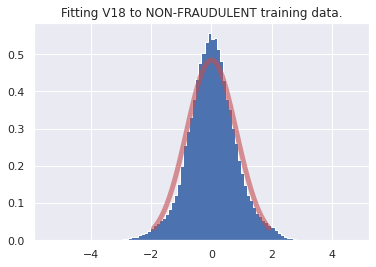

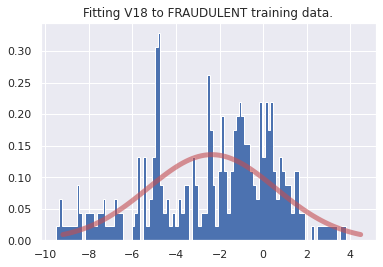

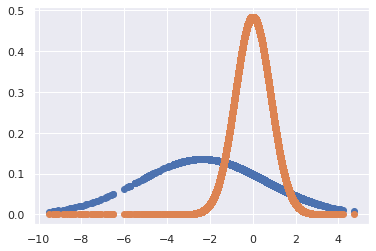

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V18       -2.206478  0.135533     0.013239       1       0
215884      V18       -0.141065  0.102128     0.477046       0       0
98616       V18       -0.882922  0.119664     0.271521       0       0
172195      V18       -0.199618  0.103653     0.469951       0       0
19496       V18        0.218414  0.092438     0.468168       0       0
...         ...             ...       ...          ...     ...     ...
21440       V18        0.967956  0.071563     0.243917       0       0
117583      V18        0.089697  0.095962     0.481762       0       0
73349       V18       -0.284752  0.105836     0.455694       0       0
267336      V18        0.364436  0.088391     0.440001       0       0
128037      V18       -0.847915  0.118943     0.283972       0       0

[190820 rows x 6 columns]
AUC score:0.7578014772782214
  var_name  AUC_score

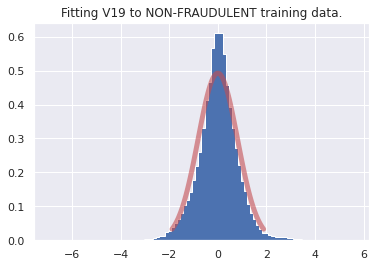

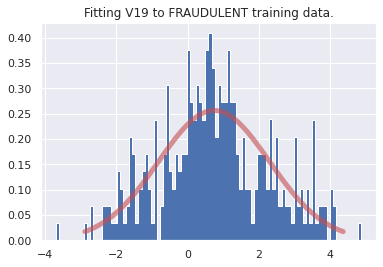

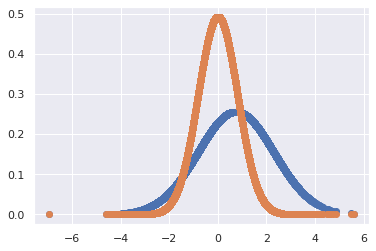

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V19       -2.047926  0.051508     0.020198       1       0
215884      V19        0.922782  0.254541     0.257209       0       0
98616       V19        1.234933  0.243687     0.153924       1       0
172195      V19        0.793824  0.256140     0.304497       0       0
19496       V19       -0.554273  0.181330     0.389867       0       0
...         ...             ...       ...          ...     ...     ...
21440       V19       -0.170608  0.215935     0.481736       0       0
117583      V19        1.132807  0.248282     0.185078       1       0
73349       V19       -0.374565  0.198282     0.442677       0       0
267336      V19       -0.199706  0.213547     0.477808       0       0
128037      V19        0.078463  0.234122     0.490135       0       0

[190820 rows x 6 columns]
AUC score:0.688818972249205
  var_name  AUC_score


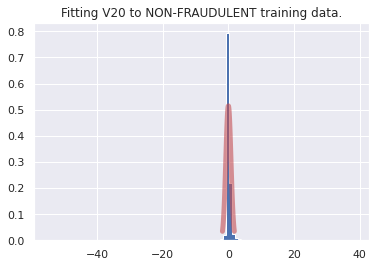

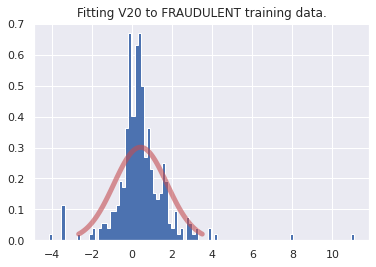

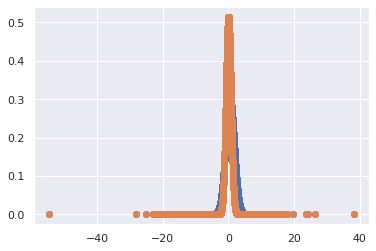

       var_name  X_train values   p_fraud   p_non_fraud  y_pred  y_true
index                                                                  
37372       V20       -0.269183  0.262813  4.847370e-01       0       0
215884      V20       -0.212339  0.268507  4.958377e-01       0       0
98616       V20        0.198038  0.296793  4.978164e-01       0       0
172195      V20        0.841673  0.286282  2.849203e-01       1       0
19496       V20       -0.079274  0.280300  5.119528e-01       0       0
...         ...             ...       ...           ...     ...     ...
21440       V20        4.315113  0.004018  9.574835e-08       1       0
117583      V20        0.396079  0.300986  4.512100e-01       0       0
73349       V20       -0.127011  0.276331  5.078299e-01       0       0
267336      V20        0.088014  0.291661  5.111433e-01       0       0
128037      V20       -0.143786  0.274865  5.059333e-01       0       0

[190820 rows x 6 columns]
AUC score:0.6285175645640763
  var_na

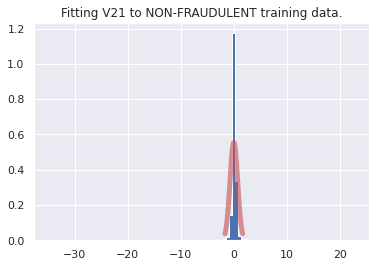

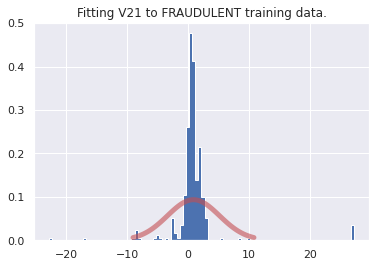

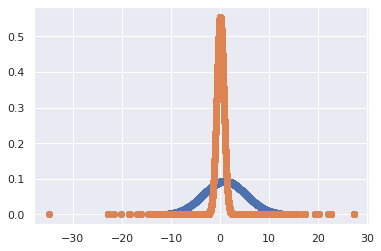

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V21        0.174774  0.092131     0.538583       0       0
215884      V21       -0.337334  0.089652     0.497705       0       0
98616       V21       -0.112456  0.090893     0.548500       0       0
172195      V21       -0.153555  0.090684     0.542798       0       0
19496       V21       -0.086545  0.091021     0.551198       0       0
...         ...             ...       ...          ...     ...     ...
21440       V21        1.252092  0.093098     0.121227       0       0
117583      V21       -0.143322  0.090737     0.544379       0       0
73349       V21        0.025147  0.091536     0.554670       0       0
267336      V21        0.141950  0.092010     0.544087       0       0
128037      V21       -0.102350  0.090943     0.549636       0       0

[190820 rows x 6 columns]
AUC score:0.6498520597357808
  var_name  AUC_score

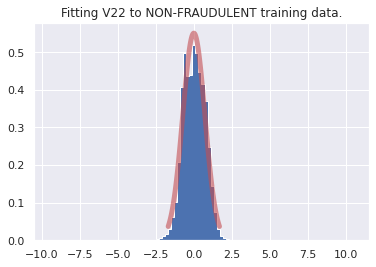

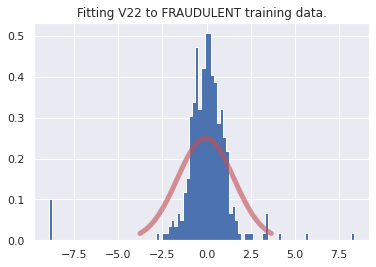

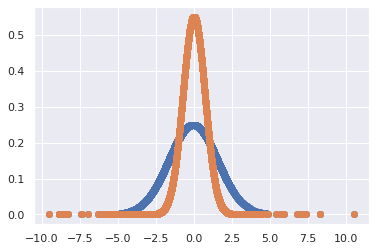

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V22        0.681627  0.225101     0.353602       0       0
215884      V22       -1.528312  0.162751     0.059520       1       0
98616       V22       -0.589816  0.236114     0.395476       0       0
172195      V22       -0.588776  0.236166     0.395938       0       0
19496       V22        0.059621  0.249449     0.548871       0       0
...         ...             ...       ...          ...     ...     ...
21440       V22       -0.993085  0.209939     0.215297       0       0
117583      V22       -0.479981  0.241108     0.442306       0       0
73349       V22        0.086506  0.249125     0.546812       0       0
267336      V22        0.358412  0.241987     0.487202       0       0
128037      V22        0.323975  0.243270     0.498244       0       0

[190820 rows x 6 columns]
AUC score:0.5426523246290688
  var_name  AUC_score

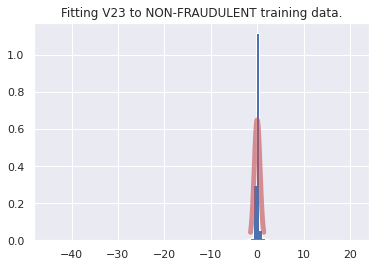

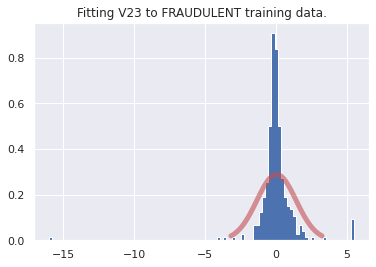

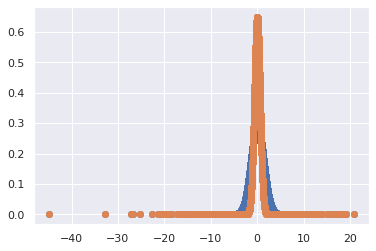

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V23        0.060051  0.288969     0.646580       0       0
215884      V23       -0.155582  0.286477     0.629055       0       0
98616       V23       -0.003113  0.288966     0.649639       0       0
172195      V23        0.675765  0.258966     0.354770       0       0
19496       V23        0.184900  0.287199     0.620946       0       0
...         ...             ...       ...          ...     ...     ...
21440       V23       -2.173147  0.080968     0.001238       1       0
117583      V23       -0.237902  0.283699     0.602573       0       0
73349       V23       -0.262748  0.282669     0.592705       0       0
267336      V23        0.259748  0.285023     0.594175       0       0
128037      V23       -0.172601  0.285984     0.624406       0       0

[190820 rows x 6 columns]
AUC score:0.5880963700731142
  var_name  AUC_score

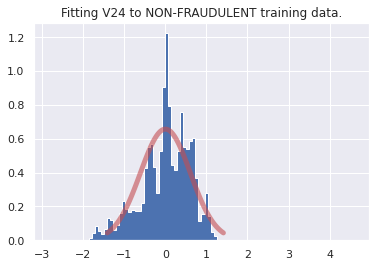

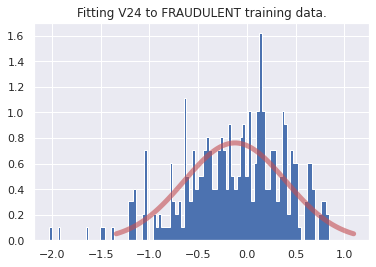

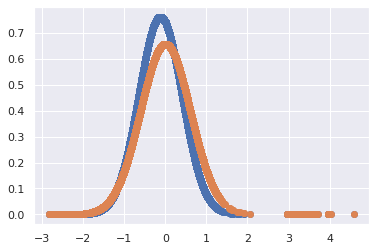

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V24       -0.622008  0.483904     0.388254       1       0
215884      V24       -0.199122  0.753900     0.622258       1       0
98616       V24       -0.526733  0.566059     0.450450       1       0
172195      V24       -0.448676  0.627973     0.499516       1       0
19496       V24       -0.129365  0.761833     0.641991       1       0
...         ...             ...       ...          ...     ...     ...
21440       V24        0.145570  0.667917     0.638514       1       0
117583      V24       -0.715247  0.401968     0.327805       1       0
73349       V24        0.321538  0.531268     0.571406       0       0
267336      V24        0.746839  0.191656     0.308905       0       0
128037      V24        0.126965  0.679777     0.642891       1       0

[190820 rows x 6 columns]
AUC score:0.5570888317981342
  var_name  AUC_score

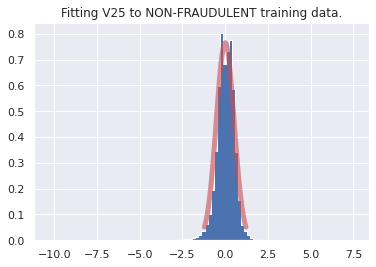

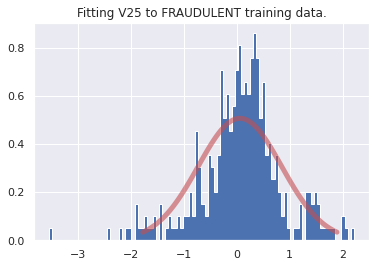

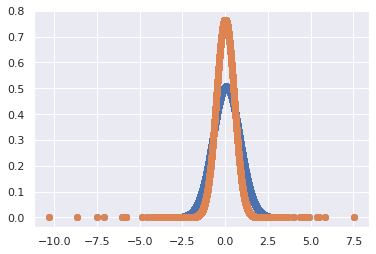

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V25        0.327565  0.478593     0.627600       0       0
215884      V25        0.245588  0.493054     0.684370       0       0
98616       V25        0.286137  0.486506     0.657704       0       0
172195      V25        0.039364  0.506520     0.762838       0       0
19496       V25       -0.331937  0.447244     0.625246       0       0
...         ...             ...       ...          ...     ...     ...
21440       V25       -0.235062  0.472020     0.691544       0       0
117583      V25        0.251418  0.492188     0.680724       0       0
73349       V25        0.341667  0.475628     0.616781       0       0
267336      V25       -0.560808  0.370770     0.429636       0       0
128037      V25       -0.001998  0.505076     0.765083       0       0

[190820 rows x 6 columns]
AUC score:0.5764119339700734
  var_name  AUC_score

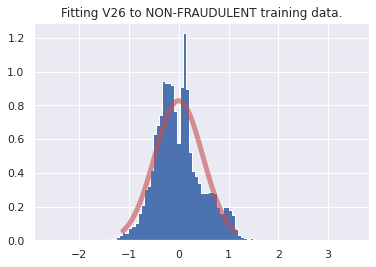

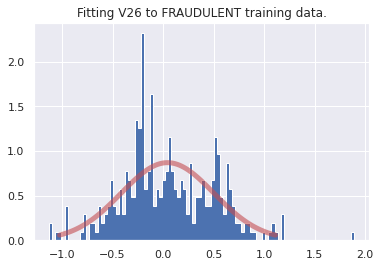

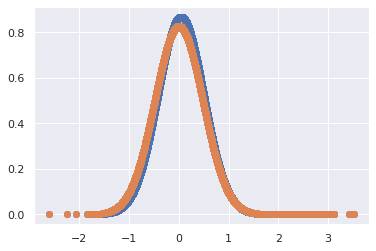

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V26       -0.221191  0.735777     0.745192       0       0
215884      V26       -0.859024  0.125814     0.169814       0       0
98616       V26       -0.487532  0.445022     0.497093       0       0
172195      V26        0.081194  0.865992     0.815338       1       0
19496       V26       -0.394832  0.550761     0.592466       0       0
...         ...             ...       ...          ...     ...     ...
21440       V26       -0.227411  0.729983     0.740751       0       0
117583      V26        0.975406  0.110811     0.106636       1       0
73349       V26        0.210343  0.813449     0.751610       1       0
267336      V26        0.104636  0.861256     0.807673       1       0
128037      V26       -0.398741  0.546282     0.588536       0       0

[190820 rows x 6 columns]
AUC score:0.513396700896701
  var_name  AUC_score


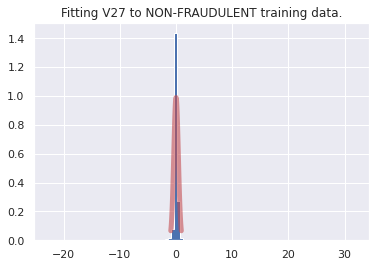

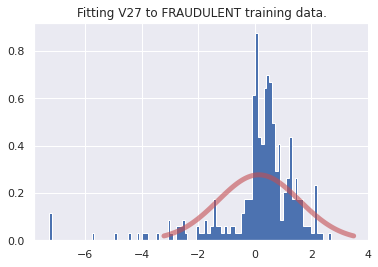

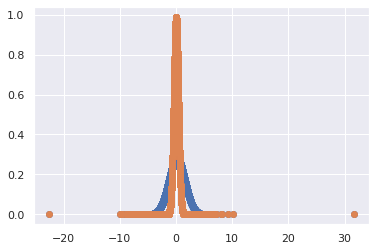

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V27        0.084139  0.276365     0.967697       0       0
215884      V27       -0.278776  0.264790     0.779939       0       0
98616       V27       -0.007267  0.275039     0.989207       0       0
172195      V27        0.038786  0.275845     0.984614       0       0
19496       V27        0.101876  0.276494     0.957859       0       0
...         ...             ...       ...          ...     ...     ...
21440       V27       -0.382702  0.258532     0.631601       0       0
117583      V27       -0.060168  0.273772     0.978630       0       0
73349       V27       -0.162047  0.270320     0.913206       0       0
267336      V27       -0.005853  0.275068     0.989258       0       0
128037      V27       -0.385589  0.258342     0.627316       0       0

[190820 rows x 6 columns]
AUC score:0.710830992807737
  var_name  AUC_score


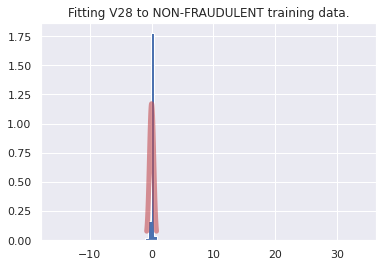

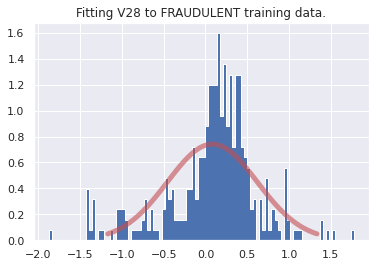

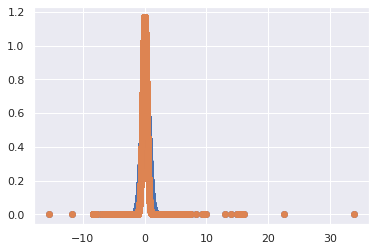

       var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
index                                                                 
37372       V28        0.010645  0.734876     1.170399       0       0
215884      V28       -0.191483  0.651495     0.998875       0       0
98616       V28        0.011304  0.734995     1.170330       0       0
172195      V28       -0.017385  0.728821     1.169280       0       0
19496       V28        0.088869  0.741326     1.132259       0       0
...         ...             ...       ...          ...     ...     ...
21440       V28        0.404045  0.619893     0.580817       1       0
117583      V28        0.023771  0.737041     1.168202       0       0
73349       V28        0.031193  0.738074     1.166196       0       0
267336      V28       -0.019622  0.728255     1.168850       0       0
128037      V28       -0.205589  0.642649     0.974995       0       0

[190820 rows x 6 columns]
AUC score:0.6666690780062874
  var_name  AUC_score

In [54]:
for var_name in possible_vars: 

  ### Non Fraud Data 
  x_non_fraud = np.array(non_fraud_X_train[var_name])
  sigma_non_fraud = np.std(x_non_fraud)
  mu_non_fraud = np.mean(x_non_fraud)

  norm = stats.norm(

      loc = mu_non_fraud,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = sigma_non_fraud ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )


  fig, ax = plt.subplots(1, 1)
  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  ax.hist(non_fraud_X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
  plt.title("Fitting {} to NON-FRAUDULENT training data.".format(var_name))
  plt.show()


  ### Fraud Data 
  x_fraud = np.array(fraud_X_train[var_name])
  sigma_fraud = np.std(x_fraud)
  mu_fraud = np.mean(x_fraud)

  norm = stats.norm(

      loc = mu_fraud,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = sigma_fraud ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )


  fig, ax = plt.subplots(1, 1)
  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  ax.hist(fraud_X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
  plt.title("Fitting {} to FRAUDULENT training data.".format(var_name))
  plt.show()


  p_fraud = p_x(X_train[var_name], mu_fraud, sigma_fraud)

  p_non_fraud = p_x(X_train[var_name], mu_non_fraud, sigma_non_fraud)

  data = {
      'var_name': [var_name]*len(X_train), 
      'X_train values': X_train[var_name], 
      'p_fraud': p_fraud, 
      'p_non_fraud': p_non_fraud
  }

  classifier_df = pd.DataFrame.from_dict(data)
  classifier_df.index  = X_train['index']


  plt.scatter(classifier_df['X_train values'], classifier_df['p_fraud'])
  plt.scatter(classifier_df['X_train values'], classifier_df['p_non_fraud'])
  plt.show()

  classifier_df['y_pred']  = classifier_df.p_fraud > classifier_df.p_non_fraud
  classifier_df['y_pred'] =  classifier_df['y_pred'].astype(int)
  classifier_df['y_true'] = y_train
  print(classifier_df)


  auc_score = roc_auc_score(classifier_df['y_true'], classifier_df['y_pred'])
  print("AUC score:{}".format(auc_score))


  new_result = pd.DataFrame({'var_name': [var_name], 
                            'AUC_score': [auc_score]})
  two_gaussians_summary_df = two_gaussians_summary_df.append(new_result)

  print(two_gaussians_summary_df)

In [55]:
two_gaussians_summary_df = two_gaussians_summary_df.sort_values(by='AUC_score', ascending=False)

two_gaussians_summary_df

var_name  AUC_score
0      V14   0.922858
0      V10   0.906293
0      V17   0.894931
0      V12   0.890665
0      V11   0.886340
0       V4   0.860125
0      V16   0.851462
0       V3   0.840407
0       V7   0.788374
0       V9   0.782235
0       V2   0.771405
0      V18   0.757801
0       V6   0.755071
0       V5   0.715661
0      V27   0.710831
0       V1   0.699434
0      V19   0.688819
0      V28   0.666669
0       V8   0.656323
0      V21   0.649852
0      V20   0.628518
0      V23   0.588096
0      V25   0.576412
0      V24   0.557089
0      V22   0.542652
0      V13   0.537999
0      V26   0.513397
0      V15   0.500875

In [56]:
two_gaussians_summary_df.reset_index(inplace = True)

In [63]:
summary_df

X_test      p(x)  y_test  y_pred
0     -0.101785  0.441241     0.0     0.0
1      0.353867  0.413162     0.0     0.0
2     -0.649766  0.339346     0.0     0.0
3     -0.012238  0.444537     0.0     0.0
4     -1.188354  0.182257     0.0     0.0
...         ...       ...     ...     ...
93982 -0.253898  0.425860     0.0     0.0
93983  1.290424  0.160569     0.0     0.0
93984  0.787677  0.305377     0.0     0.0
93985 -0.213648  0.431081     0.0     0.0
93986 -0.799210  0.296092     0.0     0.0

[93987 rows x 4 columns]

In [61]:
print("Top five best predicting vars are:\n {}".format(two_gaussians_summary_df[0:5]))

Top five best predicting vars are:
    index var_name  AUC_score
0      0      V14   0.922858
1      0      V10   0.906293
2      0      V17   0.894931
3      0      V12   0.890665
4      0      V11   0.886340


### **Summary of findings**

* The best epsilon was 0.0010595, which yielded an F1 score of 0.505 and an AUC of 0.88 for variable V11. However, the best predicting variable overall was V14, which yielded an AUC score of 0.922. 

* From the distributions, we can tell that this was going to be a good predicting variable because the fraudulent and non-fradulent entries have very different gaussian shapes (different mean and variance), which means that they are separable. The less the gaussian curves of fraud vs non fraud entries overlap, the better a variable is to predict anomalies. 

## Part 3: Multivariate and Mixture of Gaussian Distribution [7 Marks]
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design your model, you can benefit from:

*   Any number of features you want (multivariate).
*   You can fit your Gaussians only on non-fraudulent transactions or to both classes.
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).

It is up to you how to design your model. Try at least 5 different models and report the F1 score for each one. If your model requires a threshold to classify transactions, draw a ROC curve for each model, and compare them with part 2.1. Try to maximize your F1 score. What kind of model works better? How many features? Which features? How many Gaussians? How many components? Summarize your findings with tables and plots. 


**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [43]:
### HERE ###